# SC1015 FEL1 Group 2 - *Anime Score Predictor*

## Import and Introduction

##### Done by Jordan Choi, Kye Yong and Yu Kai
### https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset/data

### Variables Used & Description
<hr>

### Dataset Description
#### Primary Dataset *"anime-dataset-2023"*
Contains anime information

<table style="width: 100%; text-align: left">
    <tr>
        <th>Field Name</th>
        <th>Field Description</th>
        <th>Clean Up Approach</th>
        <th>Status</th>
        <th>Remarks</th>
    </tr>
    <tr>
        <td>anime_id</td>
        <td>Unique ID for each anime.</td>
        <td>Same as Raw</td>
        <td>✔</td>
        <td></td>
    </tr>
    <tr>
        <td>Name</td>
        <td>The name of the anime in its original language.</td>
        <td>Same as Raw.</td>
        <td>✔</td>
        <td>Use as Primary Name out of 3 Different Name Data Columns. This data column contains unique values for all rows</td>
    </tr>
    <tr>
        <td>English Name</td>
        <td>The English name of the anime.</td>
        <td>Rows with duplicated values with "Name" -> 1<br>"UNKNOWN" -> None<br>Unique Values -> Kept as it is</td>
        <td>✔</td>
        <td>Can be used to find out whether the existence of an English Name affects the Score and other values</td>
    </tr>
    <tr>
        <td>Other Name</td>
        <td>Other names or titles of the anime in different languages.</td>
        <td>Excluded from Cleaned Data Frame.</td>
        <td>✔</td>
        <td>Majority of values are in Japanese Hiragana. We lack the proficiency to process these data, and is unmeaningful.</td>
    </tr>
    <tr>
        <td>Score</td>
        <td>The score or rating given to the anime.</td>
        <td>9213 UNKNOWN values, out of 15206 remain after cleaning up from other columns. Applied Multivariate Imputation by Chained Equations (MICE) to fill these missing data.</td>
        <td>✔</td>
        <td>One of the main objective of our project. Find out what can achieve a high score.</td>
    </tr>
    <tr>
        <td>Genres</td>
        <td>The genres of the anime, separated by commas.</td>
        <td>Separated from the main, cleansed data frame, can be joined back. Applied Multi-Label Binarization to indicate the Genres of the title - since a title can belong to than 1 Genres.<br><br> "1" - True<br>"0" - False</td> 
        <td>✔</td>
        <td>genres_df | 4929 "UNKNOWN" Genres - will be 0s for all genres. Can be used to find out which genres are the most successful titles.</td>
    </tr>
    <tr>
        <td>Synopsis</td>
        <td>A brief description or summary of the anime's plot.</td>
        <td>4535 rows, out of 15206 titles after cleaning up has no description, indicated by "No description available for this anime." -> Transformed to "NA" value</td>
        <td>✔</td>
        <td>Useful to check if existence of a synopsis - using language models, affects the probability of success for an anime title.</td>
    </tr>
    <tr>
        <td>Type</td>
        <td>The type of the anime (e.g., TV series, movie, OVA, etc.).</td>
        <td>9699 titles(rows) of type "Music (2686)", "Movie", "UNKNOWN (74)" and "Special" are dropped from the data frame, as it is not our project focus. 15206 titles(rows) remains - TV, OVA and ONA.</td>
        <td>✔</td>
        <td>The method of release (TV Air, Original Video Animation (Home Video Format) or Original Net Animation (Direct Online)</td>
    </tr>
    <tr>
        <td>Episodes</td>
        <td>The number of episodes in the anime.</td>
        <td>Replace UNKNOWN Episodes (611) value with (Global/Overall Average No. Episodes per Week * No. of Running Weeks). Have to obtain the average number of released episodes/week, from other titles first. Duration may not be available, for such cases: will try to apply KNN.</td>
        <td>TO DO</td>
        <td>Can consider to categorize them into ranges, since the exact number of episodes may not be meaningful</td>
    </tr>
    <tr>
        <td>Aired</td>
        <td>The dates when the anime was aired.</td>
        <td>Raw string "MMM DD YYYY to MMM DD YYYY" are split into Start Date and End Date, in DateTime format.<br> 915 Titles with "Not Available" Aired Value are replaced with "NaT".<br>Some End Dates are "?", will also be replaced with "NaT" - likely indicates that anime are still airing or end date are not recorded.</td>
        <td>✔</td>
        <td>Can consider to categorize them into ranges, since the exact number of episodes may not be meaningful</td>
    </tr>
    <tr>
        <td>Premiered</td>
        <td>The season and year when the anime premiered.</td>
        <td>9700/15206 Titles are "UNKNOWN". Will input these UNKNOWN values, using the START DATE when available to compute the season and year.</td>
        <td>TO DO</td>
        <td></td>
    </tr>
    <tr>
        <td>Status</td>
        <td>The status of the anime (e.g., Finished Airing, Currently Airing, etc.)</td>
        <td>Text Categorical Value are transformed to Numerical Categorical Value to represent each status.<br><br>0 - Currently Airing<br>1 - Finished Airing<br>2 - Not yet aired</td>
        <td>✔</td>
        <td></td>
    </tr>
    <tr>
        <td>Producers</td>
        <td>The production companies or producers of the anime.</td>
        <td>Separated from the main, cleansed data frame, can be joined back. Applied Multi-Label Binarization to indicate the Producers of the title - since a title can be produced by a collaboration of producers<br><br> "1" - Produced by the Company<br>"0" - Not Produced By the Company</td>
        <td>✔</td>
        <td>producers_df | 7306/15206 titles with UNKNOWN value are retained.</td>
    </tr>
    <tr>
        <td>Licensors</td>
        <td>The licensors of the anime (e.g., streaming platforms).</td>
        <td>Excluded from Cleaned Data Frame.<br>11666/15206 titles are "UNKNOWN", it is unlikely this column can provide any valuable insights on our problem. This column will be expelled from the data since majority of the values are UNKNOWN.</td>
        <td>✔</td>
        <td></td>
    </tr>
    </tr>
    <tr>
        <td>Studios</td>
        <td>The animation studios that worked on the anime.</td>
        <td>Separated from the main, cleansed data frame, can be joined back. Applied Multi-Label Binarization to indicate the Studios of the title - since a title can be produced by a collaboration of Studios<br><br> "1" - Drawn by the Company<br>"0" - Not Drawn By the Company</td>
        <td>✔</td>
        <td>studios_df | 5470/15206 titles with UNKNOWN value are retained. Since the studios who produced the anime titles could be an important factor to determine the success of an anime title, this column will be retained. Titles can be a collaboration of more than 1 studios, hence, we will follow a similar approach to Genres. Multi-label binarization will be employed. A unique column label will be created for each studio. Binary values (0 or 1) will be used to indicate if the title belongs to the respective studio.</td>
    </tr>
    <tr>
        <td>Source</td>
        <td>The source material of the anime (e.g., manga, light novel, original).</td>
        <td>Converted the Categorical Data Field - "Source" from Text Representation to Numerical Representation, Represented under "Source Code"<br><br>
            0	4-koma manga<br>
            1	Book<br>
            2	Card game<br>
            3	Game<br>
            4	Light novel<br>
            5	Manga<br>
            6	Mixed media<br>
            7	Music<br>
            8	Novel<br>
            9	Original<br>
            10	Other<br>
            11	Picture book<br>
            12	Radio<br>
            13	Unknown<br>
            14	Visual Novel<br>
            15	Web manga<br>
            16	Web novel<br>
        </td>
        <td>✔</td>
        <td>2117/15206 titles with UNKNOWN source values. </td>
    </tr>
    <tr>
        <td>Duration</td>
        <td>The duration of each episode.</td>
        <td>Converted all duration runtime of the titles to minutes</td>
        <td>✔</td>
        <td>416 titles with "UNKNOWN" value for Duration are converted to NaN value.</td>
    </tr>
    <tr>
        <td>Rating</td>
        <td>The age rating of the anime.</td>
        <td>Converted the Categorical Data Field - "Rating" from Text Representation to Numerical Representation, Represented under "Rating Code"<br><br>
            0	G - All Ages<br>
            1	PG - Children<br>
            2	PG-13 - Teens 13 or older<br>
            3	R - 17+ (violence & profanity)<br>
            4	R+ - Mild Nudity<br>
            5	Rx - Hentai<br>
            6	Unknown (Removed)</td>
        <td>✔</td>
        <td>669 UNKNOWN values retained</td>
    </tr>
    <tr>
        <td>Rank</td>
        <td>The rank of the anime based on popularity or other criteria.</td>
        <td>UNKNOWN values are filled with Median Rank Values. Titles with Rank 0 are appended to the end of the ranking in running order.</td>
        <td>✔</td>
        <td>1797/15206 Unknowns, 80 Rank 0 (Invalid). </td>
    </tr>
    <tr>
        <td>Popularity</td>
        <td>The popularity rank of the anime.</td>
        <td>Titles with Rank 0 are appended to the end of the ranking in running order</td>
        <td>✔</td>
        <td>80 values with "UNKNOWN" </td>
    </tr>
    <tr>
        <td>Favorites</td>
        <td>The number of times the anime was marked as a favorite by users.</td>
        <td>No cleaning required. Left as it is.</td>
        <td>✔</td>
        <td>0 Favorites means there are nobody who added the title as favorites.</td>
    </tr>
    <tr>
        <td>Scored By</td>
        <td>The number of users who scored the anime.</td>
        <td>Converted to Int. Replaced 5512 rows with Unknowns using values computed from MICE, for both Score and Scored By, using other columns with numerical data that possess high correlation with Score and Scored By, like Members, Favourites and Popularity.</td>
        <td>✔</td>
        <td></td>
    </tr>
    <tr>
        <td>Members</td>
        <td>The number of members who have added the anime to their list on the platform.</td>
        <td>No cleaning required. Left as it is.</td>
        <td>✔</td>
        <td>0 members means there are no members who added the anime to their list.</td>
    </tr>
    <tr>
        <td>Image URL</td>
        <td>The URL of the anime's image or poster.</td>
        <td>No cleaning required. Left as it is.</td>
        <td>✔</td>
        <td>Kept in case we want to use Machine Learning to see how the poster style may affect the popularity, and other things we want to find out.</td>
    </tr>
</table>
<hr>

In [2]:
# Import the Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from datetime import timedelta
from scipy import stats

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
#from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer  # Enables IterativeImputer
from sklearn.impute import IterativeImputer


def convertDuration(duration):
    if pd.isnull(duration) or "Unknown" in duration:
        return np.nan # For missing or unknown duration
    hours = re.search(r'(\d+)\s*hr', duration) # Hours
    mins = re.search(r'(\d+)\s*min', duration) # Mins
    
    totalMins = 0
    if hours:
        totalMins += int(hours.group(1)) * 60 # Convert Hours to Mins
    if mins:
        totalMins += int(mins.group(1)) # Add mins
    return totalMins


# Import & Clean "Anime Dataset 2023" Dataset
#anime_data = pd.read_csv("dataset/anime-dataset-2023.csv")
anime_data = pd.read_csv("anime-dataset-2023.csv")
anime_data.head(len(anime_data))

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,无脑魔女,UNKNOWN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",...,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,UNKNOWN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...
24902,55733,Di Yi Xulie,The First Order,第一序列,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1130/...
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,僕らの最終戦争,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",...,UNKNOWN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1931/...


In [3]:
# Check the basic information of the dataset.
print(anime_data.dtypes)

anime_id         int64
Name            object
English name    object
Other name      object
Score           object
Genres          object
Synopsis        object
Type            object
Episodes        object
Aired           object
Premiered       object
Status          object
Producers       object
Licensors       object
Studios         object
Source          object
Duration        object
Rating          object
Rank            object
Popularity       int64
Favorites        int64
Scored By       object
Members          int64
Image URL       object
dtype: object


## Data Cleanup

##### Cleaning - Unnecessary Columns

In [4]:
# Copy the raw data into a new dataframe for cleaning.
anime_cleaned_df = anime_data.copy()

# Drop unnecessary columns that are irrelevant to our analysis or unmeaningful due to Unknown values
# - "Other Name", "Premiered", "Licensors" 
anime_cleaned_df = anime_cleaned_df.drop(['Other name', 'Licensors'], axis=1)

# Check if the columns are dropped successfully.
anime_cleaned_df.dtypes

anime_id         int64
Name            object
English name    object
Score           object
Genres          object
Synopsis        object
Type            object
Episodes        object
Aired           object
Premiered       object
Status          object
Producers       object
Studios         object
Source          object
Duration        object
Rating          object
Rank            object
Popularity       int64
Favorites        int64
Scored By       object
Members          int64
Image URL       object
dtype: object

##### Cleaning - "Type" Column

In [5]:
# Drop rows with "Music", "Movie", "Special" value of Type. Retaining only "TV", "ONA" and "OVA" - which are our focus of this project.
# Remove these rows by filtering those values of Type using "isin()"

# Filter the DataFrame to exclude rows where the "Type" column is "Movie", "Music", or "Special"
anime_cleaned_df = anime_cleaned_df[~anime_cleaned_df['Type'].isin(['Movie', 'Music', 'Special', 'UNKNOWN'])]

# Check if rows are dropped successfully.
filtered_df = anime_cleaned_df[anime_cleaned_df['Type'].isin(['Movie', 'Music', 'Special', 'UNKNOWN'])]
filtered_df

anime_cleaned_df.describe()

,anime_id,Popularity,Favorites,Members
count,15206.000000,15206.000000,15206.000000,1.520600e+04
mean,28358.823491,11516.737472,649.390833,5.149600e+04
std,18396.556175,7524.147345,5436.525592,1.912491e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,8194.250000,4963.500000,0.000000,2.390000e+02
50%,33774.000000,10624.000000,3.000000,1.943500e+03
75%,45464.750000,17985.250000,40.000000,1.519250e+04
max,55733.000000,24723.000000,217606.000000,3.744541e+06


##### Cleaning - "English name" Column

In [6]:
# Since most values in 'English names' are the same as the "Name" column, replace duplicate values with "NaN" value.
anime_cleaned_df['English name'] = anime_cleaned_df.apply(lambda row: 1 if row['English name'] == row['Name'] else row['English name'], axis=1)

In [7]:
# Replace "Unknown" values with "NaN" value.
anime_cleaned_df['English name'].replace("UNKNOWN", None, inplace=True)

C:\Users\kyeyo\AppData\Local\Temp\ipykernel_7196\2500763825.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anime_cleaned_df['English name'].replace("UNKNOWN", None, inplace=True)


In [8]:
# Verify if "UNKNOWN" values are replaced by "NaN" value successfully.
filtered_df = anime_cleaned_df[anime_cleaned_df['English name'] == 'UNKNOWN']
filtered_df

,anime_id,Name,English name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL


In [9]:
# Check if the 9213 Unknown values for Score and Scored By are equal - that means 
filtered_df = anime_cleaned_df[anime_cleaned_df['Score'] == 'UNKNOWN']
filtered_df2 = anime_cleaned_df[anime_cleaned_df['Scored By'] == 'UNKNOWN']
are_equal = filtered_df.equals(filtered_df2)
print(are_equal)

True


##### Cleaning - "Score" Column

In [10]:
type(anime_cleaned_df)

pandas.core.frame.DataFrame

In [11]:
# Set Unknown Values of Score to "NaN" first.

In [12]:
anime_cleaned_df['Score'] = anime_cleaned_df['Score'].replace("Unknown", np.nan)
anime_cleaned_df['Score'] = pd.to_numeric(anime_cleaned_df['Score'], errors='coerce')

In [13]:
# Verify if "UNKNOWN" values are replaced by "NaN" value successfully.
filtered_df = anime_cleaned_df[anime_cleaned_df['Score'] == 'UNKNOWN']
filtered_df

### NEED TO REPLACE UNKNOWN VALUES!

,anime_id,Name,English name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL


##### Cleaning - "Genre" Column - Use Multi Label Binarization

In [14]:
# Split the genre into a list
anime_cleaned_df['Genres List'] = anime_cleaned_df['Genres'].apply(lambda x: x.split(", "))

# Initialize the MultiLabelBinarizer and fit into the list
mlb = MultiLabelBinarizer()
encoded_genres = mlb.fit_transform(anime_cleaned_df['Genres List'])

# DataFrame for Encoded Genres 
genres_df = pd.DataFrame(encoded_genres, columns=mlb.classes_, index=anime_cleaned_df.index)

# Drop the UNKNOWN category from genres_df
genres_df = genres_df.drop(['UNKNOWN'], axis=1, errors='ignore')

# Add 'anime_id' and 'Name' to genres_df to maintain a key and readable reference for merging
genres_df = genres_df.join(anime_cleaned_df['anime_id'])
genres_df = genres_df.join(anime_cleaned_df['Name'])

# Drop Genres List and Genres from cleansed dataframe.
# Not working -anime_cleaned_df.drop(columns=['Genres','Genres List'])
anime_cleaned_df = anime_cleaned_df.drop(['Genres', 'Genres List'], axis=1)

# Merge into the original anime dataframe using join.
#anime_cleaned_df = anime_cleaned_df.join(genres_df)

# Reorganize the Genres Dataframe Column Order.
new_column_order = ['anime_id', 'Name']

# Append remaining columns that are not explicitly ordered
remaining_columns = [col for col in genres_df.columns if col not in new_column_order]
new_column_order.extend(remaining_columns)

genres_df = genres_df[new_column_order]

In [15]:
# Loop through the genre columns with binary values - check if they are classes generated by mlb.
genre_columns = [col for col in genres_df.columns if col in mlb.classes_]  # mlb.classes_ contains the genre names

# Replace NaN values in genre columns with 0
genres_df[genre_columns] = genres_df[genre_columns].fillna(0)

# Convert genre columns to int64
genres_df[genre_columns] = genres_df[genre_columns].astype('int64')

print(anime_cleaned_df.dtypes)
print(genres_df.dtypes)

anime_id          int64
Name             object
English name     object
Score           float64
Synopsis         object
Type             object
Episodes         object
Aired            object
Premiered        object
Status           object
Producers        object
Studios          object
Source           object
Duration         object
Rating           object
Rank             object
Popularity        int64
Favorites         int64
Scored By        object
Members           int64
Image URL        object
dtype: object
anime_id          int64
Name             object
Action            int64
Adventure         int64
Avant Garde       int64
Award Winning     int64
Boys Love         int64
Comedy            int64
Drama             int64
Ecchi             int64
Erotica           int64
Fantasy           int64
Girls Love        int64
Gourmet           int64
Hentai            int64
Horror            int64
Mystery           int64
Romance           int64
Sci-Fi            int64
Slice of Life     int64
Sp

In [16]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

##### Cleaning - "Synopsis" Column - Replace "No description available for this anime." with NA value

In [17]:
anime_cleaned_df['Synopsis'] = anime_cleaned_df['Synopsis'].replace("No description available for this anime.", pd.NA)

In [18]:
# Verify if "UNKNOWN" values are replaced by "NA" value successfully.
filtered_df = anime_cleaned_df[anime_cleaned_df['Synopsis'] == "No description available for this anime."]
filtered_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL


In [19]:
# Check anime titles with "UNKNOWN" numbers of episodes.
filtered_df = anime_cleaned_df[anime_cleaned_df['Episodes'] == "UNKNOWN"]
filtered_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
11,21,One Piece,1,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,"Oct 20, 1999 to ?",fall 1999,Currently Airing,"Fuji TV, TAP, Shueisha",Toei Animation,Manga,24 min,PG-13 - Teens 13 or older,55.0,20,198986,1226493.0,2168904,https://cdn.myanimelist.net/images/anime/6/732...
211,235,Detective Conan,Case Closed,8.17,"Shinichi Kudou, a high school student of astou...",TV,UNKNOWN,"Jan 8, 1996 to ?",winter 1996,Currently Airing,"Yomiuri Telecasting, TMS-Kyokuchi, Shogakukan",TMS Entertainment,Manga,25 min,PG-13 - Teens 13 or older,382.0,653,13964,154061.0,334559,https://cdn.myanimelist.net/images/anime/7/751...
871,966,Crayon Shin-chan,Shin Chan,7.77,There is no such thing as an uneventful day in...,TV,UNKNOWN,"Apr 13, 1992 to ?",spring 1992,Currently Airing,TV Asahi,Shin-Ei Animation,Manga,21 min,G - All Ages,972.0,2228,1178,39023.0,79676,https://cdn.myanimelist.net/images/anime/10/59...
1093,1199,Nintama Rantarou,None,7.07,"Taking place in the Sengoku Period, Rantarou, ...",TV,UNKNOWN,"Apr 10, 1993 to ?",spring 1993,Currently Airing,NHK,Ajia-do,Manga,10 min,G - All Ages,3681.0,6925,68,2346.0,7180,https://cdn.myanimelist.net/images/anime/6/740...
1787,1960,Sore Ike! Anpanman,None,6.53,"One night, a Star of Life falls down the chimn...",TV,UNKNOWN,"Oct 3, 1988 to ?",fall 1988,Currently Airing,"Sotsu, Nippon Television Network",TMS Entertainment,Picture book,24 min,PG - Children,6222.0,8982,25,1146.0,3545,https://cdn.myanimelist.net/images/anime/1902/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24889,55720,Tensura × Genyoha,None,NaN,A collaboration anime between Genjitsu no Yoha...,ONA,UNKNOWN,"Jun 21, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,Original,Unknown,UNKNOWN,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1615/...
24890,55721,See You on Our Veranda,None,NaN,<NA>,ONA,UNKNOWN,2023 to ?,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web novel,6 min,PG - Children,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/img/sp/icon/apple-...
24891,55722,No More Princes,None,NaN,html.serialization_informationFIN.\r\nジャンル\r\n...,ONA,UNKNOWN,2023 to ?,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web novel,5 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/img/sp/icon/apple-...
24892,55723,The Forgotten Princess Just Wants Peace,None,NaN,I'm the daughter of a Duke?!\r\nWhile locked u...,ONA,UNKNOWN,"May 31, 2023 to ?",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web novel,4 min,G - All Ages,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1887/...


In [20]:
# Clean Up "Aired" 

# Replace "Not Available" to "NaT"
anime_cleaned_df['Aired'] = anime_cleaned_df['Aired'].replace("Not available", pd.NaT)

# Split the Start and End Date into a new corresponding column Start Date and End Date based on the " to " separator
anime_cleaned_df[['Start Date','End Date']] = anime_cleaned_df['Aired'].str.split(' to ', expand=True)

# Convert Start Date & End Date to DateTime Format and coerce errors for Invalid Dates
anime_cleaned_df['Start Date'] = pd.to_datetime(anime_cleaned_df['Start Date'], errors = 'coerce')
anime_cleaned_df['End Date'] = pd.to_datetime(anime_cleaned_df['End Date'], errors = 'coerce')

# Anime titles with Partial Dates
# Extract and Process Anime Titles with Only Year Values
anime_cleaned_df['Start Date'] = anime_cleaned_df['Start Date'].fillna(anime_cleaned_df['Aired'].str.extract(r'(\d{4})')[0])
anime_cleaned_df['Start Date'] = pd.to_datetime(anime_cleaned_df['Start Date'], format='%Y', errors='coerce')

# Code to join for analysis.
# combined_df = anime_cleaned_df.merge(genres_df, on='anime_id', how='left')

In [21]:
#pd.set_option('display.max_rows', None)
anime_cleaned_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date
0,1,Cowboy Bebop,1,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03,1999-04-24
2,6,Trigun,1,8.22,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,1998-04-01,1998-09-30
3,7,Witch Hunter Robin,1,7.25,Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03,2002-12-25
4,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,"TV Tokyo, Dentsu",Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30,2005-09-29
5,15,Eyeshield 21,None,7.92,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,"Apr 6, 2005 to Mar 19, 2008",spring 2005,Finished Airing,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...",Gallop,Manga,23 min per ep,PG-13 - Teens 13 or older,688.0,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...,2005-04-06,2008-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24894,55725,4 Week Lovers,None,NaN,Wanna fake-date for 4 weeks?\r\nDojun's life a...,ONA,10.0,"Apr 4, 2023 to ?",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web manga,5 min per ep,UNKNOWN,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1443/...,2023-04-04,NaT
24895,55726,"Die, Please!",None,NaN,I just want to tell him how I feel!\r\nMina ha...,ONA,UNKNOWN,"May 31, 2023 to ?",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web manga,5 min,G - All Ages,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1621/...,2023-05-31,NaT
24900,55731,Wu Nao Monu,None,NaN,<NA>,ONA,15.0,"Jul 4, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...,2023-07-04,NaT
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,NaN,<NA>,ONA,18.0,"Jul 27, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...,2023-07-27,NaT


##### Cleaning - "Status" Column - Replace current "Categorical Data" into numerical form to represent each category. 0 = Currently Airing, 1 = Finished Airing, 2 = Not Yet Aired

In [22]:
# Initialize Label Encoder from sklearn
label_encoder = LabelEncoder()
anime_cleaned_df['Status Code'] = label_encoder.fit_transform(anime_cleaned_df['Status'])


In [23]:
print(label_encoder.classes_)

['Currently Airing' 'Finished Airing' 'Not yet aired']


In [24]:
anime_cleaned_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code
0,1,Cowboy Bebop,1,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03,1999-04-24,1
2,6,Trigun,1,8.22,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,1998-04-01,1998-09-30,1
3,7,Witch Hunter Robin,1,7.25,Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03,2002-12-25,1
4,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,"TV Tokyo, Dentsu",Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30,2005-09-29,1
5,15,Eyeshield 21,None,7.92,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,"Apr 6, 2005 to Mar 19, 2008",spring 2005,Finished Airing,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...",Gallop,Manga,23 min per ep,PG-13 - Teens 13 or older,688.0,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...,2005-04-06,2008-03-19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24894,55725,4 Week Lovers,None,NaN,Wanna fake-date for 4 weeks?\r\nDojun's life a...,ONA,10.0,"Apr 4, 2023 to ?",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web manga,5 min per ep,UNKNOWN,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1443/...,2023-04-04,NaT,1
24895,55726,"Die, Please!",None,NaN,I just want to tell him how I feel!\r\nMina ha...,ONA,UNKNOWN,"May 31, 2023 to ?",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web manga,5 min,G - All Ages,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1621/...,2023-05-31,NaT,1
24900,55731,Wu Nao Monu,None,NaN,<NA>,ONA,15.0,"Jul 4, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...,2023-07-04,NaT,2
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,NaN,<NA>,ONA,18.0,"Jul 27, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...,2023-07-27,NaT,2


##### Cleaning - "Producers" Column, Use Multi Label Binarization to represent the producers for each titles through 1 and 0s.

In [25]:
# Can drop the following columns since it is already re-processed.
#anime_cleaned_df = anime_cleaned_df.drop(['Genres', 'Status', 'Genres List'], axis=1)

### Consider to separate "Not yet aired" data from the Main Dataframe, since we're not interested to analyse those.

In [26]:
# Split the genre into a list
anime_cleaned_df['Producers_List'] = anime_cleaned_df['Producers'].apply(lambda x: x.split(", "))

# Initialize the MultiLabelBinarizer and fit into the list
mlb = MultiLabelBinarizer()
encoded_producers = mlb.fit_transform(anime_cleaned_df['Producers_List'])

# DataFrame for Encoded Genres 
producers_df = pd.DataFrame(encoded_producers, columns=mlb.classes_, index=anime_cleaned_df.index)

# Drop the UNKNOWN category from producers_df
#producers_df = producers_df.drop(['UNKNOWN'], axis=1, errors='ignore')

# Add 'anime_id' and 'Name' to producers_df to maintain a key and readable reference for merging
producers_df = producers_df.join(anime_cleaned_df['anime_id'])
producers_df = producers_df.join(anime_cleaned_df['Name'])

# Drop Genres List and Genres from cleansed dataframe.
# Not working - anime_cleaned_df.drop(columns=['Producers','Producers_List'])
anime_cleaned_df = anime_cleaned_df.drop(['Producers', 'Producers_List'], axis=1)

# Merge into the original anime dataframe using join.
#anime_cleaned_df = anime_cleaned_df.join(producers_df)

# Reorganize the Producers Dataframe Column Order.
new_column_order = ['anime_id', 'Name']

# Append remaining columns that are not explicitly ordered
remaining_columns = [col for col in producers_df.columns if col not in new_column_order]
new_column_order.extend(remaining_columns)

producers_df = producers_df[new_column_order]

# Loop through the genre columns with binary values - check if they are classes generated by mlb.
producers_columns = [col for col in producers_df.columns if col in mlb.classes_]  # mlb.classes_ contains the producers names

# Replace NaN values in producers columns with 0
producers_df[producers_columns] = producers_df[producers_columns].fillna(0)

# Convert genre columns to int64
producers_df[producers_columns] = producers_df[producers_columns].astype('int64')

print(anime_cleaned_df.dtypes)
print()
print(producers_df.dtypes)

anime_id                 int64
Name                    object
English name            object
Score                  float64
Synopsis                object
Type                    object
Episodes                object
Aired                   object
Premiered               object
Status                  object
Studios                 object
Source                  object
Duration                object
Rating                  object
Rank                    object
Popularity               int64
Favorites                int64
Scored By               object
Members                  int64
Image URL               object
Start Date      datetime64[ns]
End Date        datetime64[ns]
Status Code              int32
dtype: object

anime_id             int64
Name                object
12 Diary Holders     int64
1IN                  int64
1st PLACE            int64
                     ...  
pH Studio            int64
project lights       int64
studioGONG           int64
syn Sophia           int64
ta

##### Cleaning - "Studios" Column, Use Multi Label Binarization to represent the Studios for each titles through 1 and 0s.

In [27]:
# Split the genre into a list
anime_cleaned_df['Studios List'] = anime_cleaned_df['Studios'].apply(lambda x: x.split(", "))

# Initialize the MultiLabelBinarizer and fit into the list
mlb = MultiLabelBinarizer()
encoded_studios = mlb.fit_transform(anime_cleaned_df['Studios List'])

# DataFrame for Encoded Genres 
studios_df = pd.DataFrame(encoded_studios, columns=mlb.classes_, index=anime_cleaned_df.index)

# Drop the UNKNOWN category from studios_df
# studios_df = studios_df.drop(['UNKNOWN'], axis=1, errors='ignore')

# Add 'anime_id' and 'Name' to studios_df to maintain a key and readable reference for merging
studios_df = studios_df.join(anime_cleaned_df['anime_id'])
studios_df = studios_df.join(anime_cleaned_df['Name'])

# Drop Genres List and Genres from cleansed dataframe.
# Not working -anime_cleaned_df.drop(columns=['Studios','Studios_List'])
anime_cleaned_df = anime_cleaned_df.drop(['Studios', 'Studios List'], axis=1)

# Merge into the original anime dataframe using join.
#anime_cleaned_df = anime_cleaned_df.join(studios_df)

# Reorganize the Studios Dataframe Column Order.
new_column_order = ['anime_id', 'Name']

# Append remaining columns that are not explicitly ordered
remaining_columns = [col for col in studios_df.columns if col not in new_column_order]
new_column_order.extend(remaining_columns)

studios_df = studios_df[new_column_order]

# Loop through the genre columns with binary values - check if they are classes generated by mlb.
studios_columns = [col for col in studios_df.columns if col in mlb.classes_]  # mlb.classes_ contains the producers names

# Replace NaN values in producers columns with 0
studios_df[studios_columns] = studios_df[studios_columns].fillna(0)

# Convert studios columns to int64
studios_df[studios_columns] = studios_df[studios_columns].astype('int64')

##### Cleaning - "Source" Column, Use Label Encoder to convert into numerical categorical data.

In [28]:
# Initialize Label Encoder from sklearn for Source
anime_cleaned_df['Source Code'] = label_encoder.fit_transform(anime_cleaned_df['Source'])

In [29]:
encoded_source_code = 4  

# Use inverse_transform to get the original value
original_source = label_encoder.inverse_transform([encoded_source_code])

print(f"Encoded Source Code {encoded_source_code} corresponds to the original source: {original_source[0]}")

Encoded Source Code 4 corresponds to the original source: Light novel


In [30]:
print(label_encoder.classes_)

['4-koma manga' 'Book' 'Card game' 'Game' 'Light novel' 'Manga'
 'Mixed media' 'Music' 'Novel' 'Original' 'Other' 'Picture book' 'Radio'
 'Unknown' 'Visual novel' 'Web manga' 'Web novel']


##### Cleaning - "Duration" Column, Box Plot of duration

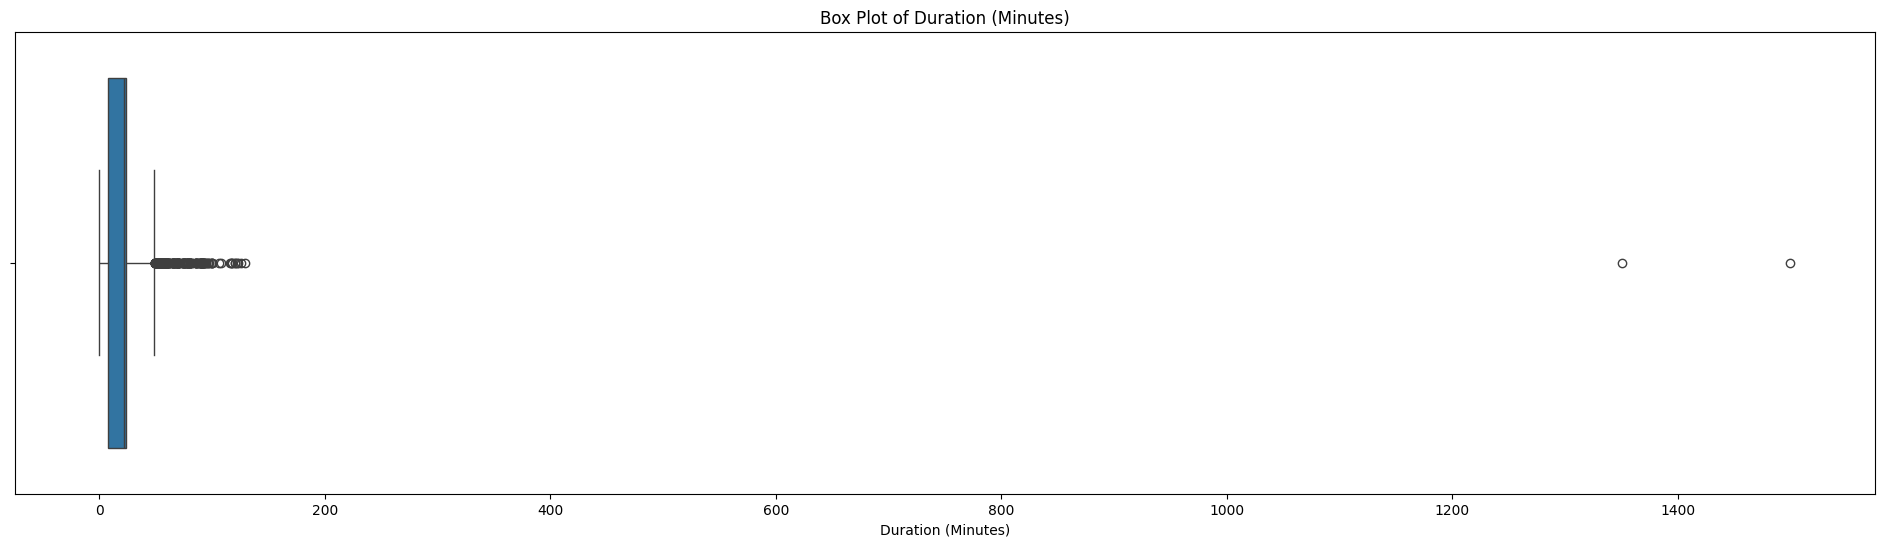

In [31]:
# Call convertDuration(duration) for all rows in "Duration" Column
anime_cleaned_df['Duration_Minutes'] = anime_cleaned_df['Duration'].apply(convertDuration)

# Drop the Duration category from data frame
anime_cleaned_df = anime_cleaned_df.drop(['Duration'], axis=1)

plt.figure(figsize=(24, 6))
sb.boxplot(data=anime_cleaned_df, x='Duration_Minutes')
plt.title('Box Plot of Duration (Minutes)')
plt.xlabel('Duration (Minutes)')
plt.show()

In [32]:
print(label_encoder.classes_)
print()
print(studios_df.dtypes)
print()
print(anime_cleaned_df.dtypes)

['4-koma manga' 'Book' 'Card game' 'Game' 'Light novel' 'Manga'
 'Mixed media' 'Music' 'Novel' 'Original' 'Other' 'Picture book' 'Radio'
 'Unknown' 'Visual novel' 'Web manga' 'Web novel']

anime_id             int64
Name                object
100studio            int64
10Gauge              int64
1IN                  int64
                     ...  
team Yamahitsuji     int64
teamKG               int64
trenova              int64
ufotable             int64
yell                 int64
Length: 924, dtype: object

anime_id                     int64
Name                        object
English name                object
Score                      float64
Synopsis                    object
Type                        object
Episodes                    object
Aired                       object
Premiered                   object
Status                      object
Source                      object
Rating                      object
Rank                        object
Popularity                   in

In [33]:
# Sort the DataFrame by 'Duration_Minutes' in descending order
sorted_df = anime_cleaned_df.sort_values(by='Duration_Minutes', ascending=False)

# Display the sorted DataFrame
print(sorted_df)

       anime_id                                               Name  \
24801     55604              Castlevania (Netflix animated series)   
24501     55231                          Beyblade Burst QuadStrike   
18544     45042                                  Lengxue Kuang Yan   
2685       2952        Final Fantasy VII: Advent Children Complete   
14455     37892                                         Shigutsman   
...         ...                                                ...   
24886     55717  Dekisokonai to Yobareta Motoeiyuu wa Jikka kar...   
24889     55720                                  Tensura × Genyoha   
24900     55731                                        Wu Nao Monu   
24901     55732                                Bu Xing Si: Yuan Qi   
24902     55733                                        Di Yi Xulie   

          English name  Score  \
24801      Castlevania    NaN   
24501             None    NaN   
18544             None    NaN   
2685              None   7.

##### Cleaning - "Ratings" Column, Use Label Encoder to convert into numerical categorical data.

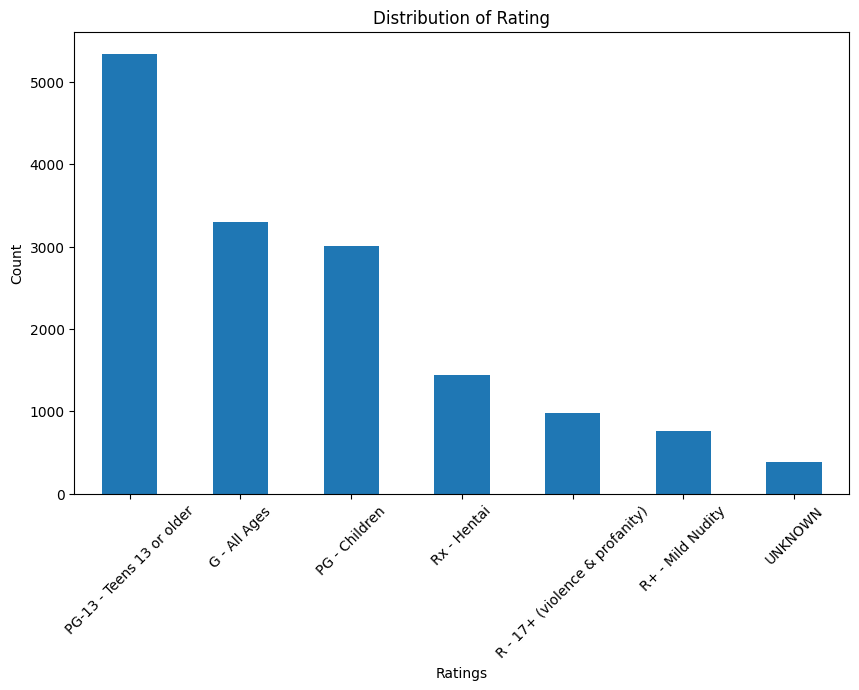

In [34]:
plt.figure(figsize=(10, 6))
anime_cleaned_df['Rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [35]:
# Convert Ratings to Numerical Categorical Data to represent the Age Rating
# Initialize Label Encoder from sklearn for Source
anime_cleaned_df['Rating Code'] = label_encoder.fit_transform(anime_cleaned_df['Rating'])
print(label_encoder.classes_)

# Fill the UNKNOWN values of Rating/Rating Code with the Mode
ratingMode = anime_cleaned_df['Rating Code'].mode()[0] # Get the Mode
anime_cleaned_df['Rating Code'] = anime_cleaned_df['Rating Code'].replace(6, ratingMode)

['G - All Ages' 'PG - Children' 'PG-13 - Teens 13 or older'
 'R - 17+ (violence & profanity)' 'R+ - Mild Nudity' 'Rx - Hentai'
 'UNKNOWN']


In [36]:
# Example: To trace back from 'Rating Code' to the original 'Rating'
encoded_rating_code = 1  # Replace this with any encoded value you want to trace back

# Use inverse_transform to get the original value
original_rating = label_encoder.inverse_transform([encoded_rating_code])

print(f"Encoded Rating Code {encoded_rating_code} corresponds to the original source: {original_rating[0]}")

Encoded Rating Code 1 corresponds to the original source: PG - Children


In [37]:
# Drop the Rating Column from data frame
anime_cleaned_df = anime_cleaned_df.drop(['Rating'], axis=1)

# Filter rows where 'Rating Code' is 6
filtered_df = anime_cleaned_df[anime_cleaned_df['Rating Code'] == 6]
filtered_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,Source,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code,Source Code,Duration_Minutes,Rating Code


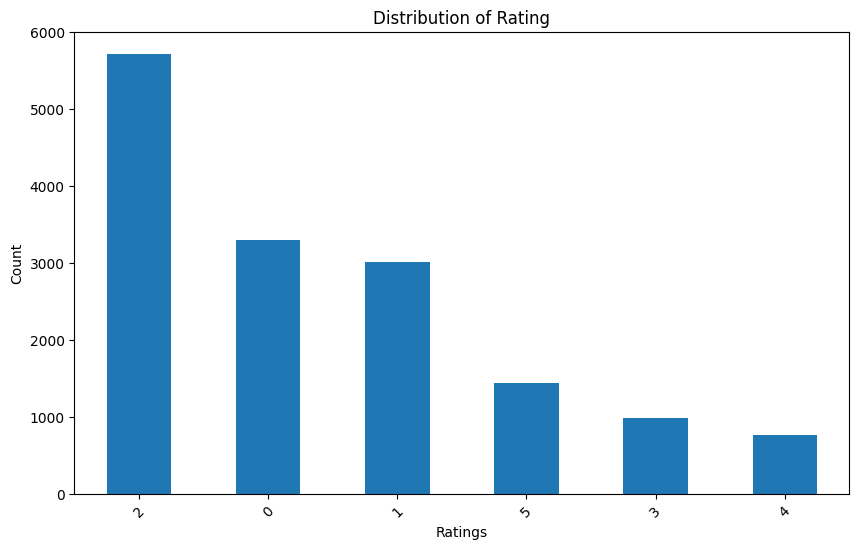

In [38]:
plt.figure(figsize=(10, 6))
anime_cleaned_df['Rating Code'].value_counts().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [39]:
print(anime_cleaned_df.dtypes)
anime_cleaned_df.head()

anime_id                     int64
Name                        object
English name                object
Score                      float64
Synopsis                    object
Type                        object
Episodes                    object
Aired                       object
Premiered                   object
Status                      object
Source                      object
Rank                        object
Popularity                   int64
Favorites                    int64
Scored By                   object
Members                      int64
Image URL                   object
Start Date          datetime64[ns]
End Date            datetime64[ns]
Status Code                  int32
Source Code                  int32
Duration_Minutes           float64
Rating Code                  int32
dtype: object


,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,Source,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code,Source Code,Duration_Minutes,Rating Code
0,1,Cowboy Bebop,1,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Original,41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03,1999-04-24,1,9,24.0,3
2,6,Trigun,1,8.22,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Manga,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,1998-04-01,1998-09-30,1,5,24.0,2
3,7,Witch Hunter Robin,1,7.25,Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,Original,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03,2002-12-25,1,9,25.0,2
4,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,Manga,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30,2005-09-29,1,5,23.0,1
5,15,Eyeshield 21,None,7.92,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,"Apr 6, 2005 to Mar 19, 2008",spring 2005,Finished Airing,Manga,688.0,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...,2005-04-06,2008-03-19,1,5,23.0,2


In [40]:
# Drop Cleaned Columns that are Represented in a New Column Variable
anime_cleaned_df = anime_cleaned_df.drop(['Aired', 'Status', 'Source'], axis=1)

In [41]:
anime_cleaned_df.head()

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Premiered,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code,Source Code,Duration_Minutes,Rating Code
0,1,Cowboy Bebop,1,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,spring 1998,41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03,1999-04-24,1,9,24.0,3
2,6,Trigun,1,8.22,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,spring 1998,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,1998-04-01,1998-09-30,1,5,24.0,2
3,7,Witch Hunter Robin,1,7.25,Robin Sena is a powerful craft user drafted in...,TV,26.0,summer 2002,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03,2002-12-25,1,9,25.0,2
4,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,It is the dark century and the people are suff...,TV,52.0,fall 2004,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30,2005-09-29,1,5,23.0,1
5,15,Eyeshield 21,None,7.92,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,spring 2005,688.0,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...,2005-04-06,2008-03-19,1,5,23.0,2


##### Cleaning - "Rank" Column

In [42]:
# Clean Up "Rank" Column & Values - 4612 Unknowns, 187 Rank 0 (Invalid) // The lower the better.

anime_cleaned_df['Rank'] = anime_cleaned_df['Rank'].replace("UNKNOWN", np.nan) # Replace "Unknown" w/ NaN

# Convert column to float first to handle NaN
anime_cleaned_df['Rank'] = anime_cleaned_df['Rank'].astype('float')

rank_median = anime_cleaned_df['Rank'].median()
anime_cleaned_df['Rank'] = anime_cleaned_df['Rank'].fillna(rank_median)

In [43]:
# Convert column to float first to handle NaN
anime_cleaned_df['Rank'] = anime_cleaned_df['Rank'].astype('int')

# Fill data rows with Rank 0 with more meaningful rank value as these 187 rows are unlikely to be accurate data - appending to the end of the ranked list in increasing order.
rank_zero_df = anime_cleaned_df[anime_cleaned_df['Rank'] == 0].copy()
non_zero_rank_df = anime_cleaned_df[anime_cleaned_df['Rank'] != 0]

# Process the new ranks for rows with Rank = 0.
max_rank = non_zero_rank_df['Rank'].max()
rank_zero_df['Rank'] = range(max_rank+1, max_rank+1 + len(rank_zero_df))

# Combine back the dataframes
anime_cleaned_df = pd.concat([non_zero_rank_df, rank_zero_df], ignore_index=True)

anime_cleaned_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Premiered,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code,Source Code,Duration_Minutes,Rating Code
0,1,Cowboy Bebop,1,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,spring 1998,41,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03,1999-04-24,1,9,24.0,3
1,6,Trigun,1,8.22,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,spring 1998,328,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,1998-04-01,1998-09-30,1,5,24.0,2
2,7,Witch Hunter Robin,1,7.25,Robin Sena is a powerful craft user drafted in...,TV,26.0,summer 2002,2764,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03,2002-12-25,1,9,25.0,2
3,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,It is the dark century and the people are suff...,TV,52.0,fall 2004,4240,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30,2005-09-29,1,5,23.0,1
4,15,Eyeshield 21,None,7.92,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,spring 2005,688,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...,2005-04-06,2008-03-19,1,5,23.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15201,55724,Beauty and the Brawn,None,NaN,Haeun is a nobleman who falls hard for Dullseh...,ONA,6.0,UNKNOWN,20179,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1269/...,2023-05-16,NaT,1,5,5.0,2
15202,55725,4 Week Lovers,None,NaN,Wanna fake-date for 4 weeks?\r\nDojun's life a...,ONA,10.0,UNKNOWN,20180,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1443/...,2023-04-04,NaT,1,15,5.0,2
15203,55726,"Die, Please!",None,NaN,I just want to tell him how I feel!\r\nMina ha...,ONA,UNKNOWN,UNKNOWN,20181,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1621/...,2023-05-31,NaT,1,15,5.0,0
15204,55732,Bu Xing Si: Yuan Qi,Blader Soul,NaN,<NA>,ONA,18.0,UNKNOWN,20182,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...,2023-07-27,NaT,2,16,NaN,2


##### Cleaning - "Popularity" Column

In [44]:
# Clean Up "Popularity" Column & Values - 187 Rank 0 (Invalid) // The lower the better.

# Fill data rows with Rank 0 with more meaningful rank value as these 187 rows are unlikely to be accurate data - appending to the end of the popularity list in increasing order.
popularity_zero_df = anime_cleaned_df[anime_cleaned_df['Popularity'] == 0].copy()
non_zero_popularity_df = anime_cleaned_df[anime_cleaned_df['Popularity'] != 0]

# Process the new ranks for rows with Rank = 0.
max_popularity = non_zero_popularity_df['Popularity'].max()
popularity_zero_df['Popularity'] = range(max_popularity+1, max_popularity+1 + len(popularity_zero_df))

# Combine back the dataframes
anime_cleaned_df = pd.concat([non_zero_popularity_df, popularity_zero_df], ignore_index=True)
anime_cleaned_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Premiered,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code,Source Code,Duration_Minutes,Rating Code
0,1,Cowboy Bebop,1,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,spring 1998,41,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03,1999-04-24,1,9,24.0,3
1,6,Trigun,1,8.22,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,spring 1998,328,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,1998-04-01,1998-09-30,1,5,24.0,2
2,7,Witch Hunter Robin,1,7.25,Robin Sena is a powerful craft user drafted in...,TV,26.0,summer 2002,2764,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03,2002-12-25,1,9,25.0,2
3,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,It is the dark century and the people are suff...,TV,52.0,fall 2004,4240,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30,2005-09-29,1,5,23.0,1
4,15,Eyeshield 21,None,7.92,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,spring 2005,688,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...,2005-04-06,2008-03-19,1,5,23.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15201,55724,Beauty and the Brawn,None,NaN,Haeun is a nobleman who falls hard for Dullseh...,ONA,6.0,UNKNOWN,20179,24799,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1269/...,2023-05-16,NaT,1,5,5.0,2
15202,55725,4 Week Lovers,None,NaN,Wanna fake-date for 4 weeks?\r\nDojun's life a...,ONA,10.0,UNKNOWN,20180,24800,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1443/...,2023-04-04,NaT,1,15,5.0,2
15203,55726,"Die, Please!",None,NaN,I just want to tell him how I feel!\r\nMina ha...,ONA,UNKNOWN,UNKNOWN,20181,24801,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1621/...,2023-05-31,NaT,1,15,5.0,0
15204,55732,Bu Xing Si: Yuan Qi,Blader Soul,NaN,<NA>,ONA,18.0,UNKNOWN,20182,24802,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...,2023-07-27,NaT,2,16,NaN,2


In [ ]:
# "Favorites", "Members" and "Image URL" columns seems clean - no need for further cleansing. 0 is valid data, indicating no users added to their favorites on MyAnimeList

##### Cleaning - "Scored By" Column,

In [46]:
# Convert "Scored By" to Integer and replace Unknown with NaN first.
anime_cleaned_df['Scored By'] = anime_cleaned_df['Scored By'].replace("UNKNOWN", np.nan) # Replace "Unknown" w/ NaN
# Convert column to int64
anime_cleaned_df['Scored By'] = anime_cleaned_df['Scored By'].astype('float64')

print(anime_cleaned_df.dtypes)

anime_id                     int64
Name                        object
English name                object
Score                      float64
Synopsis                    object
Type                        object
Episodes                    object
Premiered                   object
Rank                         int64
Popularity                   int64
Favorites                    int64
Scored By                  float64
Members                      int64
Image URL                   object
Start Date          datetime64[ns]
End Date            datetime64[ns]
Status Code                  int32
Source Code                  int32
Duration_Minutes           float64
Rating Code                  int32
dtype: object


##### Cleaning - "Score" Column, fill in based on other variables

In [47]:
filtered_df = anime_cleaned_df[anime_cleaned_df['Score'].isna()]
filtered_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Premiered,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code,Source Code,Duration_Minutes,Rating Code
1265,1739,Shibawanko no Wa no Kokoro,None,NaN,Based on a japanese children`s book by Yoshie ...,TV,80.0,spring 2006,19660,13679,1,NaN,728,https://cdn.myanimelist.net/images/anime/11/70...,2006-04-05,2007-03-14,1,13,2.0,0
1352,1863,Silk Road Shounen Yuuto,None,NaN,"When a boy Yuto visits Qinghai in China, he is...",TV,26.0,fall 2006,19912,13981,0,NaN,657,https://cdn.myanimelist.net/images/anime/1/186...,2006-09-16,2007-03-24,1,13,20.0,2
1917,2701,Susie-chan to Marvy,Little Susie and Marvy,NaN,<NA>,TV,104.0,spring 1999,12706,16212,0,NaN,374,https://cdn.myanimelist.net/images/anime/10/36...,1999-04-05,2000-02-03,1,13,15.0,2
1924,2708,Wankorobee,None,NaN,<NA>,TV,26.0,fall 1996,13327,16545,0,NaN,348,https://cdn.myanimelist.net/images/anime/11/36...,1996-10-06,1997-03-30,1,9,15.0,0
1942,2735,Mugen Senki Portriss,None,NaN,"In a raving world, legendary knights stood up....",TV,52.0,spring 2003,18320,14460,1,NaN,567,https://cdn.myanimelist.net/images/anime/1627/...,2003-04-05,2004-03-27,1,13,25.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15201,55724,Beauty and the Brawn,None,NaN,Haeun is a nobleman who falls hard for Dullseh...,ONA,6.0,UNKNOWN,20179,24799,0,NaN,0,https://cdn.myanimelist.net/images/anime/1269/...,2023-05-16,NaT,1,5,5.0,2
15202,55725,4 Week Lovers,None,NaN,Wanna fake-date for 4 weeks?\r\nDojun's life a...,ONA,10.0,UNKNOWN,20180,24800,0,NaN,0,https://cdn.myanimelist.net/images/anime/1443/...,2023-04-04,NaT,1,15,5.0,2
15203,55726,"Die, Please!",None,NaN,I just want to tell him how I feel!\r\nMina ha...,ONA,UNKNOWN,UNKNOWN,20181,24801,0,NaN,0,https://cdn.myanimelist.net/images/anime/1621/...,2023-05-31,NaT,1,15,5.0,0
15204,55732,Bu Xing Si: Yuan Qi,Blader Soul,NaN,<NA>,ONA,18.0,UNKNOWN,20182,24802,0,NaN,0,https://cdn.myanimelist.net/images/anime/1383/...,2023-07-27,NaT,2,16,NaN,2


                     Score  Scored By
Score             1.000000   0.373575
Members           0.416495   0.989107
Scored By         0.373575   1.000000
Favorites         0.270604   0.783793
Duration_Minutes  0.181384   0.050788
anime_id         -0.002458   0.040556
Rating Code      -0.011246   0.027384
Status Code      -0.044107   0.020587
Source Code      -0.236661  -0.135472
Popularity       -0.673298  -0.402473
Rank             -0.914036  -0.366693


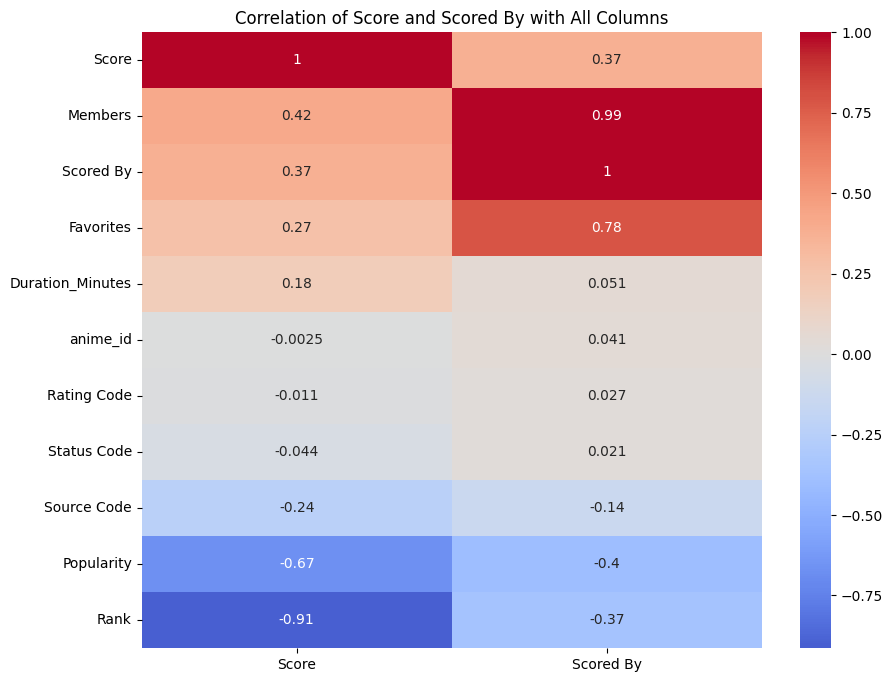

In [48]:
# Check the Correlation of "Score" and "Scored By" with other columns
numeric_df = anime_cleaned_df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Display correlations specifically for 'Score' and 'Scored By' with all other columns
score_correlations = correlation_matrix[['Score', 'Scored By']].sort_values(by='Score', ascending=False, na_position='last')
print(score_correlations)

plt.figure(figsize=(10, 8))
sb.heatmap(score_correlations, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Score and Scored By with All Columns")
plt.show()

In [49]:
#imputer = KNNImputer(n_neighbors=5)
#anime_cleaned_df[['Score', 'Scored By']] = imputer.fit_transform(anime_cleaned_df[['Score', 'Scored By', 'Members', 'Favorites', 'Popularity']])

In [50]:
# Use Multivariate Imputation by Chained Equations (MICE) to fill in the missing data of Score & Scored By
# Useful for UNKNOWN or Missing Data for multiple columns, considers the relationships between features.
# Iterative, Statistical - Fill through other variables in the dataset. 
# Missing Values filled one-by-one, and it iterates.
# Start by filling missing values with initial guesses, like mean/median for column with missing data.
# For features with missing data - this feature will be treated as target and other features as predictors.
# Regression Model built to predict missing values in the target feature based on other features
# Use the model to fill the missing values, process repeated in cyclic manner.


# Create a new dataframe that consists of only numerical data with high correlation with Score, Scored By.
anime_numeric_df = anime_cleaned_df[['Score', 'Scored By', 'Members', 'Favorites', 'Popularity']]

# Initialize IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Apply the imputer to the selected columns to fill missing data. Replace NaN with imputed values derived from the model
anime_imputed_df = pd.DataFrame(imputer.fit_transform(anime_numeric_df), columns=anime_numeric_df.columns)

# Combine the results in the MICE df to anime cleaned df.
anime_cleaned_df['Score'] = anime_imputed_df['Score']
anime_cleaned_df['Scored By'] = anime_imputed_df['Scored By']

# Check for remaining NaN values.
print(anime_cleaned_df[['Score', 'Scored By']].isna().sum())


Score        0
Scored By    0
dtype: int64


In [51]:
# Round 'Score' to 1 decimal place and 'Scored By' to 0 decimal places (whole number)
anime_cleaned_df['Score'] = anime_cleaned_df['Score'].round(4)
anime_cleaned_df['Scored By'] = anime_cleaned_df['Scored By'].round(0)

# Convert Scored By to int64
anime_cleaned_df['Scored By'] = anime_cleaned_df['Scored By'].fillna(0)
anime_cleaned_df['Scored By'] = anime_cleaned_df['Scored By'].astype('Int64')

In [52]:
anime_cleaned_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Premiered,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code,Source Code,Duration_Minutes,Rating Code
0,1,Cowboy Bebop,1,8.7500,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,spring 1998,41,43,78525,914193,1771505,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03,1999-04-24,1,9,24.0,3
1,6,Trigun,1,8.2200,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,spring 1998,328,246,15035,356739,727252,https://cdn.myanimelist.net/images/anime/7/203...,1998-04-01,1998-09-30,1,5,24.0,2
2,7,Witch Hunter Robin,1,7.2500,Robin Sena is a powerful craft user drafted in...,TV,26.0,summer 2002,2764,1795,613,42829,111931,https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03,2002-12-25,1,9,25.0,2
3,8,Bouken Ou Beet,Beet the Vandel Buster,6.9400,It is the dark century and the people are suff...,TV,52.0,fall 2004,4240,5126,14,6413,15001,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30,2005-09-29,1,5,23.0,1
4,15,Eyeshield 21,None,7.9200,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,spring 2005,688,1252,1997,86524,177688,https://cdn.myanimelist.net/images/anime/1079/...,2005-04-06,2008-03-19,1,5,23.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15201,55724,Beauty and the Brawn,None,4.1994,Haeun is a nobleman who falls hard for Dullseh...,ONA,6.0,UNKNOWN,20179,24799,0,27079,0,https://cdn.myanimelist.net/images/anime/1269/...,2023-05-16,NaT,1,5,5.0,2
15202,55725,4 Week Lovers,None,4.1993,Wanna fake-date for 4 weeks?\r\nDojun's life a...,ONA,10.0,UNKNOWN,20180,24800,0,27081,0,https://cdn.myanimelist.net/images/anime/1443/...,2023-04-04,NaT,1,15,5.0,2
15203,55726,"Die, Please!",None,4.1992,I just want to tell him how I feel!\r\nMina ha...,ONA,UNKNOWN,UNKNOWN,20181,24801,0,27083,0,https://cdn.myanimelist.net/images/anime/1621/...,2023-05-31,NaT,1,15,5.0,0
15204,55732,Bu Xing Si: Yuan Qi,Blader Soul,4.1990,<NA>,ONA,18.0,UNKNOWN,20182,24802,0,27085,0,https://cdn.myanimelist.net/images/anime/1383/...,2023-07-27,NaT,2,16,NaN,2


In [53]:
print(anime_numeric_df['Scored By'].unique())

[9.14193e+05 3.56739e+05 4.28290e+04 ... 3.14500e+03 6.24700e+03
 4.21000e+02]


##### Cleaning - "Episodes" Column, fill UNKNOWN with the mode of episodes

In [54]:
# Clean Up "Episodes" - To fill titles with UNKNOWN number of episodes (511) with the mode of episodes, since many anime has standard formats and released in seasons.

# Replace Unknown with NAN
anime_cleaned_df['Episodes'] = anime_cleaned_df['Episodes'].replace("UNKNOWN", np.nan)

# Convert NaN to numeric
anime_cleaned_df['Episodes'] = pd.to_numeric(anime_cleaned_df['Episodes'], errors='coerce')

# Get the mode of 'Episodes' column
episodes_mode = anime_cleaned_df['Episodes'].mode()[0]

# Fill NaN values in 'Episodes' with the mode.
anime_cleaned_df['Episodes'] = anime_cleaned_df['Episodes'].fillna(episodes_mode)

# Convert to Int
anime_cleaned_df['Episodes'] = anime_cleaned_df['Episodes'].astype('int64')

##### Filling in unknowns:

Synopsis: Description not available 

Start Date: Earliest Date

End Date: if currently Airing, Today

Duration_Minutes: median

In [55]:
# Some final clean
print(anime_cleaned_df.isna().sum())  # Check remaining missing values
print(anime_cleaned_df['Episodes'].unique())  # Verify episodes encoding

# Fill missing Synopses with placeholder text
anime_cleaned_df['Synopsis'].fillna("Description not available.", inplace=True)

# Fill remaining titles with unknown start date with the earliest date.
anime_cleaned_df['Start Date'] = anime_cleaned_df.groupby('Type')['Start Date'].transform(lambda x: x.fillna(x.min()))

# Fill the end date of titles with "Currently Airing" status to today.
ongoing_mask = anime_cleaned_df['Status Code'] == anime_cleaned_df['Status Code'].max()  # Example: check for 'Currently Airing'
anime_cleaned_df.loc[ongoing_mask, 'End Date'] = pd.Timestamp('today')

# Fill the median of duration to titles with unknown durations
duration_median = anime_cleaned_df['Duration_Minutes'].median()
anime_cleaned_df['Duration_Minutes'].fillna(duration_median, inplace=True)

### Verify Cleaning
print(anime_cleaned_df.isna().sum())  # Check remaining missing values
print(anime_cleaned_df['Episodes'].unique())  # Verify episodes encoding

anime_id               0
Name                   0
English name        8638
Score                  0
Synopsis            3356
Type                   0
Episodes               0
Premiered              0
Rank                   0
Popularity             0
Favorites              0
Scored By              0
Members                0
Image URL              0
Start Date           765
End Date            6585
Status Code            0
Source Code            0
Duration_Minutes     416
Rating Code            0
dtype: int64
[  26   52  145   24   74  220    1  178   12   22   69   25    4   94
    5    3   13   23   43    6   50   47   51   49   39    8    7   75
   62   14   44   45   64  101   27  161    2  153   70   78   42   11
  167  150  366    9   16   38   48   10   76   40   20   37   41  112
  224  180  296  358   63  276   46   54   15   21   35  124   86  102
   36   67  291  110   29   55  201  142  109   34  136   32   73  114
   19  195   58  155   96  103  113  104  192  191  203   56 

C:\Users\kyeyo\AppData\Local\Temp\ipykernel_7196\693577756.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anime_cleaned_df['Synopsis'].fillna("Description not available.", inplace=True)
C:\Users\kyeyo\AppData\Local\Temp\ipykernel_7196\693577756.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

### BASIC STATS - JORDAN

In [56]:
print("Data Types: ", type(anime_cleaned_df))
print("Data dims: ", anime_cleaned_df.shape)
print(anime_cleaned_df.dtypes)

# Merge anime_cleaned_df with producers_df
merged_df = pd.merge(anime_cleaned_df, producers_df, on=['anime_id', 'Name'], how='left')
print("Data dims: ", merged_df.shape)
#Merge anime_cleaned_df with studios_df
merged_df = pd.merge(merged_df, studios_df, on=['anime_id', 'Name'], how='left')
print("Data dims: ", merged_df.shape)
# Merge anime_cleaned_df with genres_df
merged_df = pd.merge(merged_df, genres_df, on=['anime_id', 'Name'], how='left')
print("Data dims: ", merged_df.shape)
print(merged_df.dtypes.to_string())

Data Types:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (15206, 20)
anime_id                     int64
Name                        object
English name                object
Score                      float64
Synopsis                    object
Type                        object
Episodes                     int64
Premiered                   object
Rank                         int64
Popularity                   int64
Favorites                    int64
Scored By                    Int64
Members                      int64
Image URL                   object
Start Date          datetime64[ns]
End Date            datetime64[ns]
Status Code                  int32
Source Code                  int32
Duration_Minutes           float64
Rating Code                  int32
dtype: object
Data dims:  (15206, 1332)
Data dims:  (15206, 2254)
Data dims:  (15206, 2275)
anime_id                                                      int64
Name                                                         obje

## Significance of Variables

field_classification below used for determining which Statistical test to apply: Default 5% significance

<table border="1">
  <thead>
    <tr>
      <th>Type</th>
      <th>Analysis Method</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Date / Numerical</td>
      <td>Spearman Rank Correlation (ordinality matters but not magnitude of difference)</td>
    </tr>
    <tr>
      <td>Categorical</td>
      <td>ANOVA Analysis of Variance</td>
    </tr>
    <tr>
      <td>One-hot</td>
      <td>Independent Sample t-test</td>
    </tr>
    <tr>
      <td>Multivalues</td>
      <td>Thousands of one-hot columns/ Unique Values. Originally from the Studios, Producers, and Genres columns. These columns have been dropped under "Data Cleaning"</td>
    </tr>
  </tbody>
</table>


In [ ]:
# lookup table to classify fields with invalid values (na_List) and field type
field_classification = {
    'anime_id':{'type':'Work In Progress','na_List':[]},
    'Name':{'type':'Work In Progress','na_List':[]},

    # Extra processing required to make this properly one-hot
    'English name':{'type':'one-hot','na_List':[]},

    'Score':{'type':'numerical','na_List':[]},
    'Synopsis':{'type':'Work In Progress','na_List':[]},
    'Type':{'type':'categorical','na_List':[]},
    'Episodes':{'type':'numerical','na_List':['UNKNOWN']},

    # There are special cases for Premiered, hence the data below never gets looked up. However put in a dummy type just so it does not trigger any exceptions Check analyse_field
    'Premiered':{'type':'date','na_List':[]},

    'Rank':{'type':'numerical','na_List':[0,'UNKNOWN']},
    'Popularity':{'type':'numerical','na_List':[0]},
    'Favorites':{'type':'numerical','na_List':[]},
    'Scored By':{'type':'numerical','na_List':["UNKNOWN"]},
    'Members':{'type':'numerical','na_List':[]},
    'Image URL':{'type':'Work In Progress','na_List':[]},
    'Start Date':{'type':'date','na_List':[]},
    'End Date':{'type':'date','na_List':[]},
    'Status Code':{'type':'categorical','na_List':["UNKNOWN"]},
    'Source Code':{'type':'categorical','na_List':[]},
    'Duration_Minutes':{'type':'numerical','na_List':["Unknown"]},
    'Rating Code':{'type':'categorical','na_List':["UNKNOWN"]},
    'Genres':{'type':'multiValue','na_List':[]},

    # If need more examples use below 
    # '':{'type':'','na_List':[]},
}

# Remaining all one-hot variables:
for i in merged_df.columns:
    if i not in field_classification:
        field_classification[i]={'type':'one-hot','na_List':[]}

In [ ]:
def analyze_field(field, stat_p=0.05, printDetails=True, debug=False, df=None):
    """
    Analyzes whether a given field affects the 'Score' field significantly.

    Parameters:
    - field (str): The name of the field to analyze.
    - stat_p (float): The significance level (default is 0.05).
    - printDetails (bool): Whether to print detailed results (default is True).
    - debug (bool): If True, suppresses certain messages (default is False).
    - df (pd.DataFrame): Optional. If provided, uses this DataFrame; otherwise, uses the global anime_cleaned_df.

    Returns:
    - int: 1 if significant, 0 if not significant (when printDetails is False).
    - float: p-value of the test
    - str: Change in score (formatted)
    """

    # Use the provided DataFrame or default to global merged_df
    df = df if df is not None else merged_df.copy()

    # Check if the field exists in the classification table
    if field not in field_classification:
        raise ValueError(f"Field '{field}' not found in the classification table. Please add it.")
    
    # Access field's classification and invalid values from the lookup table; should not have any remaining invalid values
    field_info = field_classification[field]
    field_type = field_info['type']
    na_List = field_info['na_List']

    # Drop rows containing invalid values in the specified field or NaN
    df = df[~df[field].isin(na_List)].dropna(subset=['Score', field]) if field!='English name' else df.dropna(subset=['Score'])

    # Check if the field exists in the dataframe
    if field not in df.columns:
        raise ValueError(f"Field '{field}' not found in the dataframe.")

    # Initialize the change in score variable
    change_in_score = None

    # Case 0.1: Field type is "Work In Progress"
    if field_type == "Work In Progress":
        if not debug:
            print(f"The data in field '{field}' is currently marked as 'Work In Progress' and is hard to analyze.")
        return 0, None, None

    # Case 0.2: 'English name' field processing
    if field == 'English name':
        df[field] = df[field].apply(lambda x: 0 if x == None else 1)
        field_type = 'one-hot'  # Ensure this is treated as one-hot for statistical test

    # Case 1.1: Field type "date" with pattern extraction
    if field_type == 'date':
        date_patterns = [r'([A-Za-z]{3} \d{1,2}, \d{4})', r'([A-Za-z]{3} \d{4})', r'(\d{4})']
        df['Extracted Date'] = df[field].apply(lambda x: next((match for pattern in date_patterns if (match := re.search(pattern, str(x)))), None))
        df['Year'] = df['Extracted Date'].apply(lambda x: int(x.group(0)[-4:]) if x else np.nan)
        df.dropna(subset=['Year'], inplace=True)
        correlation, p_value = stats.spearmanr(df['Year'], df['Score'])

        change_in_score = correlation * df['Score'].std()  # Change for a unit change in the independent variable
        if printDetails:
            print(f"Spearman Rank Correlation for '{field}' and 'Score': correlation = {correlation:.3f}, p-value = {p_value:.2e}")
        return 1 if p_value < stat_p else 0, p_value, f"{change_in_score:.3f}/unit"

    # Case 1.2: Numerical variables: Spearman Rank Correlation
    elif field_type == 'numerical':
        correlation, p_value = stats.spearmanr(df[field], df['Score'])
        change_in_score = correlation * df['Score'].std()  # Change for a unit change in the independent variable
        if printDetails:
            print(f"Spearman Rank Correlation for '{field}': correlation = {correlation:.3f}, p-value = {p_value:.2e}")
        return 1 if p_value < stat_p else 0, p_value, f"{change_in_score:.3f}/unit"

    # Case 2: Categorical Variables: ANOVA test of variance
    elif field_type == 'categorical':
        # Group data by the unique values in the categorical field
        grouped_data = [df[df[field] == value]['Score'] for value in df[field].unique()]
        
        # Perform ANOVA test
        f_stat, p_value = stats.f_oneway(*grouped_data)
        
        # Calculate means for each category
        means = [group.mean() for group in grouped_data]
        
        # Identify the categories with the highest and lowest means
        max_mean_idx = means.index(max(means))
        min_mean_idx = means.index(min(means))
        
        # Get the corresponding categories for these means
        highest_category = df[field].unique()[max_mean_idx]
        lowest_category = df[field].unique()[min_mean_idx]
        
        # Prepare the result string
        result_str = f"ANOVA for '{field}': F-statistic = {f_stat:.3f}, p-value = {p_value:.2e}"
        result_str += f"\nEstimated difference in Score between categories: {max(means) - min(means):.3f}"
        
        # Include the highest and lowest Score categories
        result_str += f"\nCategory with highest Score: {highest_category} (Mean = {max(means):.3f})"
        result_str += f"\nCategory with lowest Score: {lowest_category} (Mean = {min(means):.3f})"
        if printDetails:
            print(result_str)
        return 1 if p_value < stat_p else 0, p_value, f"Highest: {highest_category}, mean: {max(means):.3f}; Lowest: {lowest_category}, mean: {min(means):.3f}"

    # Case 3: One-Hot variables: Independent sample t-test
    elif field_type == 'one-hot':
        df[field] = df[field].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else str(x))
        
        unique_values = df[field].unique()
        if len(unique_values) != 2:
            raise ValueError(f"The field '{field}' must be binary. Found unique values: {unique_values}")
        
        group_1, group_2 = [df[df[field] == val]['Score'] for val in unique_values]
        t_stat, p_value = stats.ttest_ind(group_1, group_2)
        change_in_score = group_1.mean() - group_2.mean()  # Difference in means
        if printDetails:
            print(f"T-test for '{field}': t-statistic = {t_stat:.3f}, p-value = {p_value:.2e}")
        return 1, p_value, f"{change_in_score:.3f}" if p_value < stat_p else 0, p_value, f"{change_in_score:.3f}"

    # Case 4: None of the above
    else:
        raise Exception(f"Field type '{field_type}' not recognized. Please update the classification table.")

In [59]:
def analyseAll(multivalues=False, df=merged_df):
    """
    Analyze all fields in the selected DataFrame for their significance on 'Score'.

    Parameters:
    - with_multivalues (bool): If True, uses merged_df or input df; otherwise, uses anime_cleaned_df.
    - df (Optional): If given and multivalues=True, uses provided df. Else uses merged df
    """
    # Initialize an empty DataFrame with 4 columns: Field, Significance, Significance Level, Change in Score
    result_df = pd.DataFrame(columns=['Field', 'Significance', 'Significance Level', 'Change in Score'])
    df = df[df.columns.difference(anime_cleaned_df.columns).union(['Score'])] if multivalues else anime_cleaned_df

    for col in df.columns:
        try:
            # Ensure the function always returns valid results or raises an error
            significance, p, change_in_score = analyze_field(col, df=df, printDetails=False, debug=True)[0:3]
            if not isinstance(change_in_score, str):
                significance, p, change_in_score = 0,None,"NA"

            # Append the result for the current column to the DataFrame
            result_df = pd.concat([
                result_df,
                pd.DataFrame({
                    'Field': [col],
                    'Significance': ["Significant" if significance == 1 else "Not Significant"],
                    'Significance Level': [f"{p:.2e}" if p is not None else "NA"],  # Format p-value as scientific notation
                    'Change in Score': [change_in_score]  # Add the Change in Score column
                })
            ], ignore_index=True)
        except ValueError as e:
            print(f"Error analyzing {col}: {e}")
        except Exception as e:
            print(f"Unexpected error in column {col}: {e}")

    # result_df = result_df.to_html(index=False, border=1, classes='table table-striped', justify='center')
    print("\n", result_df)

analyseAll()


                Field     Significance Significance Level  \
0           anime_id  Not Significant                 NA   
1               Name  Not Significant                 NA   
2       English name      Significant           0.00e+00   
3              Score      Significant           0.00e+00   
4           Synopsis  Not Significant                 NA   
5               Type      Significant          1.21e-122   
6           Episodes      Significant           1.08e-24   
7          Premiered  Not Significant           6.83e-01   
8               Rank      Significant           0.00e+00   
9         Popularity      Significant           0.00e+00   
10         Favorites      Significant           0.00e+00   
11         Scored By      Significant           7.24e-07   
12           Members      Significant           0.00e+00   
13         Image URL  Not Significant                 NA   
14        Start Date      Significant           4.63e-24   
15          End Date      Significant 

##### Summary of non-Multivalue information


 <table border="1" class="dataframe table table-striped">
  <thead>
    <tr style="text-align: center;">
      <th>Field</th>
      <th>Significance</th>
      <th>Significance Level</th>
      <th>Change in Score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>anime_id</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Name</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>English name</td>
      <td>Significant</td>
      <td>0.00e+00</td>
      <td>0.890</td>
    </tr>
    <tr>
      <td>Score</td>
      <td>Significant</td>
      <td>0.00e+00</td>
      <td>1.118/unit</td>
    </tr>
    <tr>
      <td>Synopsis</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Type</td>
      <td>Significant</td>
      <td>1.21e-122</td>
      <td>Highest: TV, mean: 6.007; Lowest: ONA, mean: 5.495</td>
    </tr>
    <tr>
      <td>Episodes</td>
      <td>Significant</td>
      <td>1.08e-24</td>
      <td>-0.093/unit</td>
    </tr>
    <tr>
      <td>Premiered</td>
      <td>Not Significant</td>
      <td>6.83e-01</td>
      <td>0.005/unit</td>
    </tr>
    <tr>
      <td>Rank</td>
      <td>Significant</td>
      <td>0.00e+00</td>
      <td>-1.012/unit</td>
    </tr>
    <tr>
      <td>Popularity</td>
      <td>Significant</td>
      <td>0.00e+00</td>
      <td>-0.997/unit</td>
    </tr>
    <tr>
      <td>Favorites</td>
      <td>Significant</td>
      <td>0.00e+00</td>
      <td>0.963/unit</td>
    </tr>
    <tr>
      <td>Scored By</td>
      <td>Significant</td>
      <td>7.24e-07</td>
      <td>-0.045/unit</td>
    </tr>
    <tr>
      <td>Members</td>
      <td>Significant</td>
      <td>0.00e+00</td>
      <td>0.997/unit</td>
    </tr>
    <tr>
      <td>Image URL</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Start Date</td>
      <td>Significant</td>
      <td>4.63e-24</td>
      <td>0.092/unit</td>
    </tr>
    <tr>
      <td>End Date</td>
      <td>Significant</td>
      <td>1.26e-05</td>
      <td>-0.045/unit</td>
    </tr>
    <tr>
      <td>Status Code</td>
      <td>Significant</td>
      <td>6.03e-05</td>
      <td>Highest: 2, mean: 6.141; Lowest: 0, mean: 5.816</td>
    </tr>
    <tr>
      <td>Source Code</td>
      <td>Significant</td>
      <td>0.00e+00</td>
      <td>Highest: 4, mean: 6.913; Lowest: 11, mean: 5.141</td>
    </tr>
    <tr>
      <td>Duration_Minutes</td>
      <td>Significant</td>
      <td>0.00e+00</td>
      <td>0.475/unit</td>
    </tr>
    <tr>
      <td>Rating Code</td>
      <td>Significant</td>
      <td>0.00e+00</td>
      <td>Highest: 3, mean: 6.836; Lowest: 1, mean: 4.841</td>
    </tr>
  </tbody>
</table>


##### Genres:

In [60]:
analyseAll(multivalues=True, df=genres_df.merge(merged_df[['Score']], left_index=True, right_index=True, how='outer'))


             Field     Significance Significance Level Change in Score
0          Action      Significant           1.32e-11           0.182
1       Adventure      Significant           7.96e-15          -0.239
2     Avant Garde  Not Significant                 NA              NA
3   Award Winning      Significant           1.07e-04           0.544
4       Boys Love  Not Significant                 NA              NA
5          Comedy      Significant           3.37e-02          -0.051
6           Drama      Significant           2.46e-07          -0.164
7           Ecchi      Significant           2.82e-04          -0.180
8         Erotica      Significant           1.57e-02          -0.465
9         Fantasy      Significant           4.06e-03          -0.084
10     Girls Love      Significant           1.64e-04          -0.483
11        Gourmet      Significant           3.14e-02           0.287
12         Hentai      Significant           1.50e-04          -0.130
13         Horror 

Genre Significance


 <table border="1" class="dataframe table table-striped">
  <thead>
    <tr style="text-align: center;">
      <th>Field</th>
      <th>Significance</th>
      <th>Significance Level</th>
      <th>Change in Score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Action</td>
      <td>Significant</td>
      <td>1.32e-11</td>
      <td>0.182</td>
    </tr>
    <tr>
      <td>Adventure</td>
      <td>Significant</td>
      <td>7.96e-15</td>
      <td>-0.239</td>
    </tr>
    <tr>
      <td>Avant Garde</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Award Winning</td>
      <td>Significant</td>
      <td>1.07e-04</td>
      <td>0.544</td>
    </tr>
    <tr>
      <td>Boys Love</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Comedy</td>
      <td>Significant</td>
      <td>3.37e-02</td>
      <td>-0.051</td>
    </tr>
    <tr>
      <td>Drama</td>
      <td>Significant</td>
      <td>2.46e-07</td>
      <td>-0.164</td>
    </tr>
    <tr>
      <td>Ecchi</td>
      <td>Significant</td>
      <td>2.82e-04</td>
      <td>-0.180</td>
    </tr>
    <tr>
      <td>Erotica</td>
      <td>Significant</td>
      <td>1.57e-02</td>
      <td>-0.465</td>
    </tr>
    <tr>
      <td>Fantasy</td>
      <td>Significant</td>
      <td>4.06e-03</td>
      <td>-0.084</td>
    </tr>
    <tr>
      <td>Girls Love</td>
      <td>Significant</td>
      <td>1.64e-04</td>
      <td>-0.483</td>
    </tr>
    <tr>
      <td>Gourmet</td>
      <td>Significant</td>
      <td>3.14e-02</td>
      <td>0.287</td>
    </tr>
    <tr>
      <td>Hentai</td>
      <td>Significant</td>
      <td>1.50e-04</td>
      <td>-0.130</td>
    </tr>
    <tr>
      <td>Horror</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mystery</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Romance</td>
      <td>Significant</td>
      <td>7.18e-17</td>
      <td>-0.286</td>
    </tr>
    <tr>
      <td>Sci-Fi</td>
      <td>Significant</td>
      <td>3.46e-24</td>
      <td>0.314</td>
    </tr>
    <tr>
      <td>Score</td>
      <td>Significant</td>
      <td>0.00e+00</td>
      <td>1.118/unit</td>
    </tr>
    <tr>
      <td>Slice of Life</td>
      <td>Significant</td>
      <td>2.62e-07</td>
      <td>0.209</td>
    </tr>
    <tr>
      <td>Sports</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Supernatural</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Suspense</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
  </tbody>
</table>


##### Studios and Producers: Thousands of unique values

The following code is commented out due to running very slow during development

In [61]:
# pd.set_option('display.max_rows', None)
# analyseAll(multivalues=True)

##### Output HTML Data

In [62]:
html_data = '''
 <table border="1" class="dataframe table table-striped">
  <thead>
    <tr style="text-align: center;">
      <th>Field</th>
      <th>Significance</th>
      <th>Significance Level</th>
      <th>Change in Score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>100studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>10Gauge</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>12 Diary Holders</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>1IN_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>1IN_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>1st PLACE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>2:10 AM Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>33 Collective</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>3xCube</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>4Kids Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>5 Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>5pb.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>7doc</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>7ji</td>
      <td>Significant</td>
      <td>3.10e-02</td>
      <td>1.207</td>
    </tr>
    <tr>
      <td>81 Produce_x</td>
      <td>Significant</td>
      <td>9.39e-05</td>
      <td>-0.892</td>
    </tr>
    <tr>
      <td>81 Produce_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>8PAN</td>
      <td>Significant</td>
      <td>3.76e-06</td>
      <td>-2.111</td>
    </tr>
    <tr>
      <td>8bit</td>
      <td>Significant</td>
      <td>1.52e-11</td>
      <td>-1.194</td>
    </tr>
    <tr>
      <td>A-1 Pictures_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>A-1 Pictures_y</td>
      <td>Significant</td>
      <td>7.93e-44</td>
      <td>-1.305</td>
    </tr>
    <tr>
      <td>A-Craft</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>A-Line_x</td>
      <td>Significant</td>
      <td>4.00e-02</td>
      <td>-1.624</td>
    </tr>
    <tr>
      <td>A-Line_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>A-Real</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>A-Sketch</td>
      <td>Significant</td>
      <td>5.94e-06</td>
      <td>-1.308</td>
    </tr>
    <tr>
      <td>A.C.G.T.</td>
      <td>Significant</td>
      <td>4.25e-04</td>
      <td>-0.774</td>
    </tr>
    <tr>
      <td>A3</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ABC Animation</td>
      <td>Significant</td>
      <td>1.16e-16</td>
      <td>-1.208</td>
    </tr>
    <tr>
      <td>ABC Frontier</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AC Create</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AC-Bu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ACC Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ACiD FiLM</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ADK</td>
      <td>Significant</td>
      <td>2.99e-02</td>
      <td>-1.402</td>
    </tr>
    <tr>
      <td>ADK Emotions</td>
      <td>Significant</td>
      <td>3.13e-03</td>
      <td>-1.045</td>
    </tr>
    <tr>
      <td>ADK Marketing Solutions</td>
      <td>Significant</td>
      <td>2.47e-05</td>
      <td>-1.492</td>
    </tr>
    <tr>
      <td>AG-ONE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AHA Entertainment_x</td>
      <td>Significant</td>
      <td>9.20e-03</td>
      <td>-1.457</td>
    </tr>
    <tr>
      <td>AHA Entertainment_y</td>
      <td>Significant</td>
      <td>1.07e-02</td>
      <td>-2.019</td>
    </tr>
    <tr>
      <td>AIC ASTA</td>
      <td>Significant</td>
      <td>1.15e-04</td>
      <td>-1.017</td>
    </tr>
    <tr>
      <td>AIC Build</td>
      <td>Significant</td>
      <td>4.96e-03</td>
      <td>-1.188</td>
    </tr>
    <tr>
      <td>AIC Classic</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AIC Frontier</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AIC PLUS+</td>
      <td>Significant</td>
      <td>3.04e-02</td>
      <td>-0.625</td>
    </tr>
    <tr>
      <td>AIC Project</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AIC RIGHTS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AIC Spirits</td>
      <td>Significant</td>
      <td>9.16e-03</td>
      <td>-0.687</td>
    </tr>
    <tr>
      <td>AIC Takarazuka</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AIC_x</td>
      <td>Significant</td>
      <td>2.75e-04</td>
      <td>-0.571</td>
    </tr>
    <tr>
      <td>AIC_y</td>
      <td>Significant</td>
      <td>4.65e-07</td>
      <td>-0.451</td>
    </tr>
    <tr>
      <td>AION Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AIR AGENCY</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AKABEiSOFT2</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AMG Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AMG MUSIC</td>
      <td>Significant</td>
      <td>9.42e-03</td>
      <td>-0.968</td>
    </tr>
    <tr>
      <td>AMGA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ANIK</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ANiMix Project</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>APDREAM</td>
      <td>Significant</td>
      <td>2.09e-03</td>
      <td>-1.147</td>
    </tr>
    <tr>
      <td>APPP_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>APPP_y</td>
      <td>Significant</td>
      <td>1.56e-02</td>
      <td>-0.621</td>
    </tr>
    <tr>
      <td>AQUA ARIS_x</td>
      <td>Significant</td>
      <td>1.33e-02</td>
      <td>-0.979</td>
    </tr>
    <tr>
      <td>AQUA ARIS_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AQUAPLUS</td>
      <td>Significant</td>
      <td>1.90e-02</td>
      <td>-1.173</td>
    </tr>
    <tr>
      <td>ARCUS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ARECT</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ASCII Media Works</td>
      <td>Significant</td>
      <td>1.04e-20</td>
      <td>-1.326</td>
    </tr>
    <tr>
      <td>ASK Animation Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ASK Animation Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AT-2</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AT-X</td>
      <td>Significant</td>
      <td>5.76e-82</td>
      <td>-1.145</td>
    </tr>
    <tr>
      <td>AXsiZ</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AZ Creative</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AbemaTV</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Academy Productions_x</td>
      <td>Significant</td>
      <td>3.77e-02</td>
      <td>-1.644</td>
    </tr>
    <tr>
      <td>Academy Productions_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Acca effe</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ace Crew Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Actas_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Actas_y</td>
      <td>Significant</td>
      <td>3.83e-04</td>
      <td>-0.751</td>
    </tr>
    <tr>
      <td>Action</td>
      <td>Significant</td>
      <td>2.95e-237</td>
      <td>0.715</td>
    </tr>
    <tr>
      <td>Active</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Adonero</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Adores</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Adult Source Media</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Advance Syakujii</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Adventure</td>
      <td>Significant</td>
      <td>7.18e-53</td>
      <td>-0.380</td>
    </tr>
    <tr>
      <td>Aeon Entertainment</td>
      <td>Significant</td>
      <td>9.69e-03</td>
      <td>-1.447</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Age Global Networks</td>
      <td>Significant</td>
      <td>2.36e-02</td>
      <td>-0.895</td>
    </tr>
    <tr>
      <td>Agent 21_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Agent 21_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ai Addiction</td>
      <td>Significant</td>
      <td>3.12e-03</td>
      <td>-0.884</td>
    </tr>
    <tr>
      <td>Ai Si Animation Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ai Yume Mai</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ai ga areba Daijobu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Aiko</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Aiming</td>
      <td>Significant</td>
      <td>2.07e-02</td>
      <td>-1.829</td>
    </tr>
    <tr>
      <td>Aiti St.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ajia-do_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ajia-do_y</td>
      <td>Significant</td>
      <td>2.20e-04</td>
      <td>-0.646</td>
    </tr>
    <tr>
      <td>Akatsuki_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Akatsuki_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Akita Shoten</td>
      <td>Significant</td>
      <td>1.12e-09</td>
      <td>-1.205</td>
    </tr>
    <tr>
      <td>Albacrow</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Alchemist</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Alchemy Bros.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Alfred Imageworks</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Alice</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Alice Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>All Products</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Allure</td>
      <td>Significant</td>
      <td>4.23e-02</td>
      <td>1.016</td>
    </tr>
    <tr>
      <td>Alpha Animation_x</td>
      <td>Significant</td>
      <td>3.97e-02</td>
      <td>1.029</td>
    </tr>
    <tr>
      <td>Alpha Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Alpha Group Co. Ltd.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AlphaPolis</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Amarcord</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Amber Film Works</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Amino</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Amumo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Amuse</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Amusement Media Academy</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>An DerCen</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anchor</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Angelfish</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Angle</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anhui Xinhua Media</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AniMan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anima</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anima&amp;Co._x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anima&amp;Co._y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Animac</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Animaruya_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Animaruya_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Animatic</td>
      <td>Significant</td>
      <td>1.11e-05</td>
      <td>-1.192</td>
    </tr>
    <tr>
      <td>Animation 21</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Animation 501</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Animation Do_x</td>
      <td>Significant</td>
      <td>1.85e-09</td>
      <td>-2.027</td>
    </tr>
    <tr>
      <td>Animation Do_y</td>
      <td>Significant</td>
      <td>1.13e-02</td>
      <td>-1.636</td>
    </tr>
    <tr>
      <td>Animation Lab Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Animation Planet</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Animation Staff Room</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Animax</td>
      <td>Significant</td>
      <td>3.85e-11</td>
      <td>-1.328</td>
    </tr>
    <tr>
      <td>Anime Antenna Iinkai_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anime Antenna Iinkai_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anime Beans_x</td>
      <td>Significant</td>
      <td>3.51e-02</td>
      <td>0.360</td>
    </tr>
    <tr>
      <td>Anime Beans_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anime Consortium Japan</td>
      <td>Significant</td>
      <td>2.40e-03</td>
      <td>-1.024</td>
    </tr>
    <tr>
      <td>Anime Friend</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anime R_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anime R_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anime Tokyo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Aniplex</td>
      <td>Significant</td>
      <td>1.21e-154</td>
      <td>-1.493</td>
    </tr>
    <tr>
      <td>Ankama</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Annapuru_x</td>
      <td>Significant</td>
      <td>1.14e-02</td>
      <td>-2.829</td>
    </tr>
    <tr>
      <td>Annapuru_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anon Pictures</td>
      <td>Significant</td>
      <td>4.23e-02</td>
      <td>1.016</td>
    </tr>
    <tr>
      <td>Anpro</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Antechinus</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Aoni Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Aoni Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Apollon</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Aquamarine</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Arch</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Arcs Create</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Arcturus_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Arcturus_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ark</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Armor</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Arms_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Arms_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Arplants</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Artist Management Office</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Artland_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Artland_y</td>
      <td>Significant</td>
      <td>1.39e-04</td>
      <td>-0.721</td>
    </tr>
    <tr>
      <td>Artmic_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Artmic_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Arts Magic</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Arvo Animation</td>
      <td>Significant</td>
      <td>1.76e-02</td>
      <td>-1.003</td>
    </tr>
    <tr>
      <td>Asahi Broadcasting</td>
      <td>Significant</td>
      <td>9.70e-11</td>
      <td>-1.092</td>
    </tr>
    <tr>
      <td>Asahi Production_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Asahi Production_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Asahi Shimbun</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Asahi Shinbun Shuppan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Asatsu DK</td>
      <td>Significant</td>
      <td>8.71e-16</td>
      <td>-1.261</td>
    </tr>
    <tr>
      <td>Ascension</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Asgard</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ashi Productions_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ashi Productions_y</td>
      <td>Significant</td>
      <td>1.22e-03</td>
      <td>-0.468</td>
    </tr>
    <tr>
      <td>Ashisuto</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Asmik Ace_x</td>
      <td>Significant</td>
      <td>2.07e-18</td>
      <td>-1.215</td>
    </tr>
    <tr>
      <td>Asmik Ace_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Assez Finaud Fabric</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Asura Film_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Asura Film_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Atelier Musa</td>
      <td>Significant</td>
      <td>3.92e-08</td>
      <td>-1.230</td>
    </tr>
    <tr>
      <td>AtelierPontdarc</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Atlus</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Atorie A.B.C.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Atti Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Aubec_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Aubec_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Audio Highs</td>
      <td>Significant</td>
      <td>6.24e-03</td>
      <td>-3.059</td>
    </tr>
    <tr>
      <td>Audio Planning U</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Audio Tanaka</td>
      <td>Significant</td>
      <td>7.50e-03</td>
      <td>-0.997</td>
    </tr>
    <tr>
      <td>Aurora Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Aurum Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Avaco Creative Studios</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Avant Garde</td>
      <td>Significant</td>
      <td>1.38e-05</td>
      <td>0.467</td>
    </tr>
    <tr>
      <td>Avex Entertainment</td>
      <td>Significant</td>
      <td>7.31e-08</td>
      <td>-0.898</td>
    </tr>
    <tr>
      <td>Avex Pictures</td>
      <td>Significant</td>
      <td>6.08e-22</td>
      <td>-1.191</td>
    </tr>
    <tr>
      <td>Avex Technologies</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Award Winning</td>
      <td>Significant</td>
      <td>1.44e-37</td>
      <td>1.688</td>
    </tr>
    <tr>
      <td>Azeta Pictures_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Azeta Pictures_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Azumaker</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>B&amp;T</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>B.CMAY PICTURES_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>B.CMAY PICTURES_y</td>
      <td>Significant</td>
      <td>8.81e-05</td>
      <td>-0.981</td>
    </tr>
    <tr>
      <td>BEAM Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BIGFACE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BIGLOBE</td>
      <td>Significant</td>
      <td>9.92e-03</td>
      <td>-0.962</td>
    </tr>
    <tr>
      <td>BMG Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BOMB! CUTE! BOMB!</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BOOTLEG</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BS Asahi</td>
      <td>Significant</td>
      <td>5.32e-06</td>
      <td>-1.315</td>
    </tr>
    <tr>
      <td>BS Fuji</td>
      <td>Significant</td>
      <td>1.19e-13</td>
      <td>-0.973</td>
    </tr>
    <tr>
      <td>BS Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BS NTV</td>
      <td>Significant</td>
      <td>2.58e-07</td>
      <td>-1.019</td>
    </tr>
    <tr>
      <td>BS-TBS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BS-i</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BS11</td>
      <td>Significant</td>
      <td>1.08e-34</td>
      <td>-1.212</td>
    </tr>
    <tr>
      <td>BUG FILMS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BUILD DREAM</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BYMENT</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bakken Record</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Baku Enterprise</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bandai</td>
      <td>Significant</td>
      <td>3.97e-04</td>
      <td>-0.573</td>
    </tr>
    <tr>
      <td>Bandai Channel</td>
      <td>Significant</td>
      <td>2.77e-03</td>
      <td>-1.058</td>
    </tr>
    <tr>
      <td>Bandai Namco Arts</td>
      <td>Significant</td>
      <td>6.91e-14</td>
      <td>-1.025</td>
    </tr>
    <tr>
      <td>Bandai Namco Entertainment</td>
      <td>Significant</td>
      <td>2.48e-09</td>
      <td>-0.885</td>
    </tr>
    <tr>
      <td>Bandai Namco Filmworks_x</td>
      <td>Significant</td>
      <td>1.03e-04</td>
      <td>-1.086</td>
    </tr>
    <tr>
      <td>Bandai Namco Filmworks_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bandai Namco Games</td>
      <td>Significant</td>
      <td>7.49e-08</td>
      <td>-1.180</td>
    </tr>
    <tr>
      <td>Bandai Namco Live Creative</td>
      <td>Significant</td>
      <td>5.83e-05</td>
      <td>-1.298</td>
    </tr>
    <tr>
      <td>Bandai Namco Music Live</td>
      <td>Significant</td>
      <td>1.81e-07</td>
      <td>-1.245</td>
    </tr>
    <tr>
      <td>Bandai Namco Online</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bandai Namco Pictures_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bandai Namco Pictures_y</td>
      <td>Significant</td>
      <td>1.50e-10</td>
      <td>-1.046</td>
    </tr>
    <tr>
      <td>Bandai Namco Rights Marketing</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bandai Spirits_x</td>
      <td>Significant</td>
      <td>1.55e-13</td>
      <td>-1.508</td>
    </tr>
    <tr>
      <td>Bandai Spirits_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bandai Visual</td>
      <td>Significant</td>
      <td>7.05e-55</td>
      <td>1.045</td>
    </tr>
    <tr>
      <td>Banpresto</td>
      <td>Significant</td>
      <td>4.34e-07</td>
      <td>-1.632</td>
    </tr>
    <tr>
      <td>Baramiri</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Barnum Studio_x</td>
      <td>Significant</td>
      <td>8.77e-04</td>
      <td>-1.122</td>
    </tr>
    <tr>
      <td>Barnum Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BeDream</td>
      <td>Significant</td>
      <td>3.90e-02</td>
      <td>-0.816</td>
    </tr>
    <tr>
      <td>BeSTACK_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BeSTACK_y</td>
      <td>Significant</td>
      <td>2.07e-02</td>
      <td>-1.294</td>
    </tr>
    <tr>
      <td>Beat Frog</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bebow_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bebow_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bee Media_x</td>
      <td>Significant</td>
      <td>2.86e-02</td>
      <td>-1.095</td>
    </tr>
    <tr>
      <td>Bee Media_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bee Train</td>
      <td>Significant</td>
      <td>3.48e-06</td>
      <td>-0.948</td>
    </tr>
    <tr>
      <td>BeeWorks</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Beijing Huihuang Animation Company</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Beijing IMMG</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Beijing Sunchime Happy Culture Company</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Being</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Benesse Corporation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Benlai Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bergamo</td>
      <td>Significant</td>
      <td>1.18e-02</td>
      <td>-1.259</td>
    </tr>
    <tr>
      <td>Beyond C.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bibury Animation CG_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bibury Animation CG_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bibury Animation Studios</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bic Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Big Bang_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Big Bang_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Big Firebird Culture</td>
      <td>Significant</td>
      <td>1.21e-02</td>
      <td>-0.725</td>
    </tr>
    <tr>
      <td>Big West</td>
      <td>Significant</td>
      <td>7.09e-03</td>
      <td>-0.805</td>
    </tr>
    <tr>
      <td>Big Wing</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bigcat Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bishop</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bit Promotion</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bit grooove promotion</td>
      <td>Significant</td>
      <td>1.08e-09</td>
      <td>-1.041</td>
    </tr>
    <tr>
      <td>Blade</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BloomZ</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Blue Cat</td>
      <td>Significant</td>
      <td>3.70e-02</td>
      <td>0.738</td>
    </tr>
    <tr>
      <td>Blue Eyes</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Blue Lynx</td>
      <td>Significant</td>
      <td>3.54e-02</td>
      <td>-1.359</td>
    </tr>
    <tr>
      <td>Blue Moon Studio Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Blue Note</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Blue bread</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bones_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bones_y</td>
      <td>Significant</td>
      <td>4.00e-40</td>
      <td>-1.522</td>
    </tr>
    <tr>
      <td>BookLive</td>
      <td>Significant</td>
      <td>8.96e-03</td>
      <td>-1.462</td>
    </tr>
    <tr>
      <td>Borutong</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bouncy_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bouncy_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Boyan Pictures_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Boyan Pictures_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Boys Love</td>
      <td>Significant</td>
      <td>8.12e-07</td>
      <td>-0.475</td>
    </tr>
    <tr>
      <td>Brain's Base_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Brain's Base_y</td>
      <td>Significant</td>
      <td>3.74e-18</td>
      <td>-1.095</td>
    </tr>
    <tr>
      <td>Brave Hearts</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Brave group</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BreakBottle_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BreakBottle_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bridge_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bridge_y</td>
      <td>Significant</td>
      <td>2.73e-02</td>
      <td>-0.515</td>
    </tr>
    <tr>
      <td>Brio Animation</td>
      <td>Significant</td>
      <td>1.16e-02</td>
      <td>2.821</td>
    </tr>
    <tr>
      <td>Broccoli</td>
      <td>Significant</td>
      <td>1.57e-04</td>
      <td>-0.830</td>
    </tr>
    <tr>
      <td>Buemon</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bulls Eye</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bungeishunjuu</td>
      <td>Significant</td>
      <td>2.88e-02</td>
      <td>-1.729</td>
    </tr>
    <tr>
      <td>Bushiroad</td>
      <td>Significant</td>
      <td>5.37e-15</td>
      <td>-0.872</td>
    </tr>
    <tr>
      <td>Bushiroad Creative</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bushiroad Move</td>
      <td>Significant</td>
      <td>1.44e-02</td>
      <td>-0.826</td>
    </tr>
    <tr>
      <td>Bushiroad Music</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Buzz Wave</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Byakuya Shobo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bytehoo</td>
      <td>Significant</td>
      <td>1.32e-02</td>
      <td>-1.387</td>
    </tr>
    <tr>
      <td>C &amp; I entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>C and R</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>C&amp;S Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>C-Station</td>
      <td>Significant</td>
      <td>2.74e-03</td>
      <td>-1.010</td>
    </tr>
    <tr>
      <td>C-one</td>
      <td>Significant</td>
      <td>1.50e-02</td>
      <td>-1.217</td>
    </tr>
    <tr>
      <td>C2C_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>C2C_y</td>
      <td>Significant</td>
      <td>2.91e-03</td>
      <td>-0.745</td>
    </tr>
    <tr>
      <td>CA-Cygames Anime Fund</td>
      <td>Significant</td>
      <td>7.87e-04</td>
      <td>-1.419</td>
    </tr>
    <tr>
      <td>CANDY BOX</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CANON RECORDINGS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CBC Television</td>
      <td>Significant</td>
      <td>6.07e-04</td>
      <td>-1.278</td>
    </tr>
    <tr>
      <td>CBS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CCTV Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CCTV Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CD Projekt Red</td>
      <td>Significant</td>
      <td>1.47e-02</td>
      <td>-2.729</td>
    </tr>
    <tr>
      <td>CG Year_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CG Year_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CGCG Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CHANCE iN</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CHOCOLATE</td>
      <td>Significant</td>
      <td>2.73e-02</td>
      <td>-1.426</td>
    </tr>
    <tr>
      <td>CIC</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CLAP</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CMAY Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CMC MEDIA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CMI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>COLOPL</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>COMICSMART</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CREi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CTW</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CUCURI_x</td>
      <td>Significant</td>
      <td>2.00e-02</td>
      <td>2.601</td>
    </tr>
    <tr>
      <td>CUCURI_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cafe de Jeilhouse</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Calf Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Calf Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cammot</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Capcom</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Casio Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Celsys</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Central Animation Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Changchun Unity of Knowledge and Action Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chaos Project</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Charaction</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CherryLips</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ChiChinoya</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Children's Playground Entertainment_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Children's Playground Entertainment_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>China Animation Characters</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>China Film Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>China Literature Limited</td>
      <td>Significant</td>
      <td>2.08e-10</td>
      <td>-1.185</td>
    </tr>
    <tr>
      <td>China South Angel</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chippai</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chiptune</td>
      <td>Significant</td>
      <td>1.94e-02</td>
      <td>-1.849</td>
    </tr>
    <tr>
      <td>Chongzhuo Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chongzhuo Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chosen_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chosen_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Christmas Holly</td>
      <td>Significant</td>
      <td>2.24e-03</td>
      <td>-1.292</td>
    </tr>
    <tr>
      <td>Chrono Gear Creative</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ChuChu_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ChuChu_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chugai Mining</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chukong Technologies</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chukyo TV Broadcasting</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chuubu Nihon Kyouei</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CinePix</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Circle Tribute</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Circus Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cloud Art_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cloud Art_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cloud Hearts</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cloud22</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CloverWorks</td>
      <td>Significant</td>
      <td>6.45e-11</td>
      <td>-1.202</td>
    </tr>
    <tr>
      <td>CoMix Wave Films_x</td>
      <td>Significant</td>
      <td>2.30e-02</td>
      <td>0.437</td>
    </tr>
    <tr>
      <td>CoMix Wave Films_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Coamix</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Coastline Animation Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Coastline Animation Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cocoro Free</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Code_x</td>
      <td>Significant</td>
      <td>3.72e-02</td>
      <td>-1.346</td>
    </tr>
    <tr>
      <td>Code_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Collaboration Works</td>
      <td>Significant</td>
      <td>2.65e-04</td>
      <td>-1.090</td>
    </tr>
    <tr>
      <td>Colored Pencil Animation Japan_x</td>
      <td>Significant</td>
      <td>1.87e-02</td>
      <td>-0.994</td>
    </tr>
    <tr>
      <td>Colored Pencil Animation Japan_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Colored Pencil Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Colored Pencil Animation_y</td>
      <td>Significant</td>
      <td>1.99e-02</td>
      <td>-0.786</td>
    </tr>
    <tr>
      <td>Comedy</td>
      <td>Significant</td>
      <td>4.18e-51</td>
      <td>-0.291</td>
    </tr>
    <tr>
      <td>Comic Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Comic Umenohone</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Comma Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Comma Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CompTown</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Composition Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Comstock</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Concept Films</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Congzhuo Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Connect</td>
      <td>Significant</td>
      <td>1.35e-04</td>
      <td>-0.932</td>
    </tr>
    <tr>
      <td>Contents Seed</td>
      <td>Significant</td>
      <td>7.63e-07</td>
      <td>-1.107</td>
    </tr>
    <tr>
      <td>Cookie Jar Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cosmic Ray</td>
      <td>Significant</td>
      <td>1.99e-02</td>
      <td>-0.868</td>
    </tr>
    <tr>
      <td>Cosmos</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cospa</td>
      <td>Significant</td>
      <td>1.58e-03</td>
      <td>-0.980</td>
    </tr>
    <tr>
      <td>Cotton Doll</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Craftar Studios_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Craftar Studios_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Craftsman Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cranberry</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Creative Bridge</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Creative Power Entertaining_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Creative Power Entertaining_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Creators Dot Com</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Creators in Pack_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Creators in Pack_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Creatures Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Creek</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Creek &amp; River</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Crest</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cromea</td>
      <td>Significant</td>
      <td>3.40e-02</td>
      <td>-1.369</td>
    </tr>
    <tr>
      <td>Crossphere</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Crunchyroll</td>
      <td>Significant</td>
      <td>1.57e-15</td>
      <td>-0.998</td>
    </tr>
    <tr>
      <td>Crunchyroll SC Anime Fund</td>
      <td>Significant</td>
      <td>4.30e-03</td>
      <td>-0.652</td>
    </tr>
    <tr>
      <td>Culture Entertainment</td>
      <td>Significant</td>
      <td>3.12e-02</td>
      <td>-1.704</td>
    </tr>
    <tr>
      <td>Culture Publishers</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cutie Bee</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CyberAgent</td>
      <td>Significant</td>
      <td>2.11e-03</td>
      <td>-1.146</td>
    </tr>
    <tr>
      <td>CyberConnect2_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CyberConnect2_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CyberStep</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cyclone Graphics_x</td>
      <td>Significant</td>
      <td>1.76e-02</td>
      <td>-1.084</td>
    </tr>
    <tr>
      <td>Cyclone Graphics_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cygames</td>
      <td>Significant</td>
      <td>1.20e-10</td>
      <td>-1.315</td>
    </tr>
    <tr>
      <td>CygamesPictures</td>
      <td>Significant</td>
      <td>7.71e-03</td>
      <td>-1.127</td>
    </tr>
    <tr>
      <td>D&amp;C WEBTOON Biz</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>D-techno</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>D.A.S.T.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>D.N. Dream Partners</td>
      <td>Significant</td>
      <td>2.93e-04</td>
      <td>-1.811</td>
    </tr>
    <tr>
      <td>D.ROCK-ART</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>D3</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DAX Production_x</td>
      <td>Significant</td>
      <td>8.74e-28</td>
      <td>-0.912</td>
    </tr>
    <tr>
      <td>DAX Production_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DC Impression Vision</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DIVE II Entertainment</td>
      <td>Significant</td>
      <td>2.10e-04</td>
      <td>-0.905</td>
    </tr>
    <tr>
      <td>DJI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DLE_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DLE_y</td>
      <td>Significant</td>
      <td>1.47e-08</td>
      <td>0.511</td>
    </tr>
    <tr>
      <td>DMM Music</td>
      <td>Significant</td>
      <td>1.80e-04</td>
      <td>-1.082</td>
    </tr>
    <tr>
      <td>DMM pictures</td>
      <td>Significant</td>
      <td>4.38e-09</td>
      <td>-0.991</td>
    </tr>
    <tr>
      <td>DMM.com</td>
      <td>Significant</td>
      <td>1.07e-02</td>
      <td>-0.764</td>
    </tr>
    <tr>
      <td>DMM.com Labo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DMM.futureworks_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DMM.futureworks_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DOGA Productions_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DOGA Productions_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DR Movie_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DR Movie_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DRAWIZ</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Da Huoniao Donghua</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Daewon Media</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dai Nippon Printing</td>
      <td>Significant</td>
      <td>4.24e-03</td>
      <td>-1.599</td>
    </tr>
    <tr>
      <td>Dai-Ichi Douga</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Daiei</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Daiichi Shokai</td>
      <td>Significant</td>
      <td>2.10e-04</td>
      <td>-1.466</td>
    </tr>
    <tr>
      <td>Daiichikosho</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Daiko</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Daily Vision</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Daito Giken</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dancing CG Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DandeLion Animation Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DandeLion Animation Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dangun Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Darts_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Darts_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Datam Polystar</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Datama Film</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Daume_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Daume_y</td>
      <td>Significant</td>
      <td>3.62e-04</td>
      <td>-0.768</td>
    </tr>
    <tr>
      <td>David Production</td>
      <td>Significant</td>
      <td>3.86e-16</td>
      <td>-1.540</td>
    </tr>
    <tr>
      <td>Dawn Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Days</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dazzling Star</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DeNA</td>
      <td>Significant</td>
      <td>1.10e-05</td>
      <td>-1.160</td>
    </tr>
    <tr>
      <td>Dear Stage inc.</td>
      <td>Significant</td>
      <td>1.32e-03</td>
      <td>-2.539</td>
    </tr>
    <tr>
      <td>Deck</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Decovocal_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Decovocal_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Delfi Sound</td>
      <td>Significant</td>
      <td>3.57e-10</td>
      <td>-1.303</td>
    </tr>
    <tr>
      <td>Delight Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Delightworks</td>
      <td>Significant</td>
      <td>1.19e-02</td>
      <td>-1.989</td>
    </tr>
    <tr>
      <td>Delpic</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dentsu</td>
      <td>Significant</td>
      <td>9.56e-119</td>
      <td>-1.547</td>
    </tr>
    <tr>
      <td>Dentsu Razorfish</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dentsu Tec</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Design Factory</td>
      <td>Significant</td>
      <td>1.06e-03</td>
      <td>3.662</td>
    </tr>
    <tr>
      <td>DiC Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Digital Frontier_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Digital Frontier_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Digital Media Lab_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Digital Media Lab_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Digital Network Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Digital Network Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Digital Works</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Digiturbo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Diomedéa_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Diomedéa_y</td>
      <td>Significant</td>
      <td>3.84e-09</td>
      <td>-0.952</td>
    </tr>
    <tr>
      <td>Directions_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Directions_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Discovery</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Disney Animation China</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Disney Platform Distribution</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Djinn Power</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Docomo Anime Store</td>
      <td>Significant</td>
      <td>3.16e-13</td>
      <td>-0.969</td>
    </tr>
    <tr>
      <td>Doga Kobo</td>
      <td>Significant</td>
      <td>1.35e-12</td>
      <td>-0.930</td>
    </tr>
    <tr>
      <td>Dokidoki Factory</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dongwoo A&amp;E_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dongwoo A&amp;E_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dongyang Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dongyang Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Donuts</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Drama</td>
      <td>Significant</td>
      <td>4.30e-164</td>
      <td>-0.771</td>
    </tr>
    <tr>
      <td>Drawing and Manual</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dream Creation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dream Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dream Force</td>
      <td>Significant</td>
      <td>3.87e-03</td>
      <td>-1.077</td>
    </tr>
    <tr>
      <td>Dream Shift</td>
      <td>Significant</td>
      <td>2.43e-02</td>
      <td>-1.127</td>
    </tr>
    <tr>
      <td>Drecom</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Drive</td>
      <td>Significant</td>
      <td>9.24e-03</td>
      <td>-1.101</td>
    </tr>
    <tr>
      <td>Duckbill Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Durufix</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dwango</td>
      <td>Significant</td>
      <td>3.77e-06</td>
      <td>-1.129</td>
    </tr>
    <tr>
      <td>Dwango Music Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dyna Method</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dynamic Planning_x</td>
      <td>Significant</td>
      <td>7.95e-04</td>
      <td>-0.542</td>
    </tr>
    <tr>
      <td>Dynamic Planning_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dynamo Pictures_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dynamo Pictures_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>E&amp;G Films_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>E&amp;G Films_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>E&amp;H Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>EBS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>EDGE</td>
      <td>Significant</td>
      <td>2.94e-02</td>
      <td>-0.735</td>
    </tr>
    <tr>
      <td>EKACHI EPILKA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ELF-IN</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>EMT Squared</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ENGI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>EOEO System</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>EXNOA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Eallin</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Earth Star Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>East Fish Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ecchi</td>
      <td>Significant</td>
      <td>2.82e-35</td>
      <td>-0.575</td>
    </tr>
    <tr>
      <td>Echo_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Echo_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Echoes_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Echoes_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Egg</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Egg Firm_x</td>
      <td>Significant</td>
      <td>2.21e-09</td>
      <td>-1.288</td>
    </tr>
    <tr>
      <td>Egg Firm_y</td>
      <td>Significant</td>
      <td>1.62e-04</td>
      <td>-2.436</td>
    </tr>
    <tr>
      <td>Eiken</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ekakiya</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ElectromagneticWave</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Emon_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Emon_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Encourage Films_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Encourage Films_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Enishiya</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Enoki Films</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Enterbrain</td>
      <td>Significant</td>
      <td>1.81e-04</td>
      <td>-1.047</td>
    </tr>
    <tr>
      <td>Enzo Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Epicross</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Epoch</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Erotica</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Eshoya Honpo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Eswood</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ether Kitten</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Evil Line Records</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Exa International</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Executive Decision</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Exit Tunes</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Eye Move</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ezόla</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>F.M.F</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FABTONE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FBC</td>
      <td>Significant</td>
      <td>2.06e-02</td>
      <td>-2.589</td>
    </tr>
    <tr>
      <td>FILMONY_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FILMONY_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FIREBUG_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FIREBUG_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FLAGSHIP LINE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FOREST Hunting One_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FOREST Hunting One_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FUNNY MOVIE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FUTURE LEAP</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fairy Dust</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fan Company</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FanFan Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fantasy</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fantawild Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fantawild Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fanworks_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fanworks_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Felix Film_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Felix Film_y</td>
      <td>Significant</td>
      <td>1.13e-02</td>
      <td>-1.002</td>
    </tr>
    <tr>
      <td>Fengyun Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fengyun Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fenz_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fenz_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fever Creations</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fever Dreams</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fields</td>
      <td>Significant</td>
      <td>6.10e-03</td>
      <td>-0.851</td>
    </tr>
    <tr>
      <td>Filmlink International_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Filmlink International_y</td>
      <td>Significant</td>
      <td>2.49e-02</td>
      <td>1.254</td>
    </tr>
    <tr>
      <td>Five Ways</td>
      <td>Significant</td>
      <td>9.24e-04</td>
      <td>0.602</td>
    </tr>
    <tr>
      <td>Flat Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Flat Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Flavors Soft</td>
      <td>Significant</td>
      <td>1.06e-02</td>
      <td>-0.674</td>
    </tr>
    <tr>
      <td>Flex Comix</td>
      <td>Significant</td>
      <td>4.86e-03</td>
      <td>-1.286</td>
    </tr>
    <tr>
      <td>Flint Sugar</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Foch Films_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Foch Films_y</td>
      <td>Significant</td>
      <td>5.32e-05</td>
      <td>-0.855</td>
    </tr>
    <tr>
      <td>Forecast Communications</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fosun Entertainment Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Four Some_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Four Some_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Free-Will</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Frencel</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Friendly Land</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Front Line_x</td>
      <td>Significant</td>
      <td>2.66e-02</td>
      <td>-1.432</td>
    </tr>
    <tr>
      <td>Front Line_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Front Wing</td>
      <td>Significant</td>
      <td>2.94e-02</td>
      <td>-0.995</td>
    </tr>
    <tr>
      <td>Frontier Works_x</td>
      <td>Significant</td>
      <td>3.38e-26</td>
      <td>-1.037</td>
    </tr>
    <tr>
      <td>Frontier Works_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FuRyu</td>
      <td>Significant</td>
      <td>4.50e-07</td>
      <td>-1.031</td>
    </tr>
    <tr>
      <td>Fuji Creative</td>
      <td>Significant</td>
      <td>8.49e-04</td>
      <td>-1.077</td>
    </tr>
    <tr>
      <td>Fuji TV_x</td>
      <td>Significant</td>
      <td>6.47e-56</td>
      <td>-1.068</td>
    </tr>
    <tr>
      <td>Fuji TV_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fuji Video</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fujian Ziyan Animation Technology</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fujimi Shobo</td>
      <td>Significant</td>
      <td>3.12e-06</td>
      <td>-1.347</td>
    </tr>
    <tr>
      <td>Fujio Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fujipacific Music</td>
      <td>Significant</td>
      <td>1.07e-12</td>
      <td>-1.505</td>
    </tr>
    <tr>
      <td>Fujishouji</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fukuoka Broadcasting System</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fukushima Gaina</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Futabasha</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Future Planet_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Future Planet_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>G holdings</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>G&amp;G Entertainment_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>G&amp;G Entertainment_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>G-Lam</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>G-angle</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>G-mode</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>G.P Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GAGA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GANSIS_x</td>
      <td>Significant</td>
      <td>2.56e-06</td>
      <td>-1.097</td>
    </tr>
    <tr>
      <td>GANSIS_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GARDEN LODGE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GAV Video</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GDH</td>
      <td>Significant</td>
      <td>8.15e-07</td>
      <td>-1.126</td>
    </tr>
    <tr>
      <td>GEMBA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GIFTanimation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GOON TRAX</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GRANTdesign</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GREE</td>
      <td>Significant</td>
      <td>7.33e-03</td>
      <td>-0.728</td>
    </tr>
    <tr>
      <td>GREE Entertainment</td>
      <td>Significant</td>
      <td>7.45e-04</td>
      <td>-1.257</td>
    </tr>
    <tr>
      <td>GRIZZLY</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GYAO!</td>
      <td>Significant</td>
      <td>3.14e-05</td>
      <td>-0.993</td>
    </tr>
    <tr>
      <td>Gaina</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gainax Kyoto</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gainax_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gainax_y</td>
      <td>Significant</td>
      <td>3.07e-07</td>
      <td>-0.874</td>
    </tr>
    <tr>
      <td>Gakken Eigakyoku</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gakken_x</td>
      <td>Significant</td>
      <td>2.12e-05</td>
      <td>0.631</td>
    </tr>
    <tr>
      <td>Gakken_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gallop_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gallop_y</td>
      <td>Significant</td>
      <td>8.95e-07</td>
      <td>-0.829</td>
    </tr>
    <tr>
      <td>Gambit</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gamegate</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Garden Culture</td>
      <td>Significant</td>
      <td>6.17e-03</td>
      <td>-0.924</td>
    </tr>
    <tr>
      <td>Garyuu Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gathering</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Geek Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Geek Toys</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gekkou</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gen'ei</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Genco</td>
      <td>Significant</td>
      <td>1.58e-25</td>
      <td>-0.990</td>
    </tr>
    <tr>
      <td>Geneon Universal Entertainment</td>
      <td>Significant</td>
      <td>7.39e-29</td>
      <td>-1.274</td>
    </tr>
    <tr>
      <td>General Entertainment</td>
      <td>Significant</td>
      <td>1.69e-02</td>
      <td>2.671</td>
    </tr>
    <tr>
      <td>Geno Studio</td>
      <td>Significant</td>
      <td>1.20e-04</td>
      <td>-1.434</td>
    </tr>
    <tr>
      <td>Gentosha Comics</td>
      <td>Significant</td>
      <td>3.23e-02</td>
      <td>-1.071</td>
    </tr>
    <tr>
      <td>Giga Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gigno Systems</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ginga Ya_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ginga Ya_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Girls Love</td>
      <td>Significant</td>
      <td>7.46e-09</td>
      <td>-0.691</td>
    </tr>
    <tr>
      <td>Global Solutions</td>
      <td>Significant</td>
      <td>2.47e-05</td>
      <td>-1.492</td>
    </tr>
    <tr>
      <td>Glovision</td>
      <td>Significant</td>
      <td>2.58e-08</td>
      <td>-0.919</td>
    </tr>
    <tr>
      <td>GoHands</td>
      <td>Significant</td>
      <td>1.72e-03</td>
      <td>-0.905</td>
    </tr>
    <tr>
      <td>Gold Bear</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gonzino</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gonzo_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gonzo_y</td>
      <td>Significant</td>
      <td>4.11e-15</td>
      <td>-0.880</td>
    </tr>
    <tr>
      <td>Good Smile Company</td>
      <td>Significant</td>
      <td>2.18e-21</td>
      <td>-1.147</td>
    </tr>
    <tr>
      <td>Good Smile Film</td>
      <td>Significant</td>
      <td>1.84e-04</td>
      <td>-1.208</td>
    </tr>
    <tr>
      <td>Gosay Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gourmet</td>
      <td>Significant</td>
      <td>1.08e-05</td>
      <td>-0.471</td>
    </tr>
    <tr>
      <td>Graduate School of Film Producing</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Graphinica_x</td>
      <td>Significant</td>
      <td>1.30e-02</td>
      <td>-1.135</td>
    </tr>
    <tr>
      <td>Graphinica_y</td>
      <td>Significant</td>
      <td>3.42e-02</td>
      <td>-0.558</td>
    </tr>
    <tr>
      <td>Grasshoppa!</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gravity Well</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Green Bunny</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Green Monster Team</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Greenwood</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Grom</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Grooove</td>
      <td>Significant</td>
      <td>2.05e-03</td>
      <td>-0.813</td>
    </tr>
    <tr>
      <td>Group TAC_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Group TAC_y</td>
      <td>Significant</td>
      <td>3.19e-07</td>
      <td>-0.733</td>
    </tr>
    <tr>
      <td>Grouper Productions_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Grouper Productions_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GungHo Online Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gunners</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Guo Pengzi Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gyorai Eizo Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gzbrain</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HIAN</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HJ Holdings</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HM Heros_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HM Heros_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HMCH</td>
      <td>Significant</td>
      <td>1.49e-02</td>
      <td>-0.908</td>
    </tr>
    <tr>
      <td>HOBBY BASE Yellow Submarine</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HORNETS</td>
      <td>Significant</td>
      <td>4.13e-02</td>
      <td>-1.614</td>
    </tr>
    <tr>
      <td>HOTZIPANG_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HOTZIPANG_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hai An Xian Donghua Gongzuo Shi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hakoniwa Academy Student Council</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hakuhodo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hakuhodo DY Media Partners</td>
      <td>Significant</td>
      <td>9.99e-11</td>
      <td>-1.508</td>
    </tr>
    <tr>
      <td>Hakuhodo DY Music &amp; Pictures</td>
      <td>Significant</td>
      <td>1.40e-26</td>
      <td>-1.288</td>
    </tr>
    <tr>
      <td>Hakusensha</td>
      <td>Significant</td>
      <td>9.47e-18</td>
      <td>-1.578</td>
    </tr>
    <tr>
      <td>Hal Film Maker_x</td>
      <td>Significant</td>
      <td>6.80e-04</td>
      <td>-1.146</td>
    </tr>
    <tr>
      <td>Hal Film Maker_y</td>
      <td>Significant</td>
      <td>3.03e-08</td>
      <td>-1.171</td>
    </tr>
    <tr>
      <td>Half H.P Studio</td>
      <td>Significant</td>
      <td>8.44e-18</td>
      <td>-0.906</td>
    </tr>
    <tr>
      <td>Half HP Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Haoliners Animation League_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Haoliners Animation League_y</td>
      <td>Significant</td>
      <td>3.37e-08</td>
      <td>-0.834</td>
    </tr>
    <tr>
      <td>Haowan Dongman</td>
      <td>Significant</td>
      <td>3.77e-02</td>
      <td>-1.342</td>
    </tr>
    <tr>
      <td>Happinet</td>
      <td>Significant</td>
      <td>2.17e-02</td>
      <td>-0.712</td>
    </tr>
    <tr>
      <td>Happinet Media Marketing</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Happinet Phantom Studios</td>
      <td>Significant</td>
      <td>1.06e-03</td>
      <td>-1.158</td>
    </tr>
    <tr>
      <td>Happinet Pictures</td>
      <td>Significant</td>
      <td>1.92e-08</td>
      <td>-0.971</td>
    </tr>
    <tr>
      <td>Happy Elements</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Harappa</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Harmony Gold</td>
      <td>Significant</td>
      <td>1.92e-03</td>
      <td>-0.868</td>
    </tr>
    <tr>
      <td>Hasbro</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hawkeye</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hayabusa Film</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hayakawa Shobou</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HeART-BIT_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HeART-BIT_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Heart &amp; Soul Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Heart Company</td>
      <td>Significant</td>
      <td>1.08e-03</td>
      <td>-1.635</td>
    </tr>
    <tr>
      <td>Heewon Entertainment_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Heewon Entertainment_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Heiwa</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hentai</td>
      <td>Significant</td>
      <td>3.62e-10</td>
      <td>-0.193</td>
    </tr>
    <tr>
      <td>Hero Communication</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Heroz</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hexagon Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hifumi Shobo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>High Energy Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>High Energy Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>High Kick Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Highlights Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hikari TV</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Himajin Planning_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Himajin Planning_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hiro Media_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hiro Media_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hiroshima Television</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hisashishi Videos</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hobby Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hobi Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hobibox</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hochi Shimbun</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hokkaido Azmacy</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hokkaido Cultural Broadcasting</td>
      <td>Significant</td>
      <td>1.44e-02</td>
      <td>-1.035</td>
    </tr>
    <tr>
      <td>Hololive Production_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hololive Production_y</td>
      <td>Significant</td>
      <td>1.63e-02</td>
      <td>-1.016</td>
    </tr>
    <tr>
      <td>Hong Ying Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hoods Drifters Studio</td>
      <td>Significant</td>
      <td>2.11e-03</td>
      <td>-1.719</td>
    </tr>
    <tr>
      <td>Hoods Entertainment_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hoods Entertainment_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Horannabi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Horgos Huotian Dayou</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HoriPro</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HoriPro International</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Horror</td>
      <td>Significant</td>
      <td>1.34e-02</td>
      <td>-0.145</td>
    </tr>
    <tr>
      <td>Hoso Seisaku Doga</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hot Bear</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hotline</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Houbunsha</td>
      <td>Significant</td>
      <td>7.60e-16</td>
      <td>-1.444</td>
    </tr>
    <tr>
      <td>HuaDream</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HuaMei Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hulu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Husio Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hypergryph</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>I Will</td>
      <td>Significant</td>
      <td>7.86e-03</td>
      <td>-1.487</td>
    </tr>
    <tr>
      <td>I was a Ballerina</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>I'm Enterprise</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>I-move</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>I.Gzwei</td>
      <td>Significant</td>
      <td>3.49e-02</td>
      <td>-1.362</td>
    </tr>
    <tr>
      <td>I.Toon</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>IKK Room</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ILCA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>IMAGICA Lab._x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>IMAGICA Lab._y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>INCS toenter</td>
      <td>Significant</td>
      <td>7.90e-03</td>
      <td>-1.051</td>
    </tr>
    <tr>
      <td>ING</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>INSPION Edge</td>
      <td>Significant</td>
      <td>6.97e-03</td>
      <td>-1.509</td>
    </tr>
    <tr>
      <td>IRMA LA DOUCE</td>
      <td>Significant</td>
      <td>2.62e-03</td>
      <td>-1.505</td>
    </tr>
    <tr>
      <td>Ichigo Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ichijinsha</td>
      <td>Significant</td>
      <td>2.29e-07</td>
      <td>-1.075</td>
    </tr>
    <tr>
      <td>Idea Factory_x</td>
      <td>Significant</td>
      <td>5.17e-07</td>
      <td>1.450</td>
    </tr>
    <tr>
      <td>Idea Factory_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Idol_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Idol_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Illumitoon Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ima Group</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Image House_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Image House_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Image Kei_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Image Kei_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Imagestone Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Imagi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Imagica</td>
      <td>Significant</td>
      <td>4.54e-03</td>
      <td>-0.794</td>
    </tr>
    <tr>
      <td>Imagica Digitalscape</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ImaginAsian Entertainment</td>
      <td>Significant</td>
      <td>4.43e-02</td>
      <td>-1.299</td>
    </tr>
    <tr>
      <td>Imagin_x</td>
      <td>Significant</td>
      <td>2.74e-02</td>
      <td>-1.424</td>
    </tr>
    <tr>
      <td>Imagin_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Imagine</td>
      <td>Significant</td>
      <td>5.94e-07</td>
      <td>-0.873</td>
    </tr>
    <tr>
      <td>Imagineer_x</td>
      <td>Significant</td>
      <td>1.16e-02</td>
      <td>-1.629</td>
    </tr>
    <tr>
      <td>Imagineer_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Include P.D.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Indeprox_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Indeprox_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Index</td>
      <td>Significant</td>
      <td>7.12e-03</td>
      <td>-1.138</td>
    </tr>
    <tr>
      <td>Indivision</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Infinite</td>
      <td>Significant</td>
      <td>2.30e-06</td>
      <td>-1.127</td>
    </tr>
    <tr>
      <td>Infinity Animations</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Infinity Vision</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Innocent Grey</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>International Digital Artist</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Inugoya</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Irawias</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Irem Software Engineering</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ishibashi Planning</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ishikawa Pro</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ishimori Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Issen</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Iwatobi High School Swimming Club</td>
      <td>Significant</td>
      <td>4.39e-02</td>
      <td>-1.594</td>
    </tr>
    <tr>
      <td>Iyasakadou Film_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Iyasakadou Film_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>J.C.F.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>J.C.Staff_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>J.C.Staff_y</td>
      <td>Significant</td>
      <td>5.89e-39</td>
      <td>-0.842</td>
    </tr>
    <tr>
      <td>J.K.I</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>J.T.P.P.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>JCF</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>JJJOY Animation Studios</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>JM Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>JM Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>JOF</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>JP Room</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>JR East Marketing &amp; Communications</td>
      <td>Significant</td>
      <td>1.07e-09</td>
      <td>-1.338</td>
    </tr>
    <tr>
      <td>JTB Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>JTB Next Creation</td>
      <td>Significant</td>
      <td>3.44e-03</td>
      <td>-1.463</td>
    </tr>
    <tr>
      <td>JY Animation</td>
      <td>Significant</td>
      <td>4.38e-02</td>
      <td>-0.713</td>
    </tr>
    <tr>
      <td>Jade Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Jam</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Japan Home Video</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Japan Sleeve</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Japan Taps</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Japan Vistec</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Japan Volleyball Association</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Jay Zone Comic</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Jichitai Anime</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Jidaigeki Channel</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Jinnan Studio_x</td>
      <td>Significant</td>
      <td>1.94e-04</td>
      <td>-1.011</td>
    </tr>
    <tr>
      <td>Jinnan Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Jinnis Animation Studios</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Joicy Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Joker Films</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Jumondo_x</td>
      <td>Significant</td>
      <td>2.79e-02</td>
      <td>-1.004</td>
    </tr>
    <tr>
      <td>Jumondo_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Jumonji</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Just Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>K contents</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>K-Factory_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>K-Factory_y</td>
      <td>Significant</td>
      <td>9.76e-05</td>
      <td>-2.516</td>
    </tr>
    <tr>
      <td>KBS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KBS Kyoto</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KDDI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KENMedia</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KIZAWA Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KJJ Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KJJ Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KKC Animation Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KLab</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KMMJ Studios</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KOO-KI_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KOO-KI_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KSS_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KSS_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kaca Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kachidoki Studio</td>
      <td>Significant</td>
      <td>7.85e-04</td>
      <td>0.527</td>
    </tr>
    <tr>
      <td>Kadokawa</td>
      <td>Significant</td>
      <td>3.94e-64</td>
      <td>-1.129</td>
    </tr>
    <tr>
      <td>Kadokawa Contents Gate</td>
      <td>Significant</td>
      <td>2.64e-04</td>
      <td>-1.542</td>
    </tr>
    <tr>
      <td>Kadokawa Haruki Corporation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kadokawa Media (Taiwan)</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kadokawa Media House</td>
      <td>Significant</td>
      <td>2.09e-28</td>
      <td>-1.319</td>
    </tr>
    <tr>
      <td>Kadokawa Pictures Japan</td>
      <td>Significant</td>
      <td>1.60e-13</td>
      <td>-1.416</td>
    </tr>
    <tr>
      <td>Kadokawa Shoten</td>
      <td>Significant</td>
      <td>9.22e-40</td>
      <td>-1.170</td>
    </tr>
    <tr>
      <td>Kaeruotoko Shokai_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kaeruotoko Shokai_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kaibutsu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kakao Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kami Kukan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kamikaze Douga_x</td>
      <td>Significant</td>
      <td>2.07e-02</td>
      <td>-1.157</td>
    </tr>
    <tr>
      <td>Kamikaze Douga_y</td>
      <td>Significant</td>
      <td>4.50e-02</td>
      <td>-0.709</td>
    </tr>
    <tr>
      <td>Kamimine-chou</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kamio Japan_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kamio Japan_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kanaban Graphics</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kanade Creative</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kaname Productions</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kanetsu Investment</td>
      <td>Significant</td>
      <td>2.43e-06</td>
      <td>-1.318</td>
    </tr>
    <tr>
      <td>Kanon Sound</td>
      <td>Significant</td>
      <td>1.40e-02</td>
      <td>-0.762</td>
    </tr>
    <tr>
      <td>Kansai Telecasting</td>
      <td>Significant</td>
      <td>1.73e-11</td>
      <td>-1.374</td>
    </tr>
    <tr>
      <td>Kantou Douga Kai</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Karaku</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kate Arrow_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kate Arrow_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kazami Gakuen Koushiki Douga-bu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kazuki Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kenji Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kent House</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KeyEast</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Keyring</td>
      <td>Significant</td>
      <td>4.60e-03</td>
      <td>1.417</td>
    </tr>
    <tr>
      <td>Khara_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Khara_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kids Station</td>
      <td>Significant</td>
      <td>5.89e-04</td>
      <td>-0.727</td>
    </tr>
    <tr>
      <td>Kigumi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kill Time Communication</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kinema Citrus</td>
      <td>Significant</td>
      <td>3.29e-06</td>
      <td>-0.794</td>
    </tr>
    <tr>
      <td>King Bee</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>King Records</td>
      <td>Significant</td>
      <td>3.16e-16</td>
      <td>-1.036</td>
    </tr>
    <tr>
      <td>Kino Production_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kino Production_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kinoshita Group Holdings</td>
      <td>Significant</td>
      <td>2.54e-02</td>
      <td>-1.021</td>
    </tr>
    <tr>
      <td>Kinyosha</td>
      <td>Significant</td>
      <td>2.57e-04</td>
      <td>-1.545</td>
    </tr>
    <tr>
      <td>Kitty Film Mitaka Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kitty Film Mitaka Studio_y</td>
      <td>Significant</td>
      <td>1.02e-02</td>
      <td>-0.769</td>
    </tr>
    <tr>
      <td>Kitty Films</td>
      <td>Significant</td>
      <td>3.44e-04</td>
      <td>-0.744</td>
    </tr>
    <tr>
      <td>Kiyosumi High School Mahjong Club</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kizuna AI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KlockWorx</td>
      <td>Significant</td>
      <td>3.17e-69</td>
      <td>-1.224</td>
    </tr>
    <tr>
      <td>Knack Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Knack Productions_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Knack Productions_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kobunsha</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kodansha</td>
      <td>Significant</td>
      <td>3.01e-98</td>
      <td>-1.493</td>
    </tr>
    <tr>
      <td>Koei</td>
      <td>Significant</td>
      <td>4.15e-02</td>
      <td>-0.931</td>
    </tr>
    <tr>
      <td>Koei Tecmo Games</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kojiro Shishido Animation Works</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kokusai Eigasha_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kokusai Eigasha_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Konami</td>
      <td>Significant</td>
      <td>1.86e-02</td>
      <td>-0.680</td>
    </tr>
    <tr>
      <td>Konami Cross Media NY</td>
      <td>Significant</td>
      <td>1.35e-02</td>
      <td>-0.977</td>
    </tr>
    <tr>
      <td>Konami Digital Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kotobukiya</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kuai Ying Hu Yu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kuaikan Manhua</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kujou-kun no Bonnou wo Mimamoru-kai</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kung Fu Frog Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kusama Art</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kyoraku Industrial Holdings</td>
      <td>Significant</td>
      <td>1.62e-11</td>
      <td>-1.571</td>
    </tr>
    <tr>
      <td>Kyoto Animation</td>
      <td>Significant</td>
      <td>3.39e-23</td>
      <td>-1.585</td>
    </tr>
    <tr>
      <td>Kyotoma_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kyotoma_y</td>
      <td>Significant</td>
      <td>1.40e-02</td>
      <td>1.374</td>
    </tr>
    <tr>
      <td>Kyushu Network Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>L.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LAN Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LAN Studio_y</td>
      <td>Significant</td>
      <td>1.31e-02</td>
      <td>-0.837</td>
    </tr>
    <tr>
      <td>LB Commerce</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LEVELS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LICO</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LIDENFILMS Kyoto Studio</td>
      <td>Significant</td>
      <td>3.35e-02</td>
      <td>-1.189</td>
    </tr>
    <tr>
      <td>LIDENFILMS Osaka Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LIDENFILMS_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LIDENFILMS_y</td>
      <td>Significant</td>
      <td>3.04e-11</td>
      <td>-0.833</td>
    </tr>
    <tr>
      <td>LMD</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LOGIC&amp;MAGIC</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LX Animation Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Laftel</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lambert</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LandQ studios_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LandQ studios_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Langmaor</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lantis</td>
      <td>Significant</td>
      <td>9.74e-79</td>
      <td>-1.110</td>
    </tr>
    <tr>
      <td>Lapin Track</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Larx Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Laulea Works</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lawson</td>
      <td>Significant</td>
      <td>1.15e-07</td>
      <td>-1.360</td>
    </tr>
    <tr>
      <td>Lawson Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lawson HMV Entertainment</td>
      <td>Significant</td>
      <td>6.26e-06</td>
      <td>-1.684</td>
    </tr>
    <tr>
      <td>Lay-duce</td>
      <td>Significant</td>
      <td>2.54e-04</td>
      <td>-1.135</td>
    </tr>
    <tr>
      <td>Lead</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Legs</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lemon Heart</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lerche</td>
      <td>Significant</td>
      <td>1.48e-16</td>
      <td>-1.393</td>
    </tr>
    <tr>
      <td>Lesprit</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Level-5</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Liber</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Liber Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Liberty Animation Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Libre</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lide</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Life Work_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Life Work_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Light Chaser Animation Studios</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lilix</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lingsanwu Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LinkedBrain</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Links</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Liu Cong Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Live Viewing Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Live2D Creative Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Liverpool</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Liyu Culture_x</td>
      <td>Significant</td>
      <td>3.08e-02</td>
      <td>-1.208</td>
    </tr>
    <tr>
      <td>Liyu Culture_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ltd.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lucent Pictures Entertainment</td>
      <td>Significant</td>
      <td>8.10e-03</td>
      <td>-1.209</td>
    </tr>
    <tr>
      <td>Lucky Paradise</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lune Pictures</td>
      <td>Significant</td>
      <td>4.48e-11</td>
      <td>-0.831</td>
    </tr>
    <tr>
      <td>L²Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>L²Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>M&amp;M</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>M.S.C_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>M.S.C_y</td>
      <td>Significant</td>
      <td>5.10e-04</td>
      <td>-1.004</td>
    </tr>
    <tr>
      <td>MAGES.</td>
      <td>Significant</td>
      <td>7.48e-10</td>
      <td>-0.965</td>
    </tr>
    <tr>
      <td>MAGNET</td>
      <td>Significant</td>
      <td>1.18e-04</td>
      <td>-0.918</td>
    </tr>
    <tr>
      <td>MAPPA</td>
      <td>Significant</td>
      <td>8.01e-21</td>
      <td>-1.375</td>
    </tr>
    <tr>
      <td>MASTER LIGHTS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MAT</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MB planning</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MK Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MMDGP_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MMDGP_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MMT Technology</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MS Pictures</td>
      <td>Significant</td>
      <td>2.41e-03</td>
      <td>-0.269</td>
    </tr>
    <tr>
      <td>Maboroshi Koubou</td>
      <td>Significant</td>
      <td>3.85e-02</td>
      <td>-0.875</td>
    </tr>
    <tr>
      <td>Mad Box_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mad Box_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Madhouse_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Madhouse_y</td>
      <td>Significant</td>
      <td>7.10e-52</td>
      <td>-1.092</td>
    </tr>
    <tr>
      <td>Mag Garden</td>
      <td>Significant</td>
      <td>4.68e-08</td>
      <td>-1.633</td>
    </tr>
    <tr>
      <td>Magia Doraglier</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Magic Bus_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Magic Bus_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Magic Capsule</td>
      <td>Significant</td>
      <td>4.99e-33</td>
      <td>-1.245</td>
    </tr>
    <tr>
      <td>Magic Lantern Film</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Magilm Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Magma Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Maho Film_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Maho Film_y</td>
      <td>Significant</td>
      <td>3.16e-02</td>
      <td>-0.694</td>
    </tr>
    <tr>
      <td>Maikaze</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mainichi Broadcasting System</td>
      <td>Significant</td>
      <td>2.22e-83</td>
      <td>-1.448</td>
    </tr>
    <tr>
      <td>Majin</td>
      <td>Significant</td>
      <td>4.18e-02</td>
      <td>-0.588</td>
    </tr>
    <tr>
      <td>Makaria</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Making Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Manga Productions</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Manglobe</td>
      <td>Significant</td>
      <td>4.43e-08</td>
      <td>-1.201</td>
    </tr>
    <tr>
      <td>Manhoo Culture</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Marine Entertainment_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Marine Entertainment_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Maro Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Marone</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Maru Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Marubeni</td>
      <td>Significant</td>
      <td>5.03e-03</td>
      <td>-1.046</td>
    </tr>
    <tr>
      <td>Marui Group_x</td>
      <td>Significant</td>
      <td>2.78e-04</td>
      <td>-1.017</td>
    </tr>
    <tr>
      <td>Marui Group_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Marvelous</td>
      <td>Significant</td>
      <td>2.55e-14</td>
      <td>-1.150</td>
    </tr>
    <tr>
      <td>Marvelous AQL</td>
      <td>Significant</td>
      <td>4.02e-06</td>
      <td>-1.289</td>
    </tr>
    <tr>
      <td>Marvy Jack</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mary Jane</td>
      <td>Significant</td>
      <td>7.51e-07</td>
      <td>-0.761</td>
    </tr>
    <tr>
      <td>Marza Animation Planet</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mattel Creations</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Maxilla</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MediBang</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Media Factory</td>
      <td>Significant</td>
      <td>1.21e-29</td>
      <td>-1.143</td>
    </tr>
    <tr>
      <td>Media Rings</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Media Station</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MediaLink Entertainment Limited</td>
      <td>Significant</td>
      <td>2.47e-02</td>
      <td>-1.257</td>
    </tr>
    <tr>
      <td>MediaNet</td>
      <td>Significant</td>
      <td>1.86e-10</td>
      <td>-1.128</td>
    </tr>
    <tr>
      <td>MediaNet Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mediabank</td>
      <td>Significant</td>
      <td>2.24e-02</td>
      <td>-0.256</td>
    </tr>
    <tr>
      <td>Medicos Entertainment</td>
      <td>Significant</td>
      <td>4.49e-09</td>
      <td>-1.160</td>
    </tr>
    <tr>
      <td>Medicrie</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Meiji Seika</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Melissa</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mellow Head</td>
      <td>Significant</td>
      <td>3.76e-02</td>
      <td>-0.879</td>
    </tr>
    <tr>
      <td>Melonbooks</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Meltdown</td>
      <td>Significant</td>
      <td>4.50e-02</td>
      <td>0.793</td>
    </tr>
    <tr>
      <td>Memory-Tech</td>
      <td>Significant</td>
      <td>4.36e-15</td>
      <td>-1.323</td>
    </tr>
    <tr>
      <td>Meruhensha_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Meruhensha_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Micro House</td>
      <td>Significant</td>
      <td>1.49e-02</td>
      <td>-1.362</td>
    </tr>
    <tr>
      <td>Micro Magazine Publishing</td>
      <td>Significant</td>
      <td>4.27e-05</td>
      <td>-1.618</td>
    </tr>
    <tr>
      <td>Midorimatsu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Miki Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mikimoto Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mili Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Milkshake</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Milky Animation Label</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Milky Cartoon_x</td>
      <td>Significant</td>
      <td>3.69e-02</td>
      <td>0.624</td>
    </tr>
    <tr>
      <td>Milky Cartoon_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mill Creek Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Millepensee</td>
      <td>Significant</td>
      <td>2.27e-02</td>
      <td>-0.682</td>
    </tr>
    <tr>
      <td>Mime Corporation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mimoid</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Minami Machi Bugyousho_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Minami Machi Bugyousho_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Miracle Bus</td>
      <td>Significant</td>
      <td>2.67e-03</td>
      <td>-1.939</td>
    </tr>
    <tr>
      <td>Miracle Robo</td>
      <td>Significant</td>
      <td>8.43e-05</td>
      <td>-3.109</td>
    </tr>
    <tr>
      <td>Mirai Film</td>
      <td>Significant</td>
      <td>2.22e-02</td>
      <td>1.279</td>
    </tr>
    <tr>
      <td>Mirai-Kojo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mitsubishi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mixer</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mixi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Miyagi Television Broadcasting</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Miyazaki Broadcasting</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Miyuki Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MoMo Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mobcast</td>
      <td>Significant</td>
      <td>4.90e-02</td>
      <td>-0.899</td>
    </tr>
    <tr>
      <td>Mokai Technology</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Momoi Planning</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Monster's Egg</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MontBlanc Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MooGoo_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MooGoo_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mook Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mook Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mook DLE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Moonbell</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Moonstone Cherry</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Motion Magic</td>
      <td>Significant</td>
      <td>8.96e-06</td>
      <td>-1.328</td>
    </tr>
    <tr>
      <td>Mouse</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mousou Jitsugen Media</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mousou Senka</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Movic_x</td>
      <td>Significant</td>
      <td>1.46e-93</td>
      <td>-1.257</td>
    </tr>
    <tr>
      <td>Movic_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Muse Communication</td>
      <td>Significant</td>
      <td>4.44e-03</td>
      <td>-1.006</td>
    </tr>
    <tr>
      <td>Muse International</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mushi Production_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mushi Production_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Music Brains</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MusicRay’n</td>
      <td>Significant</td>
      <td>2.19e-02</td>
      <td>-1.282</td>
    </tr>
    <tr>
      <td>My Theater D.D.</td>
      <td>Significant</td>
      <td>3.64e-02</td>
      <td>-0.676</td>
    </tr>
    <tr>
      <td>Myrica Music</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mystery</td>
      <td>Significant</td>
      <td>3.76e-86</td>
      <td>-0.930</td>
    </tr>
    <tr>
      <td>Möbius Tone</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NADA Holdings</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NAZ_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NAZ_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NBCUniversal Entertainment Japan</td>
      <td>Significant</td>
      <td>3.80e-19</td>
      <td>-1.087</td>
    </tr>
    <tr>
      <td>NEC Avenue</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NHK Art</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NHK Enterprises_x</td>
      <td>Significant</td>
      <td>4.99e-06</td>
      <td>-0.890</td>
    </tr>
    <tr>
      <td>NHK Enterprises_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NHK-BS2</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NHK_x</td>
      <td>Significant</td>
      <td>2.02e-05</td>
      <td>-0.324</td>
    </tr>
    <tr>
      <td>NHK_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NHN PlayArt</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NIANTIC</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NOTTV</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NTT Docomo</td>
      <td>Significant</td>
      <td>9.67e-06</td>
      <td>-1.323</td>
    </tr>
    <tr>
      <td>NTT Plala</td>
      <td>Significant</td>
      <td>3.58e-05</td>
      <td>-1.090</td>
    </tr>
    <tr>
      <td>Nagoya Broadcasting Network</td>
      <td>Significant</td>
      <td>3.42e-09</td>
      <td>-0.976</td>
    </tr>
    <tr>
      <td>Nakamura Production_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nakamura Production_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Namisokan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Namu Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Natural High</td>
      <td>Significant</td>
      <td>2.12e-02</td>
      <td>1.289</td>
    </tr>
    <tr>
      <td>Naver Webtoons</td>
      <td>Significant</td>
      <td>4.65e-02</td>
      <td>-1.286</td>
    </tr>
    <tr>
      <td>Neft Film_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Neft Film_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nelke Planning</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nelvana</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NetEase</td>
      <td>Significant</td>
      <td>6.91e-04</td>
      <td>-0.871</td>
    </tr>
    <tr>
      <td>Netflix</td>
      <td>Significant</td>
      <td>4.84e-06</td>
      <td>-0.934</td>
    </tr>
    <tr>
      <td>Network</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Network Kouenji Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>New Deer</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>New Generation</td>
      <td>Significant</td>
      <td>1.76e-03</td>
      <td>-0.904</td>
    </tr>
    <tr>
      <td>NewGin</td>
      <td>Significant</td>
      <td>4.99e-04</td>
      <td>-1.947</td>
    </tr>
    <tr>
      <td>Nexon</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Next</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Next Media Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nexus</td>
      <td>Significant</td>
      <td>8.80e-04</td>
      <td>-1.406</td>
    </tr>
    <tr>
      <td>Nice Boat Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nice Boat Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NichiNare</td>
      <td>Significant</td>
      <td>6.31e-04</td>
      <td>-0.835</td>
    </tr>
    <tr>
      <td>Nichiei Agency</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nichion</td>
      <td>Significant</td>
      <td>4.61e-06</td>
      <td>-1.069</td>
    </tr>
    <tr>
      <td>Nihikime no Dozeu_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nihikime no Dozeu_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nihon Ad Systems_x</td>
      <td>Significant</td>
      <td>9.26e-33</td>
      <td>-1.181</td>
    </tr>
    <tr>
      <td>Nihon Ad Systems_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nihon Eizo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nihon Falcom</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nihon Hoso Eigasha</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nihon Keizai Koukokusha</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nikkatsu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nintendo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nippon Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nippon Animation_y</td>
      <td>Significant</td>
      <td>1.59e-16</td>
      <td>-0.772</td>
    </tr>
    <tr>
      <td>Nippon Columbia</td>
      <td>Significant</td>
      <td>9.00e-12</td>
      <td>-0.687</td>
    </tr>
    <tr>
      <td>Nippon Cultural Broadcasting</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nippon Ichi Software</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nippon Television Music</td>
      <td>Significant</td>
      <td>6.63e-04</td>
      <td>-1.269</td>
    </tr>
    <tr>
      <td>Nippon Television Network</td>
      <td>Significant</td>
      <td>6.94e-23</td>
      <td>-1.115</td>
    </tr>
    <tr>
      <td>Nishinippon Broadcasting</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nitroplus</td>
      <td>Significant</td>
      <td>3.88e-08</td>
      <td>-1.071</td>
    </tr>
    <tr>
      <td>Nomad</td>
      <td>Significant</td>
      <td>9.21e-04</td>
      <td>-0.689</td>
    </tr>
    <tr>
      <td>Noovo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>North Stars Pictures</td>
      <td>Significant</td>
      <td>3.09e-02</td>
      <td>-0.805</td>
    </tr>
    <tr>
      <td>Notes</td>
      <td>Significant</td>
      <td>4.75e-09</td>
      <td>-1.637</td>
    </tr>
    <tr>
      <td>Nur</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nut</td>
      <td>Significant</td>
      <td>1.06e-02</td>
      <td>-1.080</td>
    </tr>
    <tr>
      <td>OB Planning_x</td>
      <td>Significant</td>
      <td>1.70e-03</td>
      <td>-0.785</td>
    </tr>
    <tr>
      <td>OB Planning_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>OCC</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>OLE-M</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>OLM Digital</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>OLM Team Kato</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>OLM Team Yoshioka</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>OLM_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>OLM_y</td>
      <td>Significant</td>
      <td>1.42e-11</td>
      <td>-0.591</td>
    </tr>
    <tr>
      <td>ONEMUSIC</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ONIRO</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ORADA COMPANY</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>OZ</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Obtain Future</td>
      <td>Significant</td>
      <td>3.15e-07</td>
      <td>1.388</td>
    </tr>
    <tr>
      <td>Oddjob_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Oddjob_y</td>
      <td>Significant</td>
      <td>2.48e-02</td>
      <td>0.757</td>
    </tr>
    <tr>
      <td>Office AO_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Office AO_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Office DCI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Office ENDLESS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Office No. 8</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Office Nobu_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Office Nobu_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Office Take Off</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Office Takeout</td>
      <td>Significant</td>
      <td>2.92e-04</td>
      <td>-0.676</td>
    </tr>
    <tr>
      <td>Oh! Production_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Oh! Production_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Okumaza</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Okuruto Noboru</td>
      <td>Significant</td>
      <td>3.64e-02</td>
      <td>-0.885</td>
    </tr>
    <tr>
      <td>Olive Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Olive Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Omnibus Japan</td>
      <td>Significant</td>
      <td>2.17e-02</td>
      <td>-0.908</td>
    </tr>
    <tr>
      <td>On The Run</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>On-Lead</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ongaq</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Onion Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Opera House_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Opera House_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Orange_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Orange_y</td>
      <td>Significant</td>
      <td>3.11e-04</td>
      <td>-1.078</td>
    </tr>
    <tr>
      <td>Orchid Seed</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ordet</td>
      <td>Significant</td>
      <td>1.91e-02</td>
      <td>-0.927</td>
    </tr>
    <tr>
      <td>Oriental Creative Color_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Oriental Creative Color_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Original Dream</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Original Force</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Osaka University of Arts</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Otogi Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Overlap_x</td>
      <td>Significant</td>
      <td>2.91e-03</td>
      <td>-0.924</td>
    </tr>
    <tr>
      <td>Overlap_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Oxybot</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Oyster</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Oz Inc._x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Oz Inc._y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>P Productions</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>P core</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>P.A. Works_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>P.A. Works_y</td>
      <td>Significant</td>
      <td>4.17e-12</td>
      <td>-1.311</td>
    </tr>
    <tr>
      <td>P.I.C.S._x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>P.I.C.S._y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>PINE JAM</td>
      <td>Significant</td>
      <td>2.75e-03</td>
      <td>-0.967</td>
    </tr>
    <tr>
      <td>PP Project</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>PPM</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>PPP</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>PRA_x</td>
      <td>Significant</td>
      <td>6.41e-04</td>
      <td>-1.273</td>
    </tr>
    <tr>
      <td>PRA_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>PSG</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Painted Blade Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Painting Dream</td>
      <td>Significant</td>
      <td>1.81e-02</td>
      <td>0.733</td>
    </tr>
    <tr>
      <td>Pak Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Palm Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Palm Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Panasonic Digital Contents</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pancake</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Panda Factory_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Panda Factory_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Panimation Hwakai Media</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Panmedia</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>PansonWorks</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Paper Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Paper Plane Animation Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Paper Plane Animation Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Parco</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pashmina</td>
      <td>Significant</td>
      <td>1.01e-03</td>
      <td>-0.844</td>
    </tr>
    <tr>
      <td>Passion Paint Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Passione</td>
      <td>Significant</td>
      <td>1.30e-02</td>
      <td>-0.622</td>
    </tr>
    <tr>
      <td>Pastel_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pastel_y</td>
      <td>Significant</td>
      <td>3.29e-02</td>
      <td>-0.662</td>
    </tr>
    <tr>
      <td>Pazzy Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pb Animation Co. Ltd._x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pb Animation Co. Ltd._y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Peak Hunt</td>
      <td>Significant</td>
      <td>4.50e-02</td>
      <td>-0.648</td>
    </tr>
    <tr>
      <td>Pencil</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Penta Show Studios</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Peter Pan Creation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Phoenix Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pia</td>
      <td>Significant</td>
      <td>6.61e-04</td>
      <td>-1.703</td>
    </tr>
    <tr>
      <td>Picante Circus</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Picture Magic_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Picture Magic_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pie in the sky_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pie in the sky_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pierrot Plus_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pierrot Plus_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pierrot_x</td>
      <td>Significant</td>
      <td>7.20e-05</td>
      <td>-1.019</td>
    </tr>
    <tr>
      <td>Pierrot_y</td>
      <td>Significant</td>
      <td>2.37e-23</td>
      <td>-0.810</td>
    </tr>
    <tr>
      <td>Piko Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pink Cat</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pink Pineapple</td>
      <td>Significant</td>
      <td>3.53e-08</td>
      <td>-0.381</td>
    </tr>
    <tr>
      <td>Pioneer LDC</td>
      <td>Significant</td>
      <td>1.10e-07</td>
      <td>-0.849</td>
    </tr>
    <tr>
      <td>Piso Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pixy</td>
      <td>Significant</td>
      <td>9.38e-03</td>
      <td>-0.667</td>
    </tr>
    <tr>
      <td>Planet Cartoon_x</td>
      <td>Significant</td>
      <td>2.66e-02</td>
      <td>-1.754</td>
    </tr>
    <tr>
      <td>Planet Cartoon_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Planet Nemo Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Planet_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Planet_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Platinum Vision</td>
      <td>Significant</td>
      <td>3.60e-04</td>
      <td>-1.330</td>
    </tr>
    <tr>
      <td>Plum</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Plus Heads</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Plus One</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Po10tial</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>PoPoCo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>PoRO</td>
      <td>Significant</td>
      <td>1.95e-05</td>
      <td>-0.603</td>
    </tr>
    <tr>
      <td>Point Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pollyanna Graphics</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Poly Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Polygon Magic</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Polygon Pictures_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Polygon Pictures_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Polygram Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pony Canyon Enterprise</td>
      <td>Significant</td>
      <td>7.27e-08</td>
      <td>-1.182</td>
    </tr>
    <tr>
      <td>Pony Canyon_x</td>
      <td>Significant</td>
      <td>9.97e-54</td>
      <td>-0.984</td>
    </tr>
    <tr>
      <td>Pony Canyon_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Poplar Publishing</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pops Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Postgal Workshop</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Potato House</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Precious Tone</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Primastea_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Primastea_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>PrimeTime</td>
      <td>Significant</td>
      <td>4.19e-02</td>
      <td>-0.929</td>
    </tr>
    <tr>
      <td>Procidis</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Production +h.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Production Ace</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Production D.M.H</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Production I.G_x</td>
      <td>Significant</td>
      <td>1.46e-17</td>
      <td>-1.213</td>
    </tr>
    <tr>
      <td>Production I.G_y</td>
      <td>Significant</td>
      <td>9.87e-34</td>
      <td>-1.064</td>
    </tr>
    <tr>
      <td>Production IMS</td>
      <td>Significant</td>
      <td>4.80e-04</td>
      <td>-0.921</td>
    </tr>
    <tr>
      <td>Production Reed</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Project No.9_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Project No.9_y</td>
      <td>Significant</td>
      <td>1.75e-03</td>
      <td>-0.592</td>
    </tr>
    <tr>
      <td>Project Team Eikyuu Kikan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Project Team Muu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Project Team Sarah_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Project Team Sarah_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Public &amp; Basic_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Public &amp; Basic_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pure Arts_x</td>
      <td>Significant</td>
      <td>3.32e-02</td>
      <td>-1.376</td>
    </tr>
    <tr>
      <td>Pure Arts_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Purple Cow Studio Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Puzzle Animation Studio Limited</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pyramid</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Q-Tec</td>
      <td>Significant</td>
      <td>7.51e-09</td>
      <td>-1.222</td>
    </tr>
    <tr>
      <td>QREAZY</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Qianqi Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Qingxiang Culture</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Qiying Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Qiying Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Qiyuan Yinghua_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Qiyuan Yinghua_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Qizhiying Culture</td>
      <td>Significant</td>
      <td>3.77e-02</td>
      <td>-1.342</td>
    </tr>
    <tr>
      <td>Quad</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Quaras</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Quatre Stella</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Qubic Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Quebico</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Queen Bee_x</td>
      <td>Significant</td>
      <td>1.77e-02</td>
      <td>-0.405</td>
    </tr>
    <tr>
      <td>Queen Bee_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Quick Corporation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Quyue Technology_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Quyue Technology_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Qzil.la</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>RAB Aomori Broadcasting</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>RAMS</td>
      <td>Significant</td>
      <td>2.25e-02</td>
      <td>2.551</td>
    </tr>
    <tr>
      <td>RAY</td>
      <td>Significant</td>
      <td>3.74e-10</td>
      <td>-1.153</td>
    </tr>
    <tr>
      <td>RCC Chugoku Broadcasting</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>REALCOFFEE ENTERTAINMENT</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>REALTHING</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>RG Animation Studios</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>RME</td>
      <td>Significant</td>
      <td>1.16e-02</td>
      <td>2.821</td>
    </tr>
    <tr>
      <td>RTHK</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Rabbit Gate</td>
      <td>Significant</td>
      <td>1.93e-02</td>
      <td>-0.726</td>
    </tr>
    <tr>
      <td>Rabbit Machine</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Radio Osaka</td>
      <td>Significant</td>
      <td>5.72e-03</td>
      <td>-1.093</td>
    </tr>
    <tr>
      <td>Radix_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Radix_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Raku High Student Council</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Rakuonsha</td>
      <td>Significant</td>
      <td>7.86e-20</td>
      <td>-1.401</td>
    </tr>
    <tr>
      <td>Rakuten</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ranzai Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Rebrast</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Red Dog Culture House_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Red Dog Culture House_y</td>
      <td>Significant</td>
      <td>2.49e-02</td>
      <td>-1.122</td>
    </tr>
    <tr>
      <td>Reiki Eyes Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Remic_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Remic_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Revoroot</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Rialto Entertainment</td>
      <td>Significant</td>
      <td>3.36e-02</td>
      <td>-1.063</td>
    </tr>
    <tr>
      <td>Right Gauge</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>RightTracks</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Rikuentai_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Rikuentai_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ripple Film</td>
      <td>Significant</td>
      <td>2.05e-02</td>
      <td>0.864</td>
    </tr>
    <tr>
      <td>Ripromo_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ripromo_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Rising Force</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Robot Communications_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Robot Communications_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Rocen</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Rockwell Eyes</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>RoiVisual</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Romance</td>
      <td>Significant</td>
      <td>1.74e-204</td>
      <td>-0.914</td>
    </tr>
    <tr>
      <td>Romanov Films</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Romantica club !!</td>
      <td>Significant</td>
      <td>1.73e-03</td>
      <td>-1.752</td>
    </tr>
    <tr>
      <td>Rondo Robe</td>
      <td>Significant</td>
      <td>2.46e-05</td>
      <td>-1.083</td>
    </tr>
    <tr>
      <td>Royal Limousine</td>
      <td>Significant</td>
      <td>7.68e-03</td>
      <td>2.981</td>
    </tr>
    <tr>
      <td>Ruo Hong Culture</td>
      <td>Significant</td>
      <td>1.30e-04</td>
      <td>-0.661</td>
    </tr>
    <tr>
      <td>Ryukyu Asahi Broadcasting</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ryuu M's</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>S-TAR7</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SAMG Entertainment</td>
      <td>Significant</td>
      <td>4.33e-03</td>
      <td>1.064</td>
    </tr>
    <tr>
      <td>SANDWICHWORKS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SANZIGEN_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SANZIGEN_y</td>
      <td>Significant</td>
      <td>6.00e-06</td>
      <td>-0.896</td>
    </tr>
    <tr>
      <td>SB Creative</td>
      <td>Significant</td>
      <td>4.11e-05</td>
      <td>-1.226</td>
    </tr>
    <tr>
      <td>SBS TV Production_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SBS TV Production_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SEDIC International</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SEK Studios_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SEK Studios_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SELFISH_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SELFISH_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SIDO LIMITED</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SILVER LINK._x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SILVER LINK._y</td>
      <td>Significant</td>
      <td>2.92e-17</td>
      <td>-0.993</td>
    </tr>
    <tr>
      <td>SJYNEXCUS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SKY PerfecTV!</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SKY Perfect Well Think</td>
      <td>Significant</td>
      <td>1.34e-11</td>
      <td>-1.736</td>
    </tr>
    <tr>
      <td>SME Records</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SME Visual Works</td>
      <td>Significant</td>
      <td>5.35e-03</td>
      <td>-0.939</td>
    </tr>
    <tr>
      <td>SPEED_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SPEED_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SPO Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>STORY</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SUBARU</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SUPA LOVE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Saban Brands</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Saban Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Saber Links</td>
      <td>Significant</td>
      <td>2.02e-02</td>
      <td>-1.299</td>
    </tr>
    <tr>
      <td>Saber Project</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Saetta</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Saigo no Shudan</td>
      <td>Significant</td>
      <td>4.11e-02</td>
      <td>1.022</td>
    </tr>
    <tr>
      <td>Sakura Create_x</td>
      <td>Significant</td>
      <td>6.32e-12</td>
      <td>-1.677</td>
    </tr>
    <tr>
      <td>Sakura Create_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sakura Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SamBakZa</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sammy</td>
      <td>Significant</td>
      <td>4.01e-13</td>
      <td>-1.149</td>
    </tr>
    <tr>
      <td>Samsara Animation Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Samsara Animation Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Samsung</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>San-X</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sanctuary_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sanctuary_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sanfu Interactive Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sankyo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sankyo Planning</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sanrio Digital_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sanrio Digital_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sanrio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sanrio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sanyo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sanyo Bussan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sapporo Television Broadcasting</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Satelight_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Satelight_y</td>
      <td>Significant</td>
      <td>4.60e-16</td>
      <td>-1.072</td>
    </tr>
    <tr>
      <td>Sav! The World Productions</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Scarlet</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Schoolzone_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Schoolzone_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sci-Fi</td>
      <td>Significant</td>
      <td>6.59e-65</td>
      <td>0.455</td>
    </tr>
    <tr>
      <td>Science SARU</td>
      <td>Significant</td>
      <td>1.58e-03</td>
      <td>-1.178</td>
    </tr>
    <tr>
      <td>Scooter Films</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Score</td>
      <td>Significant</td>
      <td>0.00e+00</td>
      <td>1.118/unit</td>
    </tr>
    <tr>
      <td>Seasun Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sega</td>
      <td>Significant</td>
      <td>2.23e-02</td>
      <td>-0.410</td>
    </tr>
    <tr>
      <td>Sega Games</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sega Interactive_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sega Interactive_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Seikaisha</td>
      <td>Significant</td>
      <td>2.75e-04</td>
      <td>-2.349</td>
    </tr>
    <tr>
      <td>Sentai Filmworks</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Seta Corporation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Seven Arcs</td>
      <td>Significant</td>
      <td>2.17e-06</td>
      <td>-1.082</td>
    </tr>
    <tr>
      <td>Seven Arcs Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Seven Stone Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Seven_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Seven_y</td>
      <td>Significant</td>
      <td>1.48e-05</td>
      <td>-0.540</td>
    </tr>
    <tr>
      <td>Shaft_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shaft_y</td>
      <td>Significant</td>
      <td>1.22e-23</td>
      <td>-1.232</td>
    </tr>
    <tr>
      <td>Shanghai Animation Film Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shanghai Animation Film Studio_y</td>
      <td>Significant</td>
      <td>3.52e-16</td>
      <td>1.254</td>
    </tr>
    <tr>
      <td>Shanghai Jump Network Technology</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shanghai Tiantan Culture &amp; Media</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sharefun Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sharefun Studio_y</td>
      <td>Significant</td>
      <td>7.50e-05</td>
      <td>-2.214</td>
    </tr>
    <tr>
      <td>Shenfan Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shengguang Knight Culture</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shengying Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shengying Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shenman Entertainment</td>
      <td>Significant</td>
      <td>1.61e-02</td>
      <td>-1.904</td>
    </tr>
    <tr>
      <td>Shimogumi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shin-Ei Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shin-Ei Animation_y</td>
      <td>Significant</td>
      <td>1.90e-05</td>
      <td>-0.526</td>
    </tr>
    <tr>
      <td>Shinano Kikaku</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shinchosha</td>
      <td>Significant</td>
      <td>2.40e-02</td>
      <td>-1.129</td>
    </tr>
    <tr>
      <td>Shindeban Film</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shinjukuza</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shinkuukan_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shinkuukan_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shinshokan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shinyusha</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shion</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shirogumi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shizuoka Asahi Television</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shizuoka Broadcasting System</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shizuoka Daiichi Television</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shochiku</td>
      <td>Significant</td>
      <td>5.86e-14</td>
      <td>-1.239</td>
    </tr>
    <tr>
      <td>Shochiku Music Publishing</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shodensha</td>
      <td>Significant</td>
      <td>1.61e-02</td>
      <td>-1.347</td>
    </tr>
    <tr>
      <td>Shogakukan</td>
      <td>Significant</td>
      <td>7.02e-21</td>
      <td>-1.145</td>
    </tr>
    <tr>
      <td>Shogakukan Music &amp; Digital Entertainment_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shogakukan Music &amp; Digital Entertainment_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shogakukan-Shueisha Productions</td>
      <td>Significant</td>
      <td>2.88e-28</td>
      <td>-1.101</td>
    </tr>
    <tr>
      <td>Shounen Gahousha</td>
      <td>Significant</td>
      <td>2.32e-03</td>
      <td>-1.288</td>
    </tr>
    <tr>
      <td>Show Corporation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Showgate</td>
      <td>Significant</td>
      <td>2.77e-25</td>
      <td>-1.176</td>
    </tr>
    <tr>
      <td>Showten</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shueisha_x</td>
      <td>Significant</td>
      <td>2.08e-95</td>
      <td>-1.454</td>
    </tr>
    <tr>
      <td>Shueisha_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shufu to Seikatsusha</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shufunotomo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shuka</td>
      <td>Significant</td>
      <td>2.15e-06</td>
      <td>-1.676</td>
    </tr>
    <tr>
      <td>Shun Produce</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shura</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Signal.MD</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Silky’s</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Silver</td>
      <td>Significant</td>
      <td>1.01e-02</td>
      <td>-1.017</td>
    </tr>
    <tr>
      <td>Sky Perfect Communications</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Slice of Life</td>
      <td>Significant</td>
      <td>1.52e-10</td>
      <td>-0.218</td>
    </tr>
    <tr>
      <td>Slow Curve</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Smile Company</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Smiral Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Soeishinsha_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Soeishinsha_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Soft Garage_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Soft Garage_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Soft on Demand</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SoftBank Creative</td>
      <td>Significant</td>
      <td>5.07e-04</td>
      <td>-1.123</td>
    </tr>
    <tr>
      <td>SoftX</td>
      <td>Significant</td>
      <td>2.48e-06</td>
      <td>-1.666</td>
    </tr>
    <tr>
      <td>Sogo Vision</td>
      <td>Significant</td>
      <td>2.74e-07</td>
      <td>-1.660</td>
    </tr>
    <tr>
      <td>Sol Blade</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sola Digital Arts</td>
      <td>Significant</td>
      <td>3.07e-02</td>
      <td>-0.913</td>
    </tr>
    <tr>
      <td>Sola Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Solid Vox</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sonilude</td>
      <td>Significant</td>
      <td>1.82e-02</td>
      <td>-0.763</td>
    </tr>
    <tr>
      <td>Sonsan Kikaku</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sony Creative Products</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sony Interactive Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sony Music Communications</td>
      <td>Significant</td>
      <td>7.92e-17</td>
      <td>-1.246</td>
    </tr>
    <tr>
      <td>Sony Music Entertainment</td>
      <td>Significant</td>
      <td>1.22e-26</td>
      <td>-1.157</td>
    </tr>
    <tr>
      <td>Sony Music Solutions</td>
      <td>Significant</td>
      <td>1.12e-06</td>
      <td>-2.058</td>
    </tr>
    <tr>
      <td>Sony PCL</td>
      <td>Significant</td>
      <td>3.27e-08</td>
      <td>-1.349</td>
    </tr>
    <tr>
      <td>Sony Pictures Entertainment</td>
      <td>Significant</td>
      <td>2.67e-03</td>
      <td>-0.717</td>
    </tr>
    <tr>
      <td>Sotsu Music Publishing</td>
      <td>Significant</td>
      <td>6.96e-07</td>
      <td>-1.133</td>
    </tr>
    <tr>
      <td>Sotsu_x</td>
      <td>Significant</td>
      <td>1.03e-50</td>
      <td>-1.023</td>
    </tr>
    <tr>
      <td>Sotsu_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sound Team Don Juan</td>
      <td>Significant</td>
      <td>4.81e-03</td>
      <td>-1.051</td>
    </tr>
    <tr>
      <td>Souten no Ken</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Soyep</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Soyuzmultfilm</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Space Neko Company_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Space Neko Company_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Space-X</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Spacey Music Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sparkly Key Animation Studio</td>
      <td>Significant</td>
      <td>1.66e-03</td>
      <td>-0.654</td>
    </tr>
    <tr>
      <td>Sparky Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Spectrum</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Spell Bound</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Spooky graphic</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Spoon</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sports</td>
      <td>Significant</td>
      <td>1.83e-28</td>
      <td>-0.571</td>
    </tr>
    <tr>
      <td>Square Enix</td>
      <td>Significant</td>
      <td>6.09e-28</td>
      <td>-1.165</td>
    </tr>
    <tr>
      <td>Square Enix Visual Works</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Square Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Staple Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>StarLink</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Starchild Records</td>
      <td>Significant</td>
      <td>2.46e-31</td>
      <td>-1.140</td>
    </tr>
    <tr>
      <td>Stardust Promotion</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Starlight Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Starry Cube_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Starry Cube_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Stay Luck</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Steamworks</td>
      <td>Significant</td>
      <td>3.36e-02</td>
      <td>1.189</td>
    </tr>
    <tr>
      <td>Stella Promotion</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Steve N' Steven_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Steve N' Steven_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Stingray</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Story Effect</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Straight Edge</td>
      <td>Significant</td>
      <td>1.76e-04</td>
      <td>-1.483</td>
    </tr>
    <tr>
      <td>Strawberry Meets Pictures_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Strawberry Meets Pictures_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Stray Cats</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Streamline Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio 1st_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio 1st_y</td>
      <td>Significant</td>
      <td>1.43e-05</td>
      <td>-0.694</td>
    </tr>
    <tr>
      <td>Studio 3Hz</td>
      <td>Significant</td>
      <td>6.37e-04</td>
      <td>-1.021</td>
    </tr>
    <tr>
      <td>Studio 4°C</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio 88</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio 9 Maiami</td>
      <td>Significant</td>
      <td>1.29e-02</td>
      <td>-0.346</td>
    </tr>
    <tr>
      <td>Studio A-CAT_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio A-CAT_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio A. Craft</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Add</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Animal</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio B&amp;M</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Bind</td>
      <td>Significant</td>
      <td>9.11e-04</td>
      <td>-1.659</td>
    </tr>
    <tr>
      <td>Studio Binzo_x</td>
      <td>Significant</td>
      <td>4.28e-02</td>
      <td>1.308</td>
    </tr>
    <tr>
      <td>Studio Binzo_y</td>
      <td>Significant</td>
      <td>3.58e-02</td>
      <td>1.174</td>
    </tr>
    <tr>
      <td>Studio Blanc._x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Blanc._y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Bogey</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Boogie Nights</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio CA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio CHANT</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Cab</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Carbuncle</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Cats</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Chizu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Coa</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Colorido</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Comet_x</td>
      <td>Significant</td>
      <td>2.04e-02</td>
      <td>-0.820</td>
    </tr>
    <tr>
      <td>Studio Comet_y</td>
      <td>Significant</td>
      <td>1.51e-08</td>
      <td>-0.955</td>
    </tr>
    <tr>
      <td>Studio Compile</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Core</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Crocodile</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Curtain</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio DURIAN</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Dadashow</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Daisy</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Deen_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Deen_y</td>
      <td>Significant</td>
      <td>6.51e-40</td>
      <td>-0.974</td>
    </tr>
    <tr>
      <td>Studio Dolphin Night</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Easter</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Egg_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Egg_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Elle</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Eromatick</td>
      <td>Significant</td>
      <td>1.25e-03</td>
      <td>-0.695</td>
    </tr>
    <tr>
      <td>Studio Fantasia_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Fantasia_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Flad</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Flag_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Flag_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Fusion</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio G-1Neo_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio G-1Neo_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio G7</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio GOONEYS_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio GOONEYS_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Gadget</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Gazelle</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Ghibli</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Gokumi_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Gokumi_y</td>
      <td>Significant</td>
      <td>7.81e-07</td>
      <td>-0.977</td>
    </tr>
    <tr>
      <td>Studio Gram_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Gram_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Guts_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Guts_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio HUIT</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Hakk</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Hibari_x</td>
      <td>Significant</td>
      <td>1.37e-06</td>
      <td>-1.395</td>
    </tr>
    <tr>
      <td>Studio Hibari_y</td>
      <td>Significant</td>
      <td>1.83e-03</td>
      <td>-0.504</td>
    </tr>
    <tr>
      <td>Studio Hokiboshi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Izena_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Izena_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Jack</td>
      <td>Significant</td>
      <td>8.53e-15</td>
      <td>-1.070</td>
    </tr>
    <tr>
      <td>Studio Jam</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Jemi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Jin</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Junio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Junio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Kaab</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Kafka</td>
      <td>Significant</td>
      <td>1.50e-02</td>
      <td>-1.924</td>
    </tr>
    <tr>
      <td>Studio Kai_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Kai_y</td>
      <td>Significant</td>
      <td>8.35e-04</td>
      <td>-1.037</td>
    </tr>
    <tr>
      <td>Studio Kelmadick_x</td>
      <td>Significant</td>
      <td>3.32e-02</td>
      <td>-1.684</td>
    </tr>
    <tr>
      <td>Studio Kelmadick_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Khronos</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Kikan_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Kikan_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Kingyoiro</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Kuma</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Kyuuma_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Kyuuma_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Liberty</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Lings</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Live_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Live_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Lotus</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio M2</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio March</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Massket_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Massket_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Matrix</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Mausu</td>
      <td>Significant</td>
      <td>4.19e-10</td>
      <td>-0.788</td>
    </tr>
    <tr>
      <td>Studio Mir</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Montagne</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Moriken_x</td>
      <td>Significant</td>
      <td>2.26e-02</td>
      <td>-1.472</td>
    </tr>
    <tr>
      <td>Studio Moriken_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio NOIX</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Nanahoshi_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Nanahoshi_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Nem</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Nuck</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Nue</td>
      <td>Significant</td>
      <td>6.74e-04</td>
      <td>-1.147</td>
    </tr>
    <tr>
      <td>Studio OX</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Palette</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Pastoral</td>
      <td>Significant</td>
      <td>2.00e-02</td>
      <td>-1.502</td>
    </tr>
    <tr>
      <td>Studio Pivote</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Ppuri</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Prokion</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio PuYUKAI_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio PuYUKAI_y</td>
      <td>Significant</td>
      <td>2.31e-02</td>
      <td>-0.481</td>
    </tr>
    <tr>
      <td>Studio RE:Map</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Ranmaru</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Rikka</td>
      <td>Significant</td>
      <td>3.31e-02</td>
      <td>-1.192</td>
    </tr>
    <tr>
      <td>Studio Saki Makura</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Shamrock</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Shelter</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Sign_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Sign_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Signal_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Signal_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Signpost</td>
      <td>Significant</td>
      <td>3.00e-04</td>
      <td>-2.022</td>
    </tr>
    <tr>
      <td>Studio Sota</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Soul</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Take Off_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Take Off_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Ten</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Ten Carat</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Tron</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Tulip</td>
      <td>Significant</td>
      <td>5.03e-04</td>
      <td>-1.005</td>
    </tr>
    <tr>
      <td>Studio Tumble</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio UGOKI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Unicorn_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Unicorn_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio VOLN</td>
      <td>Significant</td>
      <td>3.78e-02</td>
      <td>-1.039</td>
    </tr>
    <tr>
      <td>Studio Vandal</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio W.Baba</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio WHO</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Wombat_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Wombat_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio World</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Z5</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Zain</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Zealot</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Zero_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Zero_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio! Cucuri</td>
      <td>Significant</td>
      <td>2.68e-02</td>
      <td>1.751</td>
    </tr>
    <tr>
      <td>StudioRF Inc._x</td>
      <td>Significant</td>
      <td>2.73e-02</td>
      <td>-2.469</td>
    </tr>
    <tr>
      <td>StudioRF Inc._y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sublimation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Success Corp._x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Success Corp._y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sugar Boy</td>
      <td>Significant</td>
      <td>3.39e-02</td>
      <td>1.187</td>
    </tr>
    <tr>
      <td>Suiseisha</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sumitomo</td>
      <td>Significant</td>
      <td>2.95e-03</td>
      <td>-1.176</td>
    </tr>
    <tr>
      <td>Sumomo Film</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sumzap</td>
      <td>Significant</td>
      <td>1.36e-02</td>
      <td>-2.759</td>
    </tr>
    <tr>
      <td>Sun TV</td>
      <td>Significant</td>
      <td>3.92e-02</td>
      <td>-0.815</td>
    </tr>
    <tr>
      <td>Suna Kouhou</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sunflowers</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sunny Side Up_x</td>
      <td>Significant</td>
      <td>2.47e-02</td>
      <td>-1.257</td>
    </tr>
    <tr>
      <td>Sunny Side Up_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sunrise Beyond_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sunrise Beyond_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sunrise Music</td>
      <td>Significant</td>
      <td>3.47e-03</td>
      <td>-0.986</td>
    </tr>
    <tr>
      <td>Sunrise_x</td>
      <td>Significant</td>
      <td>6.06e-03</td>
      <td>-0.926</td>
    </tr>
    <tr>
      <td>Sunrise_y</td>
      <td>Significant</td>
      <td>1.44e-54</td>
      <td>0.976</td>
    </tr>
    <tr>
      <td>Sunwoo Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Super Normal Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Supernatural</td>
      <td>Significant</td>
      <td>4.33e-95</td>
      <td>-0.741</td>
    </tr>
    <tr>
      <td>Suspense</td>
      <td>Significant</td>
      <td>2.81e-22</td>
      <td>-0.890</td>
    </tr>
    <tr>
      <td>Suzuki Mirano</td>
      <td>Significant</td>
      <td>1.03e-02</td>
      <td>-0.466</td>
    </tr>
    <tr>
      <td>Synergy Japan_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Synergy Japan_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SynergySP_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SynergySP_y</td>
      <td>Significant</td>
      <td>8.55e-09</td>
      <td>-0.983</td>
    </tr>
    <tr>
      <td>T-Rex</td>
      <td>Significant</td>
      <td>7.75e-19</td>
      <td>-0.875</td>
    </tr>
    <tr>
      <td>T.O Entertainment</td>
      <td>Significant</td>
      <td>1.13e-03</td>
      <td>-1.377</td>
    </tr>
    <tr>
      <td>T.P.O_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>T.P.O_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TAKI Corporation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TANOsim</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TAP</td>
      <td>Significant</td>
      <td>9.76e-04</td>
      <td>-2.129</td>
    </tr>
    <tr>
      <td>TBS</td>
      <td>Significant</td>
      <td>2.57e-32</td>
      <td>-0.929</td>
    </tr>
    <tr>
      <td>TC Entertainment</td>
      <td>Significant</td>
      <td>6.24e-03</td>
      <td>-1.156</td>
    </tr>
    <tr>
      <td>TCJ_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TCJ_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TEAM Entertainment Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TEC</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>THINKR</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TIS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TMS Entertainment_x</td>
      <td>Significant</td>
      <td>7.64e-06</td>
      <td>-0.859</td>
    </tr>
    <tr>
      <td>TMS Entertainment_y</td>
      <td>Significant</td>
      <td>9.39e-28</td>
      <td>-0.894</td>
    </tr>
    <tr>
      <td>TMS Music</td>
      <td>Significant</td>
      <td>8.49e-06</td>
      <td>-1.039</td>
    </tr>
    <tr>
      <td>TMS-Kyokuchi</td>
      <td>Significant</td>
      <td>1.18e-02</td>
      <td>-1.409</td>
    </tr>
    <tr>
      <td>TNK</td>
      <td>Significant</td>
      <td>6.83e-03</td>
      <td>-0.462</td>
    </tr>
    <tr>
      <td>TO Books</td>
      <td>Significant</td>
      <td>9.55e-03</td>
      <td>-1.096</td>
    </tr>
    <tr>
      <td>TOCSIS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TOHO animation STUDIO</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TOHO animation_x</td>
      <td>Significant</td>
      <td>7.42e-41</td>
      <td>-1.520</td>
    </tr>
    <tr>
      <td>TOHO animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TOMY Company</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TROYCA</td>
      <td>Significant</td>
      <td>2.39e-07</td>
      <td>-1.544</td>
    </tr>
    <tr>
      <td>TRUSS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TSUTAYA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TUBA_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TUBA_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TV Aichi</td>
      <td>Significant</td>
      <td>1.13e-03</td>
      <td>-1.051</td>
    </tr>
    <tr>
      <td>TV Asahi</td>
      <td>Significant</td>
      <td>2.98e-15</td>
      <td>-0.802</td>
    </tr>
    <tr>
      <td>TV Asahi Music</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TV Osaka</td>
      <td>Significant</td>
      <td>8.57e-04</td>
      <td>-0.963</td>
    </tr>
    <tr>
      <td>TV Saitama</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TV Setouchi</td>
      <td>Significant</td>
      <td>3.96e-02</td>
      <td>-1.329</td>
    </tr>
    <tr>
      <td>TV Tokyo</td>
      <td>Significant</td>
      <td>6.79e-97</td>
      <td>-1.074</td>
    </tr>
    <tr>
      <td>TV Tokyo Communications</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TV Tokyo Music</td>
      <td>Significant</td>
      <td>2.36e-20</td>
      <td>-1.228</td>
    </tr>
    <tr>
      <td>TVA advance</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TYMOTE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TYO</td>
      <td>Significant</td>
      <td>1.37e-02</td>
      <td>-1.126</td>
    </tr>
    <tr>
      <td>TYO Animations_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TYO Animations_y</td>
      <td>Significant</td>
      <td>4.63e-04</td>
      <td>-0.899</td>
    </tr>
    <tr>
      <td>Tablier Communications</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Taikong Works_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Taikong Works_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Takahashi Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Takahashi Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Takara</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Takara Tomy A.R.T.S_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Takara Tomy A.R.T.S_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Takeshobo</td>
      <td>Significant</td>
      <td>5.66e-03</td>
      <td>-0.660</td>
    </tr>
    <tr>
      <td>Tama Production_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tama Production_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tamura Shigeru Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tanglin Culture</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Taomee</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tapioca</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tatsunoko Production_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tatsunoko Production_y</td>
      <td>Significant</td>
      <td>1.26e-09</td>
      <td>-0.576</td>
    </tr>
    <tr>
      <td>Tavac</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Team TillDawn</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Team YokkyuFuman</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tear Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Teatro Nishi Tokyo Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tecarat</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Techno Sound</td>
      <td>Significant</td>
      <td>1.82e-06</td>
      <td>-1.541</td>
    </tr>
    <tr>
      <td>Teichiku Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tele-Cartoon Japan_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tele-Cartoon Japan_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Telecom Animation Film_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Telecom Animation Film_y</td>
      <td>Significant</td>
      <td>1.67e-06</td>
      <td>-1.013</td>
    </tr>
    <tr>
      <td>Telescreen</td>
      <td>Significant</td>
      <td>2.96e-02</td>
      <td>-0.860</td>
    </tr>
    <tr>
      <td>Ten Tails Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tencent Animation &amp; Comics</td>
      <td>Significant</td>
      <td>1.54e-06</td>
      <td>-0.678</td>
    </tr>
    <tr>
      <td>Tencent Games</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tencent Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tencent Penguin Pictures</td>
      <td>Significant</td>
      <td>7.06e-20</td>
      <td>-0.773</td>
    </tr>
    <tr>
      <td>Tengu Kobo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Terada Mokei</td>
      <td>Significant</td>
      <td>4.70e-02</td>
      <td>0.994</td>
    </tr>
    <tr>
      <td>Tezuka Productions_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tezuka Productions_y</td>
      <td>Significant</td>
      <td>1.85e-05</td>
      <td>-0.707</td>
    </tr>
    <tr>
      <td>The Answer Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>The Village of Marchen</td>
      <td>Significant</td>
      <td>6.51e-03</td>
      <td>1.522</td>
    </tr>
    <tr>
      <td>Think Corporation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Three Fat Samurai</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Three-d</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Thundray</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TiMi Studio Group</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tianshi Wenhua</td>
      <td>Significant</td>
      <td>1.61e-02</td>
      <td>-1.904</td>
    </tr>
    <tr>
      <td>Tianwen Kadokawa Animation &amp; Comics</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tochigi TV</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toei Advertising</td>
      <td>Significant</td>
      <td>1.60e-06</td>
      <td>-1.488</td>
    </tr>
    <tr>
      <td>Toei Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toei Animation_y</td>
      <td>Significant</td>
      <td>5.25e-20</td>
      <td>-0.497</td>
    </tr>
    <tr>
      <td>Toei Video_x</td>
      <td>Significant</td>
      <td>2.19e-02</td>
      <td>-0.387</td>
    </tr>
    <tr>
      <td>Toei Video_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tohan Corporation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tohjak</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toho</td>
      <td>Significant</td>
      <td>3.68e-07</td>
      <td>-0.768</td>
    </tr>
    <tr>
      <td>Toho Interactive Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toho Interactive Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toho Music</td>
      <td>Significant</td>
      <td>1.34e-04</td>
      <td>-1.185</td>
    </tr>
    <tr>
      <td>Tohokushinsha Film Corporation</td>
      <td>Significant</td>
      <td>4.22e-11</td>
      <td>-0.903</td>
    </tr>
    <tr>
      <td>Tokai Television</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tokuma Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tokuma Japan Communications</td>
      <td>Significant</td>
      <td>8.07e-05</td>
      <td>-1.667</td>
    </tr>
    <tr>
      <td>Tokuma Shoten</td>
      <td>Significant</td>
      <td>3.85e-05</td>
      <td>-0.982</td>
    </tr>
    <tr>
      <td>Tokyo Animator Gakuin</td>
      <td>Significant</td>
      <td>3.27e-02</td>
      <td>-1.379</td>
    </tr>
    <tr>
      <td>Tokyo Kids_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tokyo Kids_y</td>
      <td>Significant</td>
      <td>3.63e-02</td>
      <td>-0.511</td>
    </tr>
    <tr>
      <td>Tokyo MX</td>
      <td>Significant</td>
      <td>9.07e-30</td>
      <td>-1.005</td>
    </tr>
    <tr>
      <td>Tokyo Media Connections</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tokyo Movie</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tokyo Movie Shinsha_x</td>
      <td>Significant</td>
      <td>9.85e-04</td>
      <td>-0.569</td>
    </tr>
    <tr>
      <td>Tokyo Movie Shinsha_y</td>
      <td>Significant</td>
      <td>2.85e-08</td>
      <td>-1.021</td>
    </tr>
    <tr>
      <td>Tokyu Recreation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tomason</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tomovies</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tonari Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tong Ming Xuan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tonko House_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tonko House_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Top Marshal</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Top-Insight International</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Topcraft</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toppan Printing</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toranoana</td>
      <td>Significant</td>
      <td>4.76e-04</td>
      <td>-0.834</td>
    </tr>
    <tr>
      <td>Tose</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toshiba Digital Frontiers</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toshiba EMI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toshiba Entertainment</td>
      <td>Significant</td>
      <td>2.20e-04</td>
      <td>-0.811</td>
    </tr>
    <tr>
      <td>Tosho Printing</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tower Records</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toy's Factory</td>
      <td>Significant</td>
      <td>3.52e-11</td>
      <td>-1.746</td>
    </tr>
    <tr>
      <td>Toyo Recording</td>
      <td>Significant</td>
      <td>1.82e-02</td>
      <td>-1.181</td>
    </tr>
    <tr>
      <td>Trans Arts_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Trans Arts_y</td>
      <td>Significant</td>
      <td>4.89e-02</td>
      <td>-0.535</td>
    </tr>
    <tr>
      <td>Transcendence Picture</td>
      <td>Significant</td>
      <td>1.99e-02</td>
      <td>0.752</td>
    </tr>
    <tr>
      <td>Trash Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tri-Slash</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TriF Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TriF Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Triangle Staff_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Triangle Staff_y</td>
      <td>Significant</td>
      <td>2.81e-02</td>
      <td>-0.549</td>
    </tr>
    <tr>
      <td>Trick Block</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Trigger_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Trigger_y</td>
      <td>Significant</td>
      <td>5.08e-05</td>
      <td>-0.907</td>
    </tr>
    <tr>
      <td>Trilogy Future Studio</td>
      <td>Significant</td>
      <td>1.53e-02</td>
      <td>-1.566</td>
    </tr>
    <tr>
      <td>Trinet Entertainment_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Trinet Entertainment_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Trinity Sound</td>
      <td>Significant</td>
      <td>3.23e-08</td>
      <td>-1.955</td>
    </tr>
    <tr>
      <td>TrioPen Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Triple X</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tryforce</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tsubasa Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tsubo Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tsuburaya Productions_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tsuburaya Productions_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tsuchida Productions_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tsuchida Productions_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tsukimidou</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tsukuru no Mori</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tsumugi Akita Animation Lab</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TthunDer Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Twenty First</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Twilight Town</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Twin Engine_x</td>
      <td>Significant</td>
      <td>2.52e-11</td>
      <td>-1.712</td>
    </tr>
    <tr>
      <td>Twin Engine_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Twin Planet</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Typhoon Graphics_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Typhoon Graphics_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>U-NEXT</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>UNKNOWN_x</td>
      <td>Significant</td>
      <td>0.00e+00</td>
      <td>1.217</td>
    </tr>
    <tr>
      <td>UNKNOWN_y</td>
      <td>Significant</td>
      <td>0.00e+00</td>
      <td>1.564</td>
    </tr>
    <tr>
      <td>USEN</td>
      <td>Significant</td>
      <td>1.61e-02</td>
      <td>-1.904</td>
    </tr>
    <tr>
      <td>USERJOY Technology</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>UWAN Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>UchuPeople</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Uguisu Kobo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ultra Super Pictures_x</td>
      <td>Significant</td>
      <td>1.78e-11</td>
      <td>-1.161</td>
    </tr>
    <tr>
      <td>Ultra Super Pictures_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Unend</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Union Cho</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Universal Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Universal Music Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Universal Pictures Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Universal Radio Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Urban Product</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Usagi Ou_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Usagi Ou_y</td>
      <td>Significant</td>
      <td>1.74e-02</td>
      <td>0.887</td>
    </tr>
    <tr>
      <td>V-sign</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>VAP</td>
      <td>Significant</td>
      <td>1.62e-27</td>
      <td>-1.136</td>
    </tr>
    <tr>
      <td>VCRWORKS</td>
      <td>Significant</td>
      <td>3.00e-02</td>
      <td>1.086</td>
    </tr>
    <tr>
      <td>VOOZ Character System</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Valkyria</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Vanikey</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Vasoon Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Vega Entertainment_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Vega Entertainment_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Venet</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Venus Vangard</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Victor Entertainment</td>
      <td>Significant</td>
      <td>2.50e-06</td>
      <td>-0.724</td>
    </tr>
    <tr>
      <td>Video Market</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>View Works</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Viki</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Village Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Visual 80_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Visual 80_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Visual Arts</td>
      <td>Significant</td>
      <td>2.16e-04</td>
      <td>-1.309</td>
    </tr>
    <tr>
      <td>Visual Flight</td>
      <td>Significant</td>
      <td>7.68e-03</td>
      <td>2.981</td>
    </tr>
    <tr>
      <td>Vobile Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Voil</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Volks</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Voyager Entertainment</td>
      <td>Significant</td>
      <td>2.96e-03</td>
      <td>-1.919</td>
    </tr>
    <tr>
      <td>W-Toon Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>W-Toon Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>WAO World_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>WAO World_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>WField</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>WOWMAX</td>
      <td>Significant</td>
      <td>3.35e-02</td>
      <td>-1.064</td>
    </tr>
    <tr>
      <td>WOWOW</td>
      <td>Significant</td>
      <td>9.14e-14</td>
      <td>-1.105</td>
    </tr>
    <tr>
      <td>Wako Productions_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wako Productions_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Walkers Company</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Walt Disney Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wanda Media</td>
      <td>Significant</td>
      <td>3.17e-02</td>
      <td>-1.699</td>
    </tr>
    <tr>
      <td>WarRock</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wargaming Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Warner Bros. Japan</td>
      <td>Significant</td>
      <td>2.04e-36</td>
      <td>-1.462</td>
    </tr>
    <tr>
      <td>Warner Music Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Watanabe Promotion</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Watermark</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wave Master</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wawayu Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wei Chuang Jiang Xin</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Welz Animation Studios</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Whatever Co.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>White Bear</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>White Fox</td>
      <td>Significant</td>
      <td>4.00e-13</td>
      <td>-1.562</td>
    </tr>
    <tr>
      <td>Wicky.Records</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Will Palette</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Winfuture Media</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wise Guy</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wit Studio</td>
      <td>Significant</td>
      <td>1.41e-15</td>
      <td>-1.251</td>
    </tr>
    <tr>
      <td>Wolf Smoke Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wolf Smoke Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wolfsbane_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wolfsbane_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wonder Cat Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wonder Cat Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wonder Kids</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>World Cosplay Summit</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wright Staff</td>
      <td>Significant</td>
      <td>9.76e-05</td>
      <td>-2.516</td>
    </tr>
    <tr>
      <td>Wulifang Digital</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>XEBEC M2</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>XFLAG Pictures_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>XFLAG Pictures_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>XFLAG_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>XFLAG_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Xanthus Media</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Xebec_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Xebec_y</td>
      <td>Significant</td>
      <td>7.38e-18</td>
      <td>-0.937</td>
    </tr>
    <tr>
      <td>Xiaoming Taiji</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Xing</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Xing Yi Kai Chen</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Xuanshi Tangmen</td>
      <td>Significant</td>
      <td>7.79e-04</td>
      <td>-1.534</td>
    </tr>
    <tr>
      <td>Xuanyuan Network</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Xuni Ying Ye</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Y&amp;N Brothers</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Y.O.U.C</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>YHKT Entertainment</td>
      <td>Significant</td>
      <td>4.60e-02</td>
      <td>-0.789</td>
    </tr>
    <tr>
      <td>YTV</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>YUKE'S</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yahoo! Japan</td>
      <td>Significant</td>
      <td>2.31e-02</td>
      <td>-1.271</td>
    </tr>
    <tr>
      <td>Yamamura Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yamasa</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yamato Works</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yaoqi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yaoyorozu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Year Young Culture</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yi Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yi Chen Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yikuiduo Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yinhe Changxing Culture</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yokohama Animation Lab_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yokohama Animation Lab_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yomiko Advertising</td>
      <td>Significant</td>
      <td>4.25e-18</td>
      <td>-1.177</td>
    </tr>
    <tr>
      <td>Yomiuri Advertising</td>
      <td>Significant</td>
      <td>2.76e-06</td>
      <td>-0.958</td>
    </tr>
    <tr>
      <td>Yomiuri Shimbun</td>
      <td>Significant</td>
      <td>4.49e-03</td>
      <td>-1.589</td>
    </tr>
    <tr>
      <td>Yomiuri TV Enterprise</td>
      <td>Significant</td>
      <td>9.79e-10</td>
      <td>-0.968</td>
    </tr>
    <tr>
      <td>Yomiuri Telecasting</td>
      <td>Significant</td>
      <td>7.03e-16</td>
      <td>-1.080</td>
    </tr>
    <tr>
      <td>Yonago Gainax</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yoon's Color</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yoshimoto Creative Agency</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yoshimoto Kogyo</td>
      <td>Significant</td>
      <td>1.20e-02</td>
      <td>-2.809</td>
    </tr>
    <tr>
      <td>Yostar</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yostar Pictures_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yostar Pictures_y</td>
      <td>Significant</td>
      <td>1.91e-02</td>
      <td>-0.791</td>
    </tr>
    <tr>
      <td>Youku_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Youku_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Youliao Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Youmex</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yuewen Animation &amp; Comics</td>
      <td>Significant</td>
      <td>1.89e-02</td>
      <td>-1.072</td>
    </tr>
    <tr>
      <td>Yuhodo_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yuhodo_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yumearu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yumeta Company_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yumeta Company_y</td>
      <td>Significant</td>
      <td>4.54e-03</td>
      <td>-0.590</td>
    </tr>
    <tr>
      <td>Yunyi Animation</td>
      <td>Significant</td>
      <td>3.77e-02</td>
      <td>-1.342</td>
    </tr>
    <tr>
      <td>ZERO-A</td>
      <td>Significant</td>
      <td>2.40e-02</td>
      <td>-1.031</td>
    </tr>
    <tr>
      <td>ZIZ Entertainment (ZIZ)</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ZOOM ENTERPRISE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Zack Promotion</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Zero-G Room</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Zero-G_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Zero-G_y</td>
      <td>Significant</td>
      <td>2.35e-03</td>
      <td>-0.668</td>
    </tr>
    <tr>
      <td>Zexcs_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Zexcs_y</td>
      <td>Significant</td>
      <td>9.75e-06</td>
      <td>-0.651</td>
    </tr>
    <tr>
      <td>Zipang</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Zyc</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>animate</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>animate Film_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>animate Film_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>arma bianca</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>asread.</td>
      <td>Significant</td>
      <td>2.01e-04</td>
      <td>-0.816</td>
    </tr>
    <tr>
      <td>bilibili</td>
      <td>Significant</td>
      <td>3.60e-13</td>
      <td>-0.604</td>
    </tr>
    <tr>
      <td>blackflag</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>chara-ani.com</td>
      <td>Significant</td>
      <td>3.55e-04</td>
      <td>-1.332</td>
    </tr>
    <tr>
      <td>comico</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>d-rights</td>
      <td>Significant</td>
      <td>1.95e-05</td>
      <td>-0.859</td>
    </tr>
    <tr>
      <td>domerica</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>drop</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>dugout</td>
      <td>Significant</td>
      <td>1.22e-03</td>
      <td>-0.878</td>
    </tr>
    <tr>
      <td>dwarf</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>e-notion</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>eBooK Initiative Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>eStream</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ensky</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>entama</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>evg</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>f4samurai</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>famima.com</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>feel._x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>feel._y</td>
      <td>Significant</td>
      <td>1.25e-10</td>
      <td>-0.938</td>
    </tr>
    <tr>
      <td>feng</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>flag Co.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>flaggs</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>flying DOG</td>
      <td>Significant</td>
      <td>3.41e-32</td>
      <td>-1.234</td>
    </tr>
    <tr>
      <td>gimik</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>happyproject</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>helo.inc</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>i0+</td>
      <td>Significant</td>
      <td>7.37e-03</td>
      <td>-0.904</td>
    </tr>
    <tr>
      <td>iDRAGONS Creative Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>iDRAGONS Creative Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>iDreamSky</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>iQIYI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ibis Capital Partners</td>
      <td>Significant</td>
      <td>1.44e-02</td>
      <td>-1.369</td>
    </tr>
    <tr>
      <td>indigo line</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>it's</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ixtl</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>jeux d'eau</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>l-a-unch・BOX</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>m.o.e.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>miHoYoAnime</td>
      <td>Significant</td>
      <td>4.34e-03</td>
      <td>-1.303</td>
    </tr>
    <tr>
      <td>monofilmo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>nobishiro lab</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>pH Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>pH Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>production doA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>project lights</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>studio MOTHER</td>
      <td>Significant</td>
      <td>4.71e-02</td>
      <td>-1.110</td>
    </tr>
    <tr>
      <td>studio hb</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>studioGONG</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>syn Sophia</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>tamakoshi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>team Yamahitsuji</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>teamKG</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>trenova</td>
      <td>Significant</td>
      <td>9.74e-03</td>
      <td>1.446</td>
    </tr>
    <tr>
      <td>ufotable</td>
      <td>Significant</td>
      <td>1.13e-10</td>
      <td>-1.296</td>
    </tr>
    <tr>
      <td>yell</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
  </tbody>
</table>
'''

##### Code to check the most popular/least popular producer/studio

In [63]:
import pandas as pd

df = pd.read_html(html_data)[0]

# Convert 'Change in Score' to numeric, ignoring 'NA'
df['Change in Score'] = pd.to_numeric(df['Change in Score'], errors='coerce')

# Drop rows with 'Change in Score' as NA
df_cleaned = df.dropna(subset=['Change in Score'])

# Get the row with the largest and smallest 'Change in Score'
max_row = df_cleaned.loc[df_cleaned['Change in Score'].idxmax()]
min_row = df_cleaned.loc[df_cleaned['Change in Score'].idxmin()]

print("Row with the largest 'Change in Score':")
print(max_row)
print("\nRow with the smallest 'Change in Score':")
print(min_row)


C:\Users\kyeyo\AppData\Local\Temp\ipykernel_7196\2578438282.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html_data)[0]


Row with the largest 'Change in Score':
Field                 Design Factory
Significance             Significant
Significance Level           0.00106
Change in Score                3.662
Name: 516, dtype: object

Row with the smallest 'Change in Score':
Field                 Miracle Robo
Significance           Significant
Significance Level        0.000084
Change in Score             -3.109
Name: 1160, dtype: object


Row with the largest 'Change in Score':
Field                 Design Factory
Significance             Significant
Significance Level           0.00106
Change in Score                3.662
Name: 516, dtype: object

Row with the smallest 'Change in Score':
Field                 Miracle Robo
Significance           Significant
Significance Level        0.000084
Change in Score             -3.109
Name: 1160, dtype: object

##### Output for analyseAll(multivalues=True)


 <table border="1" class="dataframe table table-striped">
  <thead>
    <tr style="text-align: center;">
      <th>Field</th>
      <th>Significance</th>
      <th>Significance Level</th>
      <th>Change in Score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>100studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>10Gauge</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>12 Diary Holders</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>1IN_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>1IN_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>1st PLACE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>2:10 AM Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>33 Collective</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>3xCube</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>4Kids Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>5 Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>5pb.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>7doc</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>7ji</td>
      <td>Significant</td>
      <td>3.10e-02</td>
      <td>1.207</td>
    </tr>
    <tr>
      <td>81 Produce_x</td>
      <td>Significant</td>
      <td>9.39e-05</td>
      <td>-0.892</td>
    </tr>
    <tr>
      <td>81 Produce_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>8PAN</td>
      <td>Significant</td>
      <td>3.76e-06</td>
      <td>-2.111</td>
    </tr>
    <tr>
      <td>8bit</td>
      <td>Significant</td>
      <td>1.52e-11</td>
      <td>-1.194</td>
    </tr>
    <tr>
      <td>A-1 Pictures_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>A-1 Pictures_y</td>
      <td>Significant</td>
      <td>7.93e-44</td>
      <td>-1.305</td>
    </tr>
    <tr>
      <td>A-Craft</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>A-Line_x</td>
      <td>Significant</td>
      <td>4.00e-02</td>
      <td>-1.624</td>
    </tr>
    <tr>
      <td>A-Line_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>A-Real</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>A-Sketch</td>
      <td>Significant</td>
      <td>5.94e-06</td>
      <td>-1.308</td>
    </tr>
    <tr>
      <td>A.C.G.T.</td>
      <td>Significant</td>
      <td>4.25e-04</td>
      <td>-0.774</td>
    </tr>
    <tr>
      <td>A3</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ABC Animation</td>
      <td>Significant</td>
      <td>1.16e-16</td>
      <td>-1.208</td>
    </tr>
    <tr>
      <td>ABC Frontier</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AC Create</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AC-Bu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ACC Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ACiD FiLM</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ADK</td>
      <td>Significant</td>
      <td>2.99e-02</td>
      <td>-1.402</td>
    </tr>
    <tr>
      <td>ADK Emotions</td>
      <td>Significant</td>
      <td>3.13e-03</td>
      <td>-1.045</td>
    </tr>
    <tr>
      <td>ADK Marketing Solutions</td>
      <td>Significant</td>
      <td>2.47e-05</td>
      <td>-1.492</td>
    </tr>
    <tr>
      <td>AG-ONE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AHA Entertainment_x</td>
      <td>Significant</td>
      <td>9.20e-03</td>
      <td>-1.457</td>
    </tr>
    <tr>
      <td>AHA Entertainment_y</td>
      <td>Significant</td>
      <td>1.07e-02</td>
      <td>-2.019</td>
    </tr>
    <tr>
      <td>AIC ASTA</td>
      <td>Significant</td>
      <td>1.15e-04</td>
      <td>-1.017</td>
    </tr>
    <tr>
      <td>AIC Build</td>
      <td>Significant</td>
      <td>4.96e-03</td>
      <td>-1.188</td>
    </tr>
    <tr>
      <td>AIC Classic</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AIC Frontier</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AIC PLUS+</td>
      <td>Significant</td>
      <td>3.04e-02</td>
      <td>-0.625</td>
    </tr>
    <tr>
      <td>AIC Project</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AIC RIGHTS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AIC Spirits</td>
      <td>Significant</td>
      <td>9.16e-03</td>
      <td>-0.687</td>
    </tr>
    <tr>
      <td>AIC Takarazuka</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AIC_x</td>
      <td>Significant</td>
      <td>2.75e-04</td>
      <td>-0.571</td>
    </tr>
    <tr>
      <td>AIC_y</td>
      <td>Significant</td>
      <td>4.65e-07</td>
      <td>-0.451</td>
    </tr>
    <tr>
      <td>AION Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AIR AGENCY</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AKABEiSOFT2</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AMG Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AMG MUSIC</td>
      <td>Significant</td>
      <td>9.42e-03</td>
      <td>-0.968</td>
    </tr>
    <tr>
      <td>AMGA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ANIK</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ANiMix Project</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>APDREAM</td>
      <td>Significant</td>
      <td>2.09e-03</td>
      <td>-1.147</td>
    </tr>
    <tr>
      <td>APPP_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>APPP_y</td>
      <td>Significant</td>
      <td>1.56e-02</td>
      <td>-0.621</td>
    </tr>
    <tr>
      <td>AQUA ARIS_x</td>
      <td>Significant</td>
      <td>1.33e-02</td>
      <td>-0.979</td>
    </tr>
    <tr>
      <td>AQUA ARIS_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AQUAPLUS</td>
      <td>Significant</td>
      <td>1.90e-02</td>
      <td>-1.173</td>
    </tr>
    <tr>
      <td>ARCUS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ARECT</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ASCII Media Works</td>
      <td>Significant</td>
      <td>1.04e-20</td>
      <td>-1.326</td>
    </tr>
    <tr>
      <td>ASK Animation Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ASK Animation Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AT-2</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AT-X</td>
      <td>Significant</td>
      <td>5.76e-82</td>
      <td>-1.145</td>
    </tr>
    <tr>
      <td>AXsiZ</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AZ Creative</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AbemaTV</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Academy Productions_x</td>
      <td>Significant</td>
      <td>3.77e-02</td>
      <td>-1.644</td>
    </tr>
    <tr>
      <td>Academy Productions_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Acca effe</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ace Crew Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Actas_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Actas_y</td>
      <td>Significant</td>
      <td>3.83e-04</td>
      <td>-0.751</td>
    </tr>
    <tr>
      <td>Action</td>
      <td>Significant</td>
      <td>2.95e-237</td>
      <td>0.715</td>
    </tr>
    <tr>
      <td>Active</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Adonero</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Adores</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Adult Source Media</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Advance Syakujii</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Adventure</td>
      <td>Significant</td>
      <td>7.18e-53</td>
      <td>-0.380</td>
    </tr>
    <tr>
      <td>Aeon Entertainment</td>
      <td>Significant</td>
      <td>9.69e-03</td>
      <td>-1.447</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Age Global Networks</td>
      <td>Significant</td>
      <td>2.36e-02</td>
      <td>-0.895</td>
    </tr>
    <tr>
      <td>Agent 21_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Agent 21_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ai Addiction</td>
      <td>Significant</td>
      <td>3.12e-03</td>
      <td>-0.884</td>
    </tr>
    <tr>
      <td>Ai Si Animation Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ai Yume Mai</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ai ga areba Daijobu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Aiko</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Aiming</td>
      <td>Significant</td>
      <td>2.07e-02</td>
      <td>-1.829</td>
    </tr>
    <tr>
      <td>Aiti St.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ajia-do_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ajia-do_y</td>
      <td>Significant</td>
      <td>2.20e-04</td>
      <td>-0.646</td>
    </tr>
    <tr>
      <td>Akatsuki_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Akatsuki_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Akita Shoten</td>
      <td>Significant</td>
      <td>1.12e-09</td>
      <td>-1.205</td>
    </tr>
    <tr>
      <td>Albacrow</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Alchemist</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Alchemy Bros.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Alfred Imageworks</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Alice</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Alice Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>All Products</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Allure</td>
      <td>Significant</td>
      <td>4.23e-02</td>
      <td>1.016</td>
    </tr>
    <tr>
      <td>Alpha Animation_x</td>
      <td>Significant</td>
      <td>3.97e-02</td>
      <td>1.029</td>
    </tr>
    <tr>
      <td>Alpha Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Alpha Group Co. Ltd.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AlphaPolis</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Amarcord</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Amber Film Works</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Amino</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Amumo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Amuse</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Amusement Media Academy</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>An DerCen</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anchor</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Angelfish</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Angle</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anhui Xinhua Media</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>AniMan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anima</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anima&amp;Co._x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anima&amp;Co._y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Animac</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Animaruya_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Animaruya_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Animatic</td>
      <td>Significant</td>
      <td>1.11e-05</td>
      <td>-1.192</td>
    </tr>
    <tr>
      <td>Animation 21</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Animation 501</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Animation Do_x</td>
      <td>Significant</td>
      <td>1.85e-09</td>
      <td>-2.027</td>
    </tr>
    <tr>
      <td>Animation Do_y</td>
      <td>Significant</td>
      <td>1.13e-02</td>
      <td>-1.636</td>
    </tr>
    <tr>
      <td>Animation Lab Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Animation Planet</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Animation Staff Room</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Animax</td>
      <td>Significant</td>
      <td>3.85e-11</td>
      <td>-1.328</td>
    </tr>
    <tr>
      <td>Anime Antenna Iinkai_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anime Antenna Iinkai_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anime Beans_x</td>
      <td>Significant</td>
      <td>3.51e-02</td>
      <td>0.360</td>
    </tr>
    <tr>
      <td>Anime Beans_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anime Consortium Japan</td>
      <td>Significant</td>
      <td>2.40e-03</td>
      <td>-1.024</td>
    </tr>
    <tr>
      <td>Anime Friend</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anime R_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anime R_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anime Tokyo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Aniplex</td>
      <td>Significant</td>
      <td>1.21e-154</td>
      <td>-1.493</td>
    </tr>
    <tr>
      <td>Ankama</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Annapuru_x</td>
      <td>Significant</td>
      <td>1.14e-02</td>
      <td>-2.829</td>
    </tr>
    <tr>
      <td>Annapuru_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Anon Pictures</td>
      <td>Significant</td>
      <td>4.23e-02</td>
      <td>1.016</td>
    </tr>
    <tr>
      <td>Anpro</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Antechinus</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Aoni Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Aoni Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Apollon</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Aquamarine</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Arch</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Arcs Create</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Arcturus_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Arcturus_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ark</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Armor</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Arms_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Arms_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Arplants</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Artist Management Office</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Artland_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Artland_y</td>
      <td>Significant</td>
      <td>1.39e-04</td>
      <td>-0.721</td>
    </tr>
    <tr>
      <td>Artmic_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Artmic_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Arts Magic</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Arvo Animation</td>
      <td>Significant</td>
      <td>1.76e-02</td>
      <td>-1.003</td>
    </tr>
    <tr>
      <td>Asahi Broadcasting</td>
      <td>Significant</td>
      <td>9.70e-11</td>
      <td>-1.092</td>
    </tr>
    <tr>
      <td>Asahi Production_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Asahi Production_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Asahi Shimbun</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Asahi Shinbun Shuppan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Asatsu DK</td>
      <td>Significant</td>
      <td>8.71e-16</td>
      <td>-1.261</td>
    </tr>
    <tr>
      <td>Ascension</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Asgard</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ashi Productions_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ashi Productions_y</td>
      <td>Significant</td>
      <td>1.22e-03</td>
      <td>-0.468</td>
    </tr>
    <tr>
      <td>Ashisuto</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Asmik Ace_x</td>
      <td>Significant</td>
      <td>2.07e-18</td>
      <td>-1.215</td>
    </tr>
    <tr>
      <td>Asmik Ace_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Assez Finaud Fabric</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Asura Film_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Asura Film_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Atelier Musa</td>
      <td>Significant</td>
      <td>3.92e-08</td>
      <td>-1.230</td>
    </tr>
    <tr>
      <td>AtelierPontdarc</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Atlus</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Atorie A.B.C.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Atti Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Aubec_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Aubec_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Audio Highs</td>
      <td>Significant</td>
      <td>6.24e-03</td>
      <td>-3.059</td>
    </tr>
    <tr>
      <td>Audio Planning U</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Audio Tanaka</td>
      <td>Significant</td>
      <td>7.50e-03</td>
      <td>-0.997</td>
    </tr>
    <tr>
      <td>Aurora Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Aurum Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Avaco Creative Studios</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Avant Garde</td>
      <td>Significant</td>
      <td>1.38e-05</td>
      <td>0.467</td>
    </tr>
    <tr>
      <td>Avex Entertainment</td>
      <td>Significant</td>
      <td>7.31e-08</td>
      <td>-0.898</td>
    </tr>
    <tr>
      <td>Avex Pictures</td>
      <td>Significant</td>
      <td>6.08e-22</td>
      <td>-1.191</td>
    </tr>
    <tr>
      <td>Avex Technologies</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Award Winning</td>
      <td>Significant</td>
      <td>1.44e-37</td>
      <td>1.688</td>
    </tr>
    <tr>
      <td>Azeta Pictures_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Azeta Pictures_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Azumaker</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>B&amp;T</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>B.CMAY PICTURES_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>B.CMAY PICTURES_y</td>
      <td>Significant</td>
      <td>8.81e-05</td>
      <td>-0.981</td>
    </tr>
    <tr>
      <td>BEAM Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BIGFACE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BIGLOBE</td>
      <td>Significant</td>
      <td>9.92e-03</td>
      <td>-0.962</td>
    </tr>
    <tr>
      <td>BMG Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BOMB! CUTE! BOMB!</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BOOTLEG</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BS Asahi</td>
      <td>Significant</td>
      <td>5.32e-06</td>
      <td>-1.315</td>
    </tr>
    <tr>
      <td>BS Fuji</td>
      <td>Significant</td>
      <td>1.19e-13</td>
      <td>-0.973</td>
    </tr>
    <tr>
      <td>BS Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BS NTV</td>
      <td>Significant</td>
      <td>2.58e-07</td>
      <td>-1.019</td>
    </tr>
    <tr>
      <td>BS-TBS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BS-i</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BS11</td>
      <td>Significant</td>
      <td>1.08e-34</td>
      <td>-1.212</td>
    </tr>
    <tr>
      <td>BUG FILMS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BUILD DREAM</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BYMENT</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bakken Record</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Baku Enterprise</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bandai</td>
      <td>Significant</td>
      <td>3.97e-04</td>
      <td>-0.573</td>
    </tr>
    <tr>
      <td>Bandai Channel</td>
      <td>Significant</td>
      <td>2.77e-03</td>
      <td>-1.058</td>
    </tr>
    <tr>
      <td>Bandai Namco Arts</td>
      <td>Significant</td>
      <td>6.91e-14</td>
      <td>-1.025</td>
    </tr>
    <tr>
      <td>Bandai Namco Entertainment</td>
      <td>Significant</td>
      <td>2.48e-09</td>
      <td>-0.885</td>
    </tr>
    <tr>
      <td>Bandai Namco Filmworks_x</td>
      <td>Significant</td>
      <td>1.03e-04</td>
      <td>-1.086</td>
    </tr>
    <tr>
      <td>Bandai Namco Filmworks_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bandai Namco Games</td>
      <td>Significant</td>
      <td>7.49e-08</td>
      <td>-1.180</td>
    </tr>
    <tr>
      <td>Bandai Namco Live Creative</td>
      <td>Significant</td>
      <td>5.83e-05</td>
      <td>-1.298</td>
    </tr>
    <tr>
      <td>Bandai Namco Music Live</td>
      <td>Significant</td>
      <td>1.81e-07</td>
      <td>-1.245</td>
    </tr>
    <tr>
      <td>Bandai Namco Online</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bandai Namco Pictures_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bandai Namco Pictures_y</td>
      <td>Significant</td>
      <td>1.50e-10</td>
      <td>-1.046</td>
    </tr>
    <tr>
      <td>Bandai Namco Rights Marketing</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bandai Spirits_x</td>
      <td>Significant</td>
      <td>1.55e-13</td>
      <td>-1.508</td>
    </tr>
    <tr>
      <td>Bandai Spirits_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bandai Visual</td>
      <td>Significant</td>
      <td>7.05e-55</td>
      <td>1.045</td>
    </tr>
    <tr>
      <td>Banpresto</td>
      <td>Significant</td>
      <td>4.34e-07</td>
      <td>-1.632</td>
    </tr>
    <tr>
      <td>Baramiri</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Barnum Studio_x</td>
      <td>Significant</td>
      <td>8.77e-04</td>
      <td>-1.122</td>
    </tr>
    <tr>
      <td>Barnum Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BeDream</td>
      <td>Significant</td>
      <td>3.90e-02</td>
      <td>-0.816</td>
    </tr>
    <tr>
      <td>BeSTACK_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BeSTACK_y</td>
      <td>Significant</td>
      <td>2.07e-02</td>
      <td>-1.294</td>
    </tr>
    <tr>
      <td>Beat Frog</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bebow_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bebow_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bee Media_x</td>
      <td>Significant</td>
      <td>2.86e-02</td>
      <td>-1.095</td>
    </tr>
    <tr>
      <td>Bee Media_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bee Train</td>
      <td>Significant</td>
      <td>3.48e-06</td>
      <td>-0.948</td>
    </tr>
    <tr>
      <td>BeeWorks</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Beijing Huihuang Animation Company</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Beijing IMMG</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Beijing Sunchime Happy Culture Company</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Being</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Benesse Corporation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Benlai Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bergamo</td>
      <td>Significant</td>
      <td>1.18e-02</td>
      <td>-1.259</td>
    </tr>
    <tr>
      <td>Beyond C.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bibury Animation CG_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bibury Animation CG_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bibury Animation Studios</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bic Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Big Bang_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Big Bang_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Big Firebird Culture</td>
      <td>Significant</td>
      <td>1.21e-02</td>
      <td>-0.725</td>
    </tr>
    <tr>
      <td>Big West</td>
      <td>Significant</td>
      <td>7.09e-03</td>
      <td>-0.805</td>
    </tr>
    <tr>
      <td>Big Wing</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bigcat Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bishop</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bit Promotion</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bit grooove promotion</td>
      <td>Significant</td>
      <td>1.08e-09</td>
      <td>-1.041</td>
    </tr>
    <tr>
      <td>Blade</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BloomZ</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Blue Cat</td>
      <td>Significant</td>
      <td>3.70e-02</td>
      <td>0.738</td>
    </tr>
    <tr>
      <td>Blue Eyes</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Blue Lynx</td>
      <td>Significant</td>
      <td>3.54e-02</td>
      <td>-1.359</td>
    </tr>
    <tr>
      <td>Blue Moon Studio Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Blue Note</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Blue bread</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bones_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bones_y</td>
      <td>Significant</td>
      <td>4.00e-40</td>
      <td>-1.522</td>
    </tr>
    <tr>
      <td>BookLive</td>
      <td>Significant</td>
      <td>8.96e-03</td>
      <td>-1.462</td>
    </tr>
    <tr>
      <td>Borutong</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bouncy_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bouncy_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Boyan Pictures_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Boyan Pictures_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Boys Love</td>
      <td>Significant</td>
      <td>8.12e-07</td>
      <td>-0.475</td>
    </tr>
    <tr>
      <td>Brain's Base_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Brain's Base_y</td>
      <td>Significant</td>
      <td>3.74e-18</td>
      <td>-1.095</td>
    </tr>
    <tr>
      <td>Brave Hearts</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Brave group</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BreakBottle_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>BreakBottle_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bridge_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bridge_y</td>
      <td>Significant</td>
      <td>2.73e-02</td>
      <td>-0.515</td>
    </tr>
    <tr>
      <td>Brio Animation</td>
      <td>Significant</td>
      <td>1.16e-02</td>
      <td>2.821</td>
    </tr>
    <tr>
      <td>Broccoli</td>
      <td>Significant</td>
      <td>1.57e-04</td>
      <td>-0.830</td>
    </tr>
    <tr>
      <td>Buemon</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bulls Eye</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bungeishunjuu</td>
      <td>Significant</td>
      <td>2.88e-02</td>
      <td>-1.729</td>
    </tr>
    <tr>
      <td>Bushiroad</td>
      <td>Significant</td>
      <td>5.37e-15</td>
      <td>-0.872</td>
    </tr>
    <tr>
      <td>Bushiroad Creative</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bushiroad Move</td>
      <td>Significant</td>
      <td>1.44e-02</td>
      <td>-0.826</td>
    </tr>
    <tr>
      <td>Bushiroad Music</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Buzz Wave</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Byakuya Shobo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Bytehoo</td>
      <td>Significant</td>
      <td>1.32e-02</td>
      <td>-1.387</td>
    </tr>
    <tr>
      <td>C &amp; I entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>C and R</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>C&amp;S Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>C-Station</td>
      <td>Significant</td>
      <td>2.74e-03</td>
      <td>-1.010</td>
    </tr>
    <tr>
      <td>C-one</td>
      <td>Significant</td>
      <td>1.50e-02</td>
      <td>-1.217</td>
    </tr>
    <tr>
      <td>C2C_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>C2C_y</td>
      <td>Significant</td>
      <td>2.91e-03</td>
      <td>-0.745</td>
    </tr>
    <tr>
      <td>CA-Cygames Anime Fund</td>
      <td>Significant</td>
      <td>7.87e-04</td>
      <td>-1.419</td>
    </tr>
    <tr>
      <td>CANDY BOX</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CANON RECORDINGS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CBC Television</td>
      <td>Significant</td>
      <td>6.07e-04</td>
      <td>-1.278</td>
    </tr>
    <tr>
      <td>CBS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CCTV Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CCTV Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CD Projekt Red</td>
      <td>Significant</td>
      <td>1.47e-02</td>
      <td>-2.729</td>
    </tr>
    <tr>
      <td>CG Year_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CG Year_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CGCG Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CHANCE iN</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CHOCOLATE</td>
      <td>Significant</td>
      <td>2.73e-02</td>
      <td>-1.426</td>
    </tr>
    <tr>
      <td>CIC</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CLAP</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CMAY Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CMC MEDIA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CMI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>COLOPL</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>COMICSMART</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CREi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CTW</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CUCURI_x</td>
      <td>Significant</td>
      <td>2.00e-02</td>
      <td>2.601</td>
    </tr>
    <tr>
      <td>CUCURI_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cafe de Jeilhouse</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Calf Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Calf Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cammot</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Capcom</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Casio Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Celsys</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Central Animation Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Changchun Unity of Knowledge and Action Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chaos Project</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Charaction</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CherryLips</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ChiChinoya</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Children's Playground Entertainment_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Children's Playground Entertainment_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>China Animation Characters</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>China Film Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>China Literature Limited</td>
      <td>Significant</td>
      <td>2.08e-10</td>
      <td>-1.185</td>
    </tr>
    <tr>
      <td>China South Angel</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chippai</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chiptune</td>
      <td>Significant</td>
      <td>1.94e-02</td>
      <td>-1.849</td>
    </tr>
    <tr>
      <td>Chongzhuo Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chongzhuo Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chosen_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chosen_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Christmas Holly</td>
      <td>Significant</td>
      <td>2.24e-03</td>
      <td>-1.292</td>
    </tr>
    <tr>
      <td>Chrono Gear Creative</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ChuChu_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ChuChu_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chugai Mining</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chukong Technologies</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chukyo TV Broadcasting</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Chuubu Nihon Kyouei</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CinePix</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Circle Tribute</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Circus Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cloud Art_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cloud Art_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cloud Hearts</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cloud22</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CloverWorks</td>
      <td>Significant</td>
      <td>6.45e-11</td>
      <td>-1.202</td>
    </tr>
    <tr>
      <td>CoMix Wave Films_x</td>
      <td>Significant</td>
      <td>2.30e-02</td>
      <td>0.437</td>
    </tr>
    <tr>
      <td>CoMix Wave Films_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Coamix</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Coastline Animation Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Coastline Animation Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cocoro Free</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Code_x</td>
      <td>Significant</td>
      <td>3.72e-02</td>
      <td>-1.346</td>
    </tr>
    <tr>
      <td>Code_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Collaboration Works</td>
      <td>Significant</td>
      <td>2.65e-04</td>
      <td>-1.090</td>
    </tr>
    <tr>
      <td>Colored Pencil Animation Japan_x</td>
      <td>Significant</td>
      <td>1.87e-02</td>
      <td>-0.994</td>
    </tr>
    <tr>
      <td>Colored Pencil Animation Japan_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Colored Pencil Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Colored Pencil Animation_y</td>
      <td>Significant</td>
      <td>1.99e-02</td>
      <td>-0.786</td>
    </tr>
    <tr>
      <td>Comedy</td>
      <td>Significant</td>
      <td>4.18e-51</td>
      <td>-0.291</td>
    </tr>
    <tr>
      <td>Comic Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Comic Umenohone</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Comma Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Comma Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CompTown</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Composition Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Comstock</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Concept Films</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Congzhuo Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Connect</td>
      <td>Significant</td>
      <td>1.35e-04</td>
      <td>-0.932</td>
    </tr>
    <tr>
      <td>Contents Seed</td>
      <td>Significant</td>
      <td>7.63e-07</td>
      <td>-1.107</td>
    </tr>
    <tr>
      <td>Cookie Jar Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cosmic Ray</td>
      <td>Significant</td>
      <td>1.99e-02</td>
      <td>-0.868</td>
    </tr>
    <tr>
      <td>Cosmos</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cospa</td>
      <td>Significant</td>
      <td>1.58e-03</td>
      <td>-0.980</td>
    </tr>
    <tr>
      <td>Cotton Doll</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Craftar Studios_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Craftar Studios_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Craftsman Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cranberry</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Creative Bridge</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Creative Power Entertaining_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Creative Power Entertaining_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Creators Dot Com</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Creators in Pack_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Creators in Pack_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Creatures Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Creek</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Creek &amp; River</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Crest</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cromea</td>
      <td>Significant</td>
      <td>3.40e-02</td>
      <td>-1.369</td>
    </tr>
    <tr>
      <td>Crossphere</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Crunchyroll</td>
      <td>Significant</td>
      <td>1.57e-15</td>
      <td>-0.998</td>
    </tr>
    <tr>
      <td>Crunchyroll SC Anime Fund</td>
      <td>Significant</td>
      <td>4.30e-03</td>
      <td>-0.652</td>
    </tr>
    <tr>
      <td>Culture Entertainment</td>
      <td>Significant</td>
      <td>3.12e-02</td>
      <td>-1.704</td>
    </tr>
    <tr>
      <td>Culture Publishers</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cutie Bee</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CyberAgent</td>
      <td>Significant</td>
      <td>2.11e-03</td>
      <td>-1.146</td>
    </tr>
    <tr>
      <td>CyberConnect2_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CyberConnect2_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>CyberStep</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cyclone Graphics_x</td>
      <td>Significant</td>
      <td>1.76e-02</td>
      <td>-1.084</td>
    </tr>
    <tr>
      <td>Cyclone Graphics_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Cygames</td>
      <td>Significant</td>
      <td>1.20e-10</td>
      <td>-1.315</td>
    </tr>
    <tr>
      <td>CygamesPictures</td>
      <td>Significant</td>
      <td>7.71e-03</td>
      <td>-1.127</td>
    </tr>
    <tr>
      <td>D&amp;C WEBTOON Biz</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>D-techno</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>D.A.S.T.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>D.N. Dream Partners</td>
      <td>Significant</td>
      <td>2.93e-04</td>
      <td>-1.811</td>
    </tr>
    <tr>
      <td>D.ROCK-ART</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>D3</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DAX Production_x</td>
      <td>Significant</td>
      <td>8.74e-28</td>
      <td>-0.912</td>
    </tr>
    <tr>
      <td>DAX Production_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DC Impression Vision</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DIVE II Entertainment</td>
      <td>Significant</td>
      <td>2.10e-04</td>
      <td>-0.905</td>
    </tr>
    <tr>
      <td>DJI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DLE_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DLE_y</td>
      <td>Significant</td>
      <td>1.47e-08</td>
      <td>0.511</td>
    </tr>
    <tr>
      <td>DMM Music</td>
      <td>Significant</td>
      <td>1.80e-04</td>
      <td>-1.082</td>
    </tr>
    <tr>
      <td>DMM pictures</td>
      <td>Significant</td>
      <td>4.38e-09</td>
      <td>-0.991</td>
    </tr>
    <tr>
      <td>DMM.com</td>
      <td>Significant</td>
      <td>1.07e-02</td>
      <td>-0.764</td>
    </tr>
    <tr>
      <td>DMM.com Labo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DMM.futureworks_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DMM.futureworks_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DOGA Productions_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DOGA Productions_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DR Movie_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DR Movie_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DRAWIZ</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Da Huoniao Donghua</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Daewon Media</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dai Nippon Printing</td>
      <td>Significant</td>
      <td>4.24e-03</td>
      <td>-1.599</td>
    </tr>
    <tr>
      <td>Dai-Ichi Douga</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Daiei</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Daiichi Shokai</td>
      <td>Significant</td>
      <td>2.10e-04</td>
      <td>-1.466</td>
    </tr>
    <tr>
      <td>Daiichikosho</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Daiko</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Daily Vision</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Daito Giken</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dancing CG Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DandeLion Animation Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DandeLion Animation Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dangun Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Darts_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Darts_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Datam Polystar</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Datama Film</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Daume_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Daume_y</td>
      <td>Significant</td>
      <td>3.62e-04</td>
      <td>-0.768</td>
    </tr>
    <tr>
      <td>David Production</td>
      <td>Significant</td>
      <td>3.86e-16</td>
      <td>-1.540</td>
    </tr>
    <tr>
      <td>Dawn Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Days</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dazzling Star</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>DeNA</td>
      <td>Significant</td>
      <td>1.10e-05</td>
      <td>-1.160</td>
    </tr>
    <tr>
      <td>Dear Stage inc.</td>
      <td>Significant</td>
      <td>1.32e-03</td>
      <td>-2.539</td>
    </tr>
    <tr>
      <td>Deck</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Decovocal_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Decovocal_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Delfi Sound</td>
      <td>Significant</td>
      <td>3.57e-10</td>
      <td>-1.303</td>
    </tr>
    <tr>
      <td>Delight Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Delightworks</td>
      <td>Significant</td>
      <td>1.19e-02</td>
      <td>-1.989</td>
    </tr>
    <tr>
      <td>Delpic</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dentsu</td>
      <td>Significant</td>
      <td>9.56e-119</td>
      <td>-1.547</td>
    </tr>
    <tr>
      <td>Dentsu Razorfish</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dentsu Tec</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Design Factory</td>
      <td>Significant</td>
      <td>1.06e-03</td>
      <td>3.662</td>
    </tr>
    <tr>
      <td>DiC Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Digital Frontier_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Digital Frontier_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Digital Media Lab_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Digital Media Lab_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Digital Network Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Digital Network Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Digital Works</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Digiturbo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Diomedéa_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Diomedéa_y</td>
      <td>Significant</td>
      <td>3.84e-09</td>
      <td>-0.952</td>
    </tr>
    <tr>
      <td>Directions_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Directions_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Discovery</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Disney Animation China</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Disney Platform Distribution</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Djinn Power</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Docomo Anime Store</td>
      <td>Significant</td>
      <td>3.16e-13</td>
      <td>-0.969</td>
    </tr>
    <tr>
      <td>Doga Kobo</td>
      <td>Significant</td>
      <td>1.35e-12</td>
      <td>-0.930</td>
    </tr>
    <tr>
      <td>Dokidoki Factory</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dongwoo A&amp;E_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dongwoo A&amp;E_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dongyang Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dongyang Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Donuts</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Drama</td>
      <td>Significant</td>
      <td>4.30e-164</td>
      <td>-0.771</td>
    </tr>
    <tr>
      <td>Drawing and Manual</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dream Creation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dream Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dream Force</td>
      <td>Significant</td>
      <td>3.87e-03</td>
      <td>-1.077</td>
    </tr>
    <tr>
      <td>Dream Shift</td>
      <td>Significant</td>
      <td>2.43e-02</td>
      <td>-1.127</td>
    </tr>
    <tr>
      <td>Drecom</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Drive</td>
      <td>Significant</td>
      <td>9.24e-03</td>
      <td>-1.101</td>
    </tr>
    <tr>
      <td>Duckbill Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Durufix</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dwango</td>
      <td>Significant</td>
      <td>3.77e-06</td>
      <td>-1.129</td>
    </tr>
    <tr>
      <td>Dwango Music Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dyna Method</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dynamic Planning_x</td>
      <td>Significant</td>
      <td>7.95e-04</td>
      <td>-0.542</td>
    </tr>
    <tr>
      <td>Dynamic Planning_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dynamo Pictures_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Dynamo Pictures_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>E&amp;G Films_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>E&amp;G Films_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>E&amp;H Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>EBS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>EDGE</td>
      <td>Significant</td>
      <td>2.94e-02</td>
      <td>-0.735</td>
    </tr>
    <tr>
      <td>EKACHI EPILKA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ELF-IN</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>EMT Squared</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ENGI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>EOEO System</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>EXNOA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Eallin</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Earth Star Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>East Fish Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ecchi</td>
      <td>Significant</td>
      <td>2.82e-35</td>
      <td>-0.575</td>
    </tr>
    <tr>
      <td>Echo_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Echo_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Echoes_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Echoes_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Egg</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Egg Firm_x</td>
      <td>Significant</td>
      <td>2.21e-09</td>
      <td>-1.288</td>
    </tr>
    <tr>
      <td>Egg Firm_y</td>
      <td>Significant</td>
      <td>1.62e-04</td>
      <td>-2.436</td>
    </tr>
    <tr>
      <td>Eiken</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ekakiya</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ElectromagneticWave</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Emon_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Emon_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Encourage Films_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Encourage Films_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Enishiya</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Enoki Films</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Enterbrain</td>
      <td>Significant</td>
      <td>1.81e-04</td>
      <td>-1.047</td>
    </tr>
    <tr>
      <td>Enzo Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Epicross</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Epoch</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Erotica</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Eshoya Honpo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Eswood</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ether Kitten</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Evil Line Records</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Exa International</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Executive Decision</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Exit Tunes</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Eye Move</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ezόla</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>F.M.F</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FABTONE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FBC</td>
      <td>Significant</td>
      <td>2.06e-02</td>
      <td>-2.589</td>
    </tr>
    <tr>
      <td>FILMONY_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FILMONY_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FIREBUG_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FIREBUG_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FLAGSHIP LINE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FOREST Hunting One_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FOREST Hunting One_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FUNNY MOVIE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FUTURE LEAP</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fairy Dust</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fan Company</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FanFan Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fantasy</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fantawild Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fantawild Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fanworks_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fanworks_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Felix Film_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Felix Film_y</td>
      <td>Significant</td>
      <td>1.13e-02</td>
      <td>-1.002</td>
    </tr>
    <tr>
      <td>Fengyun Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fengyun Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fenz_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fenz_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fever Creations</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fever Dreams</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fields</td>
      <td>Significant</td>
      <td>6.10e-03</td>
      <td>-0.851</td>
    </tr>
    <tr>
      <td>Filmlink International_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Filmlink International_y</td>
      <td>Significant</td>
      <td>2.49e-02</td>
      <td>1.254</td>
    </tr>
    <tr>
      <td>Five Ways</td>
      <td>Significant</td>
      <td>9.24e-04</td>
      <td>0.602</td>
    </tr>
    <tr>
      <td>Flat Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Flat Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Flavors Soft</td>
      <td>Significant</td>
      <td>1.06e-02</td>
      <td>-0.674</td>
    </tr>
    <tr>
      <td>Flex Comix</td>
      <td>Significant</td>
      <td>4.86e-03</td>
      <td>-1.286</td>
    </tr>
    <tr>
      <td>Flint Sugar</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Foch Films_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Foch Films_y</td>
      <td>Significant</td>
      <td>5.32e-05</td>
      <td>-0.855</td>
    </tr>
    <tr>
      <td>Forecast Communications</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fosun Entertainment Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Four Some_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Four Some_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Free-Will</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Frencel</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Friendly Land</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Front Line_x</td>
      <td>Significant</td>
      <td>2.66e-02</td>
      <td>-1.432</td>
    </tr>
    <tr>
      <td>Front Line_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Front Wing</td>
      <td>Significant</td>
      <td>2.94e-02</td>
      <td>-0.995</td>
    </tr>
    <tr>
      <td>Frontier Works_x</td>
      <td>Significant</td>
      <td>3.38e-26</td>
      <td>-1.037</td>
    </tr>
    <tr>
      <td>Frontier Works_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>FuRyu</td>
      <td>Significant</td>
      <td>4.50e-07</td>
      <td>-1.031</td>
    </tr>
    <tr>
      <td>Fuji Creative</td>
      <td>Significant</td>
      <td>8.49e-04</td>
      <td>-1.077</td>
    </tr>
    <tr>
      <td>Fuji TV_x</td>
      <td>Significant</td>
      <td>6.47e-56</td>
      <td>-1.068</td>
    </tr>
    <tr>
      <td>Fuji TV_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fuji Video</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fujian Ziyan Animation Technology</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fujimi Shobo</td>
      <td>Significant</td>
      <td>3.12e-06</td>
      <td>-1.347</td>
    </tr>
    <tr>
      <td>Fujio Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fujipacific Music</td>
      <td>Significant</td>
      <td>1.07e-12</td>
      <td>-1.505</td>
    </tr>
    <tr>
      <td>Fujishouji</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fukuoka Broadcasting System</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Fukushima Gaina</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Futabasha</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Future Planet_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Future Planet_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>G holdings</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>G&amp;G Entertainment_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>G&amp;G Entertainment_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>G-Lam</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>G-angle</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>G-mode</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>G.P Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GAGA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GANSIS_x</td>
      <td>Significant</td>
      <td>2.56e-06</td>
      <td>-1.097</td>
    </tr>
    <tr>
      <td>GANSIS_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GARDEN LODGE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GAV Video</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GDH</td>
      <td>Significant</td>
      <td>8.15e-07</td>
      <td>-1.126</td>
    </tr>
    <tr>
      <td>GEMBA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GIFTanimation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GOON TRAX</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GRANTdesign</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GREE</td>
      <td>Significant</td>
      <td>7.33e-03</td>
      <td>-0.728</td>
    </tr>
    <tr>
      <td>GREE Entertainment</td>
      <td>Significant</td>
      <td>7.45e-04</td>
      <td>-1.257</td>
    </tr>
    <tr>
      <td>GRIZZLY</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GYAO!</td>
      <td>Significant</td>
      <td>3.14e-05</td>
      <td>-0.993</td>
    </tr>
    <tr>
      <td>Gaina</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gainax Kyoto</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gainax_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gainax_y</td>
      <td>Significant</td>
      <td>3.07e-07</td>
      <td>-0.874</td>
    </tr>
    <tr>
      <td>Gakken Eigakyoku</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gakken_x</td>
      <td>Significant</td>
      <td>2.12e-05</td>
      <td>0.631</td>
    </tr>
    <tr>
      <td>Gakken_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gallop_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gallop_y</td>
      <td>Significant</td>
      <td>8.95e-07</td>
      <td>-0.829</td>
    </tr>
    <tr>
      <td>Gambit</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gamegate</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Garden Culture</td>
      <td>Significant</td>
      <td>6.17e-03</td>
      <td>-0.924</td>
    </tr>
    <tr>
      <td>Garyuu Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gathering</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Geek Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Geek Toys</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gekkou</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gen'ei</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Genco</td>
      <td>Significant</td>
      <td>1.58e-25</td>
      <td>-0.990</td>
    </tr>
    <tr>
      <td>Geneon Universal Entertainment</td>
      <td>Significant</td>
      <td>7.39e-29</td>
      <td>-1.274</td>
    </tr>
    <tr>
      <td>General Entertainment</td>
      <td>Significant</td>
      <td>1.69e-02</td>
      <td>2.671</td>
    </tr>
    <tr>
      <td>Geno Studio</td>
      <td>Significant</td>
      <td>1.20e-04</td>
      <td>-1.434</td>
    </tr>
    <tr>
      <td>Gentosha Comics</td>
      <td>Significant</td>
      <td>3.23e-02</td>
      <td>-1.071</td>
    </tr>
    <tr>
      <td>Giga Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gigno Systems</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ginga Ya_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ginga Ya_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Girls Love</td>
      <td>Significant</td>
      <td>7.46e-09</td>
      <td>-0.691</td>
    </tr>
    <tr>
      <td>Global Solutions</td>
      <td>Significant</td>
      <td>2.47e-05</td>
      <td>-1.492</td>
    </tr>
    <tr>
      <td>Glovision</td>
      <td>Significant</td>
      <td>2.58e-08</td>
      <td>-0.919</td>
    </tr>
    <tr>
      <td>GoHands</td>
      <td>Significant</td>
      <td>1.72e-03</td>
      <td>-0.905</td>
    </tr>
    <tr>
      <td>Gold Bear</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gonzino</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gonzo_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gonzo_y</td>
      <td>Significant</td>
      <td>4.11e-15</td>
      <td>-0.880</td>
    </tr>
    <tr>
      <td>Good Smile Company</td>
      <td>Significant</td>
      <td>2.18e-21</td>
      <td>-1.147</td>
    </tr>
    <tr>
      <td>Good Smile Film</td>
      <td>Significant</td>
      <td>1.84e-04</td>
      <td>-1.208</td>
    </tr>
    <tr>
      <td>Gosay Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gourmet</td>
      <td>Significant</td>
      <td>1.08e-05</td>
      <td>-0.471</td>
    </tr>
    <tr>
      <td>Graduate School of Film Producing</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Graphinica_x</td>
      <td>Significant</td>
      <td>1.30e-02</td>
      <td>-1.135</td>
    </tr>
    <tr>
      <td>Graphinica_y</td>
      <td>Significant</td>
      <td>3.42e-02</td>
      <td>-0.558</td>
    </tr>
    <tr>
      <td>Grasshoppa!</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gravity Well</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Green Bunny</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Green Monster Team</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Greenwood</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Grom</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Grooove</td>
      <td>Significant</td>
      <td>2.05e-03</td>
      <td>-0.813</td>
    </tr>
    <tr>
      <td>Group TAC_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Group TAC_y</td>
      <td>Significant</td>
      <td>3.19e-07</td>
      <td>-0.733</td>
    </tr>
    <tr>
      <td>Grouper Productions_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Grouper Productions_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>GungHo Online Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gunners</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Guo Pengzi Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gyorai Eizo Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Gzbrain</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HIAN</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HJ Holdings</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HM Heros_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HM Heros_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HMCH</td>
      <td>Significant</td>
      <td>1.49e-02</td>
      <td>-0.908</td>
    </tr>
    <tr>
      <td>HOBBY BASE Yellow Submarine</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HORNETS</td>
      <td>Significant</td>
      <td>4.13e-02</td>
      <td>-1.614</td>
    </tr>
    <tr>
      <td>HOTZIPANG_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HOTZIPANG_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hai An Xian Donghua Gongzuo Shi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hakoniwa Academy Student Council</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hakuhodo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hakuhodo DY Media Partners</td>
      <td>Significant</td>
      <td>9.99e-11</td>
      <td>-1.508</td>
    </tr>
    <tr>
      <td>Hakuhodo DY Music &amp; Pictures</td>
      <td>Significant</td>
      <td>1.40e-26</td>
      <td>-1.288</td>
    </tr>
    <tr>
      <td>Hakusensha</td>
      <td>Significant</td>
      <td>9.47e-18</td>
      <td>-1.578</td>
    </tr>
    <tr>
      <td>Hal Film Maker_x</td>
      <td>Significant</td>
      <td>6.80e-04</td>
      <td>-1.146</td>
    </tr>
    <tr>
      <td>Hal Film Maker_y</td>
      <td>Significant</td>
      <td>3.03e-08</td>
      <td>-1.171</td>
    </tr>
    <tr>
      <td>Half H.P Studio</td>
      <td>Significant</td>
      <td>8.44e-18</td>
      <td>-0.906</td>
    </tr>
    <tr>
      <td>Half HP Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Haoliners Animation League_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Haoliners Animation League_y</td>
      <td>Significant</td>
      <td>3.37e-08</td>
      <td>-0.834</td>
    </tr>
    <tr>
      <td>Haowan Dongman</td>
      <td>Significant</td>
      <td>3.77e-02</td>
      <td>-1.342</td>
    </tr>
    <tr>
      <td>Happinet</td>
      <td>Significant</td>
      <td>2.17e-02</td>
      <td>-0.712</td>
    </tr>
    <tr>
      <td>Happinet Media Marketing</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Happinet Phantom Studios</td>
      <td>Significant</td>
      <td>1.06e-03</td>
      <td>-1.158</td>
    </tr>
    <tr>
      <td>Happinet Pictures</td>
      <td>Significant</td>
      <td>1.92e-08</td>
      <td>-0.971</td>
    </tr>
    <tr>
      <td>Happy Elements</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Harappa</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Harmony Gold</td>
      <td>Significant</td>
      <td>1.92e-03</td>
      <td>-0.868</td>
    </tr>
    <tr>
      <td>Hasbro</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hawkeye</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hayabusa Film</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hayakawa Shobou</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HeART-BIT_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HeART-BIT_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Heart &amp; Soul Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Heart Company</td>
      <td>Significant</td>
      <td>1.08e-03</td>
      <td>-1.635</td>
    </tr>
    <tr>
      <td>Heewon Entertainment_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Heewon Entertainment_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Heiwa</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hentai</td>
      <td>Significant</td>
      <td>3.62e-10</td>
      <td>-0.193</td>
    </tr>
    <tr>
      <td>Hero Communication</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Heroz</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hexagon Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hifumi Shobo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>High Energy Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>High Energy Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>High Kick Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Highlights Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hikari TV</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Himajin Planning_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Himajin Planning_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hiro Media_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hiro Media_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hiroshima Television</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hisashishi Videos</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hobby Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hobi Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hobibox</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hochi Shimbun</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hokkaido Azmacy</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hokkaido Cultural Broadcasting</td>
      <td>Significant</td>
      <td>1.44e-02</td>
      <td>-1.035</td>
    </tr>
    <tr>
      <td>Hololive Production_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hololive Production_y</td>
      <td>Significant</td>
      <td>1.63e-02</td>
      <td>-1.016</td>
    </tr>
    <tr>
      <td>Hong Ying Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hoods Drifters Studio</td>
      <td>Significant</td>
      <td>2.11e-03</td>
      <td>-1.719</td>
    </tr>
    <tr>
      <td>Hoods Entertainment_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hoods Entertainment_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Horannabi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Horgos Huotian Dayou</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HoriPro</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HoriPro International</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Horror</td>
      <td>Significant</td>
      <td>1.34e-02</td>
      <td>-0.145</td>
    </tr>
    <tr>
      <td>Hoso Seisaku Doga</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hot Bear</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hotline</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Houbunsha</td>
      <td>Significant</td>
      <td>7.60e-16</td>
      <td>-1.444</td>
    </tr>
    <tr>
      <td>HuaDream</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>HuaMei Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hulu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Husio Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Hypergryph</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>I Will</td>
      <td>Significant</td>
      <td>7.86e-03</td>
      <td>-1.487</td>
    </tr>
    <tr>
      <td>I was a Ballerina</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>I'm Enterprise</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>I-move</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>I.Gzwei</td>
      <td>Significant</td>
      <td>3.49e-02</td>
      <td>-1.362</td>
    </tr>
    <tr>
      <td>I.Toon</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>IKK Room</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ILCA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>IMAGICA Lab._x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>IMAGICA Lab._y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>INCS toenter</td>
      <td>Significant</td>
      <td>7.90e-03</td>
      <td>-1.051</td>
    </tr>
    <tr>
      <td>ING</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>INSPION Edge</td>
      <td>Significant</td>
      <td>6.97e-03</td>
      <td>-1.509</td>
    </tr>
    <tr>
      <td>IRMA LA DOUCE</td>
      <td>Significant</td>
      <td>2.62e-03</td>
      <td>-1.505</td>
    </tr>
    <tr>
      <td>Ichigo Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ichijinsha</td>
      <td>Significant</td>
      <td>2.29e-07</td>
      <td>-1.075</td>
    </tr>
    <tr>
      <td>Idea Factory_x</td>
      <td>Significant</td>
      <td>5.17e-07</td>
      <td>1.450</td>
    </tr>
    <tr>
      <td>Idea Factory_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Idol_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Idol_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Illumitoon Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ima Group</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Image House_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Image House_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Image Kei_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Image Kei_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Imagestone Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Imagi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Imagica</td>
      <td>Significant</td>
      <td>4.54e-03</td>
      <td>-0.794</td>
    </tr>
    <tr>
      <td>Imagica Digitalscape</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ImaginAsian Entertainment</td>
      <td>Significant</td>
      <td>4.43e-02</td>
      <td>-1.299</td>
    </tr>
    <tr>
      <td>Imagin_x</td>
      <td>Significant</td>
      <td>2.74e-02</td>
      <td>-1.424</td>
    </tr>
    <tr>
      <td>Imagin_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Imagine</td>
      <td>Significant</td>
      <td>5.94e-07</td>
      <td>-0.873</td>
    </tr>
    <tr>
      <td>Imagineer_x</td>
      <td>Significant</td>
      <td>1.16e-02</td>
      <td>-1.629</td>
    </tr>
    <tr>
      <td>Imagineer_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Include P.D.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Indeprox_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Indeprox_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Index</td>
      <td>Significant</td>
      <td>7.12e-03</td>
      <td>-1.138</td>
    </tr>
    <tr>
      <td>Indivision</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Infinite</td>
      <td>Significant</td>
      <td>2.30e-06</td>
      <td>-1.127</td>
    </tr>
    <tr>
      <td>Infinity Animations</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Infinity Vision</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Innocent Grey</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>International Digital Artist</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Inugoya</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Irawias</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Irem Software Engineering</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ishibashi Planning</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ishikawa Pro</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ishimori Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Issen</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Iwatobi High School Swimming Club</td>
      <td>Significant</td>
      <td>4.39e-02</td>
      <td>-1.594</td>
    </tr>
    <tr>
      <td>Iyasakadou Film_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Iyasakadou Film_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>J.C.F.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>J.C.Staff_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>J.C.Staff_y</td>
      <td>Significant</td>
      <td>5.89e-39</td>
      <td>-0.842</td>
    </tr>
    <tr>
      <td>J.K.I</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>J.T.P.P.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>JCF</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>JJJOY Animation Studios</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>JM Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>JM Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>JOF</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>JP Room</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>JR East Marketing &amp; Communications</td>
      <td>Significant</td>
      <td>1.07e-09</td>
      <td>-1.338</td>
    </tr>
    <tr>
      <td>JTB Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>JTB Next Creation</td>
      <td>Significant</td>
      <td>3.44e-03</td>
      <td>-1.463</td>
    </tr>
    <tr>
      <td>JY Animation</td>
      <td>Significant</td>
      <td>4.38e-02</td>
      <td>-0.713</td>
    </tr>
    <tr>
      <td>Jade Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Jam</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Japan Home Video</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Japan Sleeve</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Japan Taps</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Japan Vistec</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Japan Volleyball Association</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Jay Zone Comic</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Jichitai Anime</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Jidaigeki Channel</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Jinnan Studio_x</td>
      <td>Significant</td>
      <td>1.94e-04</td>
      <td>-1.011</td>
    </tr>
    <tr>
      <td>Jinnan Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Jinnis Animation Studios</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Joicy Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Joker Films</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Jumondo_x</td>
      <td>Significant</td>
      <td>2.79e-02</td>
      <td>-1.004</td>
    </tr>
    <tr>
      <td>Jumondo_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Jumonji</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Just Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>K contents</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>K-Factory_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>K-Factory_y</td>
      <td>Significant</td>
      <td>9.76e-05</td>
      <td>-2.516</td>
    </tr>
    <tr>
      <td>KBS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KBS Kyoto</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KDDI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KENMedia</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KIZAWA Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KJJ Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KJJ Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KKC Animation Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KLab</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KMMJ Studios</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KOO-KI_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KOO-KI_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KSS_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KSS_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kaca Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kachidoki Studio</td>
      <td>Significant</td>
      <td>7.85e-04</td>
      <td>0.527</td>
    </tr>
    <tr>
      <td>Kadokawa</td>
      <td>Significant</td>
      <td>3.94e-64</td>
      <td>-1.129</td>
    </tr>
    <tr>
      <td>Kadokawa Contents Gate</td>
      <td>Significant</td>
      <td>2.64e-04</td>
      <td>-1.542</td>
    </tr>
    <tr>
      <td>Kadokawa Haruki Corporation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kadokawa Media (Taiwan)</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kadokawa Media House</td>
      <td>Significant</td>
      <td>2.09e-28</td>
      <td>-1.319</td>
    </tr>
    <tr>
      <td>Kadokawa Pictures Japan</td>
      <td>Significant</td>
      <td>1.60e-13</td>
      <td>-1.416</td>
    </tr>
    <tr>
      <td>Kadokawa Shoten</td>
      <td>Significant</td>
      <td>9.22e-40</td>
      <td>-1.170</td>
    </tr>
    <tr>
      <td>Kaeruotoko Shokai_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kaeruotoko Shokai_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kaibutsu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kakao Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kami Kukan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kamikaze Douga_x</td>
      <td>Significant</td>
      <td>2.07e-02</td>
      <td>-1.157</td>
    </tr>
    <tr>
      <td>Kamikaze Douga_y</td>
      <td>Significant</td>
      <td>4.50e-02</td>
      <td>-0.709</td>
    </tr>
    <tr>
      <td>Kamimine-chou</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kamio Japan_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kamio Japan_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kanaban Graphics</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kanade Creative</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kaname Productions</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kanetsu Investment</td>
      <td>Significant</td>
      <td>2.43e-06</td>
      <td>-1.318</td>
    </tr>
    <tr>
      <td>Kanon Sound</td>
      <td>Significant</td>
      <td>1.40e-02</td>
      <td>-0.762</td>
    </tr>
    <tr>
      <td>Kansai Telecasting</td>
      <td>Significant</td>
      <td>1.73e-11</td>
      <td>-1.374</td>
    </tr>
    <tr>
      <td>Kantou Douga Kai</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Karaku</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kate Arrow_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kate Arrow_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kazami Gakuen Koushiki Douga-bu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kazuki Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kenji Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kent House</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KeyEast</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Keyring</td>
      <td>Significant</td>
      <td>4.60e-03</td>
      <td>1.417</td>
    </tr>
    <tr>
      <td>Khara_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Khara_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kids Station</td>
      <td>Significant</td>
      <td>5.89e-04</td>
      <td>-0.727</td>
    </tr>
    <tr>
      <td>Kigumi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kill Time Communication</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kinema Citrus</td>
      <td>Significant</td>
      <td>3.29e-06</td>
      <td>-0.794</td>
    </tr>
    <tr>
      <td>King Bee</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>King Records</td>
      <td>Significant</td>
      <td>3.16e-16</td>
      <td>-1.036</td>
    </tr>
    <tr>
      <td>Kino Production_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kino Production_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kinoshita Group Holdings</td>
      <td>Significant</td>
      <td>2.54e-02</td>
      <td>-1.021</td>
    </tr>
    <tr>
      <td>Kinyosha</td>
      <td>Significant</td>
      <td>2.57e-04</td>
      <td>-1.545</td>
    </tr>
    <tr>
      <td>Kitty Film Mitaka Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kitty Film Mitaka Studio_y</td>
      <td>Significant</td>
      <td>1.02e-02</td>
      <td>-0.769</td>
    </tr>
    <tr>
      <td>Kitty Films</td>
      <td>Significant</td>
      <td>3.44e-04</td>
      <td>-0.744</td>
    </tr>
    <tr>
      <td>Kiyosumi High School Mahjong Club</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kizuna AI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>KlockWorx</td>
      <td>Significant</td>
      <td>3.17e-69</td>
      <td>-1.224</td>
    </tr>
    <tr>
      <td>Knack Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Knack Productions_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Knack Productions_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kobunsha</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kodansha</td>
      <td>Significant</td>
      <td>3.01e-98</td>
      <td>-1.493</td>
    </tr>
    <tr>
      <td>Koei</td>
      <td>Significant</td>
      <td>4.15e-02</td>
      <td>-0.931</td>
    </tr>
    <tr>
      <td>Koei Tecmo Games</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kojiro Shishido Animation Works</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kokusai Eigasha_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kokusai Eigasha_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Konami</td>
      <td>Significant</td>
      <td>1.86e-02</td>
      <td>-0.680</td>
    </tr>
    <tr>
      <td>Konami Cross Media NY</td>
      <td>Significant</td>
      <td>1.35e-02</td>
      <td>-0.977</td>
    </tr>
    <tr>
      <td>Konami Digital Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kotobukiya</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kuai Ying Hu Yu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kuaikan Manhua</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kujou-kun no Bonnou wo Mimamoru-kai</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kung Fu Frog Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kusama Art</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kyoraku Industrial Holdings</td>
      <td>Significant</td>
      <td>1.62e-11</td>
      <td>-1.571</td>
    </tr>
    <tr>
      <td>Kyoto Animation</td>
      <td>Significant</td>
      <td>3.39e-23</td>
      <td>-1.585</td>
    </tr>
    <tr>
      <td>Kyotoma_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Kyotoma_y</td>
      <td>Significant</td>
      <td>1.40e-02</td>
      <td>1.374</td>
    </tr>
    <tr>
      <td>Kyushu Network Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>L.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LAN Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LAN Studio_y</td>
      <td>Significant</td>
      <td>1.31e-02</td>
      <td>-0.837</td>
    </tr>
    <tr>
      <td>LB Commerce</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LEVELS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LICO</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LIDENFILMS Kyoto Studio</td>
      <td>Significant</td>
      <td>3.35e-02</td>
      <td>-1.189</td>
    </tr>
    <tr>
      <td>LIDENFILMS Osaka Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LIDENFILMS_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LIDENFILMS_y</td>
      <td>Significant</td>
      <td>3.04e-11</td>
      <td>-0.833</td>
    </tr>
    <tr>
      <td>LMD</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LOGIC&amp;MAGIC</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LX Animation Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Laftel</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lambert</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LandQ studios_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LandQ studios_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Langmaor</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lantis</td>
      <td>Significant</td>
      <td>9.74e-79</td>
      <td>-1.110</td>
    </tr>
    <tr>
      <td>Lapin Track</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Larx Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Laulea Works</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lawson</td>
      <td>Significant</td>
      <td>1.15e-07</td>
      <td>-1.360</td>
    </tr>
    <tr>
      <td>Lawson Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lawson HMV Entertainment</td>
      <td>Significant</td>
      <td>6.26e-06</td>
      <td>-1.684</td>
    </tr>
    <tr>
      <td>Lay-duce</td>
      <td>Significant</td>
      <td>2.54e-04</td>
      <td>-1.135</td>
    </tr>
    <tr>
      <td>Lead</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Legs</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lemon Heart</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lerche</td>
      <td>Significant</td>
      <td>1.48e-16</td>
      <td>-1.393</td>
    </tr>
    <tr>
      <td>Lesprit</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Level-5</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Liber</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Liber Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Liberty Animation Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Libre</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lide</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Life Work_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Life Work_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Light Chaser Animation Studios</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lilix</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lingsanwu Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>LinkedBrain</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Links</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Liu Cong Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Live Viewing Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Live2D Creative Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Liverpool</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Liyu Culture_x</td>
      <td>Significant</td>
      <td>3.08e-02</td>
      <td>-1.208</td>
    </tr>
    <tr>
      <td>Liyu Culture_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ltd.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lucent Pictures Entertainment</td>
      <td>Significant</td>
      <td>8.10e-03</td>
      <td>-1.209</td>
    </tr>
    <tr>
      <td>Lucky Paradise</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Lune Pictures</td>
      <td>Significant</td>
      <td>4.48e-11</td>
      <td>-0.831</td>
    </tr>
    <tr>
      <td>L²Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>L²Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>M&amp;M</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>M.S.C_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>M.S.C_y</td>
      <td>Significant</td>
      <td>5.10e-04</td>
      <td>-1.004</td>
    </tr>
    <tr>
      <td>MAGES.</td>
      <td>Significant</td>
      <td>7.48e-10</td>
      <td>-0.965</td>
    </tr>
    <tr>
      <td>MAGNET</td>
      <td>Significant</td>
      <td>1.18e-04</td>
      <td>-0.918</td>
    </tr>
    <tr>
      <td>MAPPA</td>
      <td>Significant</td>
      <td>8.01e-21</td>
      <td>-1.375</td>
    </tr>
    <tr>
      <td>MASTER LIGHTS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MAT</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MB planning</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MK Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MMDGP_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MMDGP_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MMT Technology</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MS Pictures</td>
      <td>Significant</td>
      <td>2.41e-03</td>
      <td>-0.269</td>
    </tr>
    <tr>
      <td>Maboroshi Koubou</td>
      <td>Significant</td>
      <td>3.85e-02</td>
      <td>-0.875</td>
    </tr>
    <tr>
      <td>Mad Box_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mad Box_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Madhouse_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Madhouse_y</td>
      <td>Significant</td>
      <td>7.10e-52</td>
      <td>-1.092</td>
    </tr>
    <tr>
      <td>Mag Garden</td>
      <td>Significant</td>
      <td>4.68e-08</td>
      <td>-1.633</td>
    </tr>
    <tr>
      <td>Magia Doraglier</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Magic Bus_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Magic Bus_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Magic Capsule</td>
      <td>Significant</td>
      <td>4.99e-33</td>
      <td>-1.245</td>
    </tr>
    <tr>
      <td>Magic Lantern Film</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Magilm Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Magma Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Maho Film_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Maho Film_y</td>
      <td>Significant</td>
      <td>3.16e-02</td>
      <td>-0.694</td>
    </tr>
    <tr>
      <td>Maikaze</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mainichi Broadcasting System</td>
      <td>Significant</td>
      <td>2.22e-83</td>
      <td>-1.448</td>
    </tr>
    <tr>
      <td>Majin</td>
      <td>Significant</td>
      <td>4.18e-02</td>
      <td>-0.588</td>
    </tr>
    <tr>
      <td>Makaria</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Making Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Manga Productions</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Manglobe</td>
      <td>Significant</td>
      <td>4.43e-08</td>
      <td>-1.201</td>
    </tr>
    <tr>
      <td>Manhoo Culture</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Marine Entertainment_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Marine Entertainment_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Maro Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Marone</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Maru Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Marubeni</td>
      <td>Significant</td>
      <td>5.03e-03</td>
      <td>-1.046</td>
    </tr>
    <tr>
      <td>Marui Group_x</td>
      <td>Significant</td>
      <td>2.78e-04</td>
      <td>-1.017</td>
    </tr>
    <tr>
      <td>Marui Group_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Marvelous</td>
      <td>Significant</td>
      <td>2.55e-14</td>
      <td>-1.150</td>
    </tr>
    <tr>
      <td>Marvelous AQL</td>
      <td>Significant</td>
      <td>4.02e-06</td>
      <td>-1.289</td>
    </tr>
    <tr>
      <td>Marvy Jack</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mary Jane</td>
      <td>Significant</td>
      <td>7.51e-07</td>
      <td>-0.761</td>
    </tr>
    <tr>
      <td>Marza Animation Planet</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mattel Creations</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Maxilla</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MediBang</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Media Factory</td>
      <td>Significant</td>
      <td>1.21e-29</td>
      <td>-1.143</td>
    </tr>
    <tr>
      <td>Media Rings</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Media Station</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MediaLink Entertainment Limited</td>
      <td>Significant</td>
      <td>2.47e-02</td>
      <td>-1.257</td>
    </tr>
    <tr>
      <td>MediaNet</td>
      <td>Significant</td>
      <td>1.86e-10</td>
      <td>-1.128</td>
    </tr>
    <tr>
      <td>MediaNet Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mediabank</td>
      <td>Significant</td>
      <td>2.24e-02</td>
      <td>-0.256</td>
    </tr>
    <tr>
      <td>Medicos Entertainment</td>
      <td>Significant</td>
      <td>4.49e-09</td>
      <td>-1.160</td>
    </tr>
    <tr>
      <td>Medicrie</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Meiji Seika</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Melissa</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mellow Head</td>
      <td>Significant</td>
      <td>3.76e-02</td>
      <td>-0.879</td>
    </tr>
    <tr>
      <td>Melonbooks</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Meltdown</td>
      <td>Significant</td>
      <td>4.50e-02</td>
      <td>0.793</td>
    </tr>
    <tr>
      <td>Memory-Tech</td>
      <td>Significant</td>
      <td>4.36e-15</td>
      <td>-1.323</td>
    </tr>
    <tr>
      <td>Meruhensha_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Meruhensha_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Micro House</td>
      <td>Significant</td>
      <td>1.49e-02</td>
      <td>-1.362</td>
    </tr>
    <tr>
      <td>Micro Magazine Publishing</td>
      <td>Significant</td>
      <td>4.27e-05</td>
      <td>-1.618</td>
    </tr>
    <tr>
      <td>Midorimatsu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Miki Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mikimoto Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mili Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Milkshake</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Milky Animation Label</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Milky Cartoon_x</td>
      <td>Significant</td>
      <td>3.69e-02</td>
      <td>0.624</td>
    </tr>
    <tr>
      <td>Milky Cartoon_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mill Creek Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Millepensee</td>
      <td>Significant</td>
      <td>2.27e-02</td>
      <td>-0.682</td>
    </tr>
    <tr>
      <td>Mime Corporation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mimoid</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Minami Machi Bugyousho_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Minami Machi Bugyousho_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Miracle Bus</td>
      <td>Significant</td>
      <td>2.67e-03</td>
      <td>-1.939</td>
    </tr>
    <tr>
      <td>Miracle Robo</td>
      <td>Significant</td>
      <td>8.43e-05</td>
      <td>-3.109</td>
    </tr>
    <tr>
      <td>Mirai Film</td>
      <td>Significant</td>
      <td>2.22e-02</td>
      <td>1.279</td>
    </tr>
    <tr>
      <td>Mirai-Kojo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mitsubishi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mixer</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mixi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Miyagi Television Broadcasting</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Miyazaki Broadcasting</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Miyuki Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MoMo Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mobcast</td>
      <td>Significant</td>
      <td>4.90e-02</td>
      <td>-0.899</td>
    </tr>
    <tr>
      <td>Mokai Technology</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Momoi Planning</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Monster's Egg</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MontBlanc Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MooGoo_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MooGoo_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mook Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mook Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mook DLE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Moonbell</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Moonstone Cherry</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Motion Magic</td>
      <td>Significant</td>
      <td>8.96e-06</td>
      <td>-1.328</td>
    </tr>
    <tr>
      <td>Mouse</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mousou Jitsugen Media</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mousou Senka</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Movic_x</td>
      <td>Significant</td>
      <td>1.46e-93</td>
      <td>-1.257</td>
    </tr>
    <tr>
      <td>Movic_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Muse Communication</td>
      <td>Significant</td>
      <td>4.44e-03</td>
      <td>-1.006</td>
    </tr>
    <tr>
      <td>Muse International</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mushi Production_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mushi Production_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Music Brains</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>MusicRay’n</td>
      <td>Significant</td>
      <td>2.19e-02</td>
      <td>-1.282</td>
    </tr>
    <tr>
      <td>My Theater D.D.</td>
      <td>Significant</td>
      <td>3.64e-02</td>
      <td>-0.676</td>
    </tr>
    <tr>
      <td>Myrica Music</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Mystery</td>
      <td>Significant</td>
      <td>3.76e-86</td>
      <td>-0.930</td>
    </tr>
    <tr>
      <td>Möbius Tone</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NADA Holdings</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NAZ_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NAZ_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NBCUniversal Entertainment Japan</td>
      <td>Significant</td>
      <td>3.80e-19</td>
      <td>-1.087</td>
    </tr>
    <tr>
      <td>NEC Avenue</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NHK Art</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NHK Enterprises_x</td>
      <td>Significant</td>
      <td>4.99e-06</td>
      <td>-0.890</td>
    </tr>
    <tr>
      <td>NHK Enterprises_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NHK-BS2</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NHK_x</td>
      <td>Significant</td>
      <td>2.02e-05</td>
      <td>-0.324</td>
    </tr>
    <tr>
      <td>NHK_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NHN PlayArt</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NIANTIC</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NOTTV</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NTT Docomo</td>
      <td>Significant</td>
      <td>9.67e-06</td>
      <td>-1.323</td>
    </tr>
    <tr>
      <td>NTT Plala</td>
      <td>Significant</td>
      <td>3.58e-05</td>
      <td>-1.090</td>
    </tr>
    <tr>
      <td>Nagoya Broadcasting Network</td>
      <td>Significant</td>
      <td>3.42e-09</td>
      <td>-0.976</td>
    </tr>
    <tr>
      <td>Nakamura Production_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nakamura Production_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Namisokan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Namu Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Natural High</td>
      <td>Significant</td>
      <td>2.12e-02</td>
      <td>1.289</td>
    </tr>
    <tr>
      <td>Naver Webtoons</td>
      <td>Significant</td>
      <td>4.65e-02</td>
      <td>-1.286</td>
    </tr>
    <tr>
      <td>Neft Film_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Neft Film_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nelke Planning</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nelvana</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NetEase</td>
      <td>Significant</td>
      <td>6.91e-04</td>
      <td>-0.871</td>
    </tr>
    <tr>
      <td>Netflix</td>
      <td>Significant</td>
      <td>4.84e-06</td>
      <td>-0.934</td>
    </tr>
    <tr>
      <td>Network</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Network Kouenji Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>New Deer</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>New Generation</td>
      <td>Significant</td>
      <td>1.76e-03</td>
      <td>-0.904</td>
    </tr>
    <tr>
      <td>NewGin</td>
      <td>Significant</td>
      <td>4.99e-04</td>
      <td>-1.947</td>
    </tr>
    <tr>
      <td>Nexon</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Next</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Next Media Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nexus</td>
      <td>Significant</td>
      <td>8.80e-04</td>
      <td>-1.406</td>
    </tr>
    <tr>
      <td>Nice Boat Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nice Boat Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>NichiNare</td>
      <td>Significant</td>
      <td>6.31e-04</td>
      <td>-0.835</td>
    </tr>
    <tr>
      <td>Nichiei Agency</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nichion</td>
      <td>Significant</td>
      <td>4.61e-06</td>
      <td>-1.069</td>
    </tr>
    <tr>
      <td>Nihikime no Dozeu_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nihikime no Dozeu_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nihon Ad Systems_x</td>
      <td>Significant</td>
      <td>9.26e-33</td>
      <td>-1.181</td>
    </tr>
    <tr>
      <td>Nihon Ad Systems_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nihon Eizo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nihon Falcom</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nihon Hoso Eigasha</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nihon Keizai Koukokusha</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nikkatsu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nintendo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nippon Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nippon Animation_y</td>
      <td>Significant</td>
      <td>1.59e-16</td>
      <td>-0.772</td>
    </tr>
    <tr>
      <td>Nippon Columbia</td>
      <td>Significant</td>
      <td>9.00e-12</td>
      <td>-0.687</td>
    </tr>
    <tr>
      <td>Nippon Cultural Broadcasting</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nippon Ichi Software</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nippon Television Music</td>
      <td>Significant</td>
      <td>6.63e-04</td>
      <td>-1.269</td>
    </tr>
    <tr>
      <td>Nippon Television Network</td>
      <td>Significant</td>
      <td>6.94e-23</td>
      <td>-1.115</td>
    </tr>
    <tr>
      <td>Nishinippon Broadcasting</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nitroplus</td>
      <td>Significant</td>
      <td>3.88e-08</td>
      <td>-1.071</td>
    </tr>
    <tr>
      <td>Nomad</td>
      <td>Significant</td>
      <td>9.21e-04</td>
      <td>-0.689</td>
    </tr>
    <tr>
      <td>Noovo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>North Stars Pictures</td>
      <td>Significant</td>
      <td>3.09e-02</td>
      <td>-0.805</td>
    </tr>
    <tr>
      <td>Notes</td>
      <td>Significant</td>
      <td>4.75e-09</td>
      <td>-1.637</td>
    </tr>
    <tr>
      <td>Nur</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Nut</td>
      <td>Significant</td>
      <td>1.06e-02</td>
      <td>-1.080</td>
    </tr>
    <tr>
      <td>OB Planning_x</td>
      <td>Significant</td>
      <td>1.70e-03</td>
      <td>-0.785</td>
    </tr>
    <tr>
      <td>OB Planning_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>OCC</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>OLE-M</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>OLM Digital</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>OLM Team Kato</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>OLM Team Yoshioka</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>OLM_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>OLM_y</td>
      <td>Significant</td>
      <td>1.42e-11</td>
      <td>-0.591</td>
    </tr>
    <tr>
      <td>ONEMUSIC</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ONIRO</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ORADA COMPANY</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>OZ</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Obtain Future</td>
      <td>Significant</td>
      <td>3.15e-07</td>
      <td>1.388</td>
    </tr>
    <tr>
      <td>Oddjob_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Oddjob_y</td>
      <td>Significant</td>
      <td>2.48e-02</td>
      <td>0.757</td>
    </tr>
    <tr>
      <td>Office AO_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Office AO_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Office DCI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Office ENDLESS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Office No. 8</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Office Nobu_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Office Nobu_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Office Take Off</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Office Takeout</td>
      <td>Significant</td>
      <td>2.92e-04</td>
      <td>-0.676</td>
    </tr>
    <tr>
      <td>Oh! Production_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Oh! Production_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Okumaza</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Okuruto Noboru</td>
      <td>Significant</td>
      <td>3.64e-02</td>
      <td>-0.885</td>
    </tr>
    <tr>
      <td>Olive Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Olive Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Omnibus Japan</td>
      <td>Significant</td>
      <td>2.17e-02</td>
      <td>-0.908</td>
    </tr>
    <tr>
      <td>On The Run</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>On-Lead</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ongaq</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Onion Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Opera House_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Opera House_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Orange_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Orange_y</td>
      <td>Significant</td>
      <td>3.11e-04</td>
      <td>-1.078</td>
    </tr>
    <tr>
      <td>Orchid Seed</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ordet</td>
      <td>Significant</td>
      <td>1.91e-02</td>
      <td>-0.927</td>
    </tr>
    <tr>
      <td>Oriental Creative Color_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Oriental Creative Color_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Original Dream</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Original Force</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Osaka University of Arts</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Otogi Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Overlap_x</td>
      <td>Significant</td>
      <td>2.91e-03</td>
      <td>-0.924</td>
    </tr>
    <tr>
      <td>Overlap_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Oxybot</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Oyster</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Oz Inc._x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Oz Inc._y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>P Productions</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>P core</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>P.A. Works_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>P.A. Works_y</td>
      <td>Significant</td>
      <td>4.17e-12</td>
      <td>-1.311</td>
    </tr>
    <tr>
      <td>P.I.C.S._x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>P.I.C.S._y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>PINE JAM</td>
      <td>Significant</td>
      <td>2.75e-03</td>
      <td>-0.967</td>
    </tr>
    <tr>
      <td>PP Project</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>PPM</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>PPP</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>PRA_x</td>
      <td>Significant</td>
      <td>6.41e-04</td>
      <td>-1.273</td>
    </tr>
    <tr>
      <td>PRA_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>PSG</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Painted Blade Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Painting Dream</td>
      <td>Significant</td>
      <td>1.81e-02</td>
      <td>0.733</td>
    </tr>
    <tr>
      <td>Pak Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Palm Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Palm Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Panasonic Digital Contents</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pancake</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Panda Factory_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Panda Factory_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Panimation Hwakai Media</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Panmedia</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>PansonWorks</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Paper Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Paper Plane Animation Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Paper Plane Animation Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Parco</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pashmina</td>
      <td>Significant</td>
      <td>1.01e-03</td>
      <td>-0.844</td>
    </tr>
    <tr>
      <td>Passion Paint Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Passione</td>
      <td>Significant</td>
      <td>1.30e-02</td>
      <td>-0.622</td>
    </tr>
    <tr>
      <td>Pastel_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pastel_y</td>
      <td>Significant</td>
      <td>3.29e-02</td>
      <td>-0.662</td>
    </tr>
    <tr>
      <td>Pazzy Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pb Animation Co. Ltd._x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pb Animation Co. Ltd._y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Peak Hunt</td>
      <td>Significant</td>
      <td>4.50e-02</td>
      <td>-0.648</td>
    </tr>
    <tr>
      <td>Pencil</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Penta Show Studios</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Peter Pan Creation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Phoenix Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pia</td>
      <td>Significant</td>
      <td>6.61e-04</td>
      <td>-1.703</td>
    </tr>
    <tr>
      <td>Picante Circus</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Picture Magic_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Picture Magic_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pie in the sky_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pie in the sky_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pierrot Plus_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pierrot Plus_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pierrot_x</td>
      <td>Significant</td>
      <td>7.20e-05</td>
      <td>-1.019</td>
    </tr>
    <tr>
      <td>Pierrot_y</td>
      <td>Significant</td>
      <td>2.37e-23</td>
      <td>-0.810</td>
    </tr>
    <tr>
      <td>Piko Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pink Cat</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pink Pineapple</td>
      <td>Significant</td>
      <td>3.53e-08</td>
      <td>-0.381</td>
    </tr>
    <tr>
      <td>Pioneer LDC</td>
      <td>Significant</td>
      <td>1.10e-07</td>
      <td>-0.849</td>
    </tr>
    <tr>
      <td>Piso Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pixy</td>
      <td>Significant</td>
      <td>9.38e-03</td>
      <td>-0.667</td>
    </tr>
    <tr>
      <td>Planet Cartoon_x</td>
      <td>Significant</td>
      <td>2.66e-02</td>
      <td>-1.754</td>
    </tr>
    <tr>
      <td>Planet Cartoon_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Planet Nemo Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Planet_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Planet_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Platinum Vision</td>
      <td>Significant</td>
      <td>3.60e-04</td>
      <td>-1.330</td>
    </tr>
    <tr>
      <td>Plum</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Plus Heads</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Plus One</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Po10tial</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>PoPoCo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>PoRO</td>
      <td>Significant</td>
      <td>1.95e-05</td>
      <td>-0.603</td>
    </tr>
    <tr>
      <td>Point Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pollyanna Graphics</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Poly Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Polygon Magic</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Polygon Pictures_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Polygon Pictures_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Polygram Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pony Canyon Enterprise</td>
      <td>Significant</td>
      <td>7.27e-08</td>
      <td>-1.182</td>
    </tr>
    <tr>
      <td>Pony Canyon_x</td>
      <td>Significant</td>
      <td>9.97e-54</td>
      <td>-0.984</td>
    </tr>
    <tr>
      <td>Pony Canyon_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Poplar Publishing</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pops Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Postgal Workshop</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Potato House</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Precious Tone</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Primastea_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Primastea_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>PrimeTime</td>
      <td>Significant</td>
      <td>4.19e-02</td>
      <td>-0.929</td>
    </tr>
    <tr>
      <td>Procidis</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Production +h.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Production Ace</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Production D.M.H</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Production I.G_x</td>
      <td>Significant</td>
      <td>1.46e-17</td>
      <td>-1.213</td>
    </tr>
    <tr>
      <td>Production I.G_y</td>
      <td>Significant</td>
      <td>9.87e-34</td>
      <td>-1.064</td>
    </tr>
    <tr>
      <td>Production IMS</td>
      <td>Significant</td>
      <td>4.80e-04</td>
      <td>-0.921</td>
    </tr>
    <tr>
      <td>Production Reed</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Project No.9_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Project No.9_y</td>
      <td>Significant</td>
      <td>1.75e-03</td>
      <td>-0.592</td>
    </tr>
    <tr>
      <td>Project Team Eikyuu Kikan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Project Team Muu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Project Team Sarah_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Project Team Sarah_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Public &amp; Basic_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Public &amp; Basic_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pure Arts_x</td>
      <td>Significant</td>
      <td>3.32e-02</td>
      <td>-1.376</td>
    </tr>
    <tr>
      <td>Pure Arts_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Purple Cow Studio Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Puzzle Animation Studio Limited</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Pyramid</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Q-Tec</td>
      <td>Significant</td>
      <td>7.51e-09</td>
      <td>-1.222</td>
    </tr>
    <tr>
      <td>QREAZY</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Qianqi Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Qingxiang Culture</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Qiying Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Qiying Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Qiyuan Yinghua_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Qiyuan Yinghua_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Qizhiying Culture</td>
      <td>Significant</td>
      <td>3.77e-02</td>
      <td>-1.342</td>
    </tr>
    <tr>
      <td>Quad</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Quaras</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Quatre Stella</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Qubic Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Quebico</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Queen Bee_x</td>
      <td>Significant</td>
      <td>1.77e-02</td>
      <td>-0.405</td>
    </tr>
    <tr>
      <td>Queen Bee_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Quick Corporation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Quyue Technology_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Quyue Technology_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Qzil.la</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>RAB Aomori Broadcasting</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>RAMS</td>
      <td>Significant</td>
      <td>2.25e-02</td>
      <td>2.551</td>
    </tr>
    <tr>
      <td>RAY</td>
      <td>Significant</td>
      <td>3.74e-10</td>
      <td>-1.153</td>
    </tr>
    <tr>
      <td>RCC Chugoku Broadcasting</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>REALCOFFEE ENTERTAINMENT</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>REALTHING</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>RG Animation Studios</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>RME</td>
      <td>Significant</td>
      <td>1.16e-02</td>
      <td>2.821</td>
    </tr>
    <tr>
      <td>RTHK</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Rabbit Gate</td>
      <td>Significant</td>
      <td>1.93e-02</td>
      <td>-0.726</td>
    </tr>
    <tr>
      <td>Rabbit Machine</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Radio Osaka</td>
      <td>Significant</td>
      <td>5.72e-03</td>
      <td>-1.093</td>
    </tr>
    <tr>
      <td>Radix_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Radix_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Raku High Student Council</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Rakuonsha</td>
      <td>Significant</td>
      <td>7.86e-20</td>
      <td>-1.401</td>
    </tr>
    <tr>
      <td>Rakuten</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ranzai Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Rebrast</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Red Dog Culture House_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Red Dog Culture House_y</td>
      <td>Significant</td>
      <td>2.49e-02</td>
      <td>-1.122</td>
    </tr>
    <tr>
      <td>Reiki Eyes Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Remic_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Remic_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Revoroot</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Rialto Entertainment</td>
      <td>Significant</td>
      <td>3.36e-02</td>
      <td>-1.063</td>
    </tr>
    <tr>
      <td>Right Gauge</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>RightTracks</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Rikuentai_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Rikuentai_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ripple Film</td>
      <td>Significant</td>
      <td>2.05e-02</td>
      <td>0.864</td>
    </tr>
    <tr>
      <td>Ripromo_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ripromo_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Rising Force</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Robot Communications_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Robot Communications_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Rocen</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Rockwell Eyes</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>RoiVisual</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Romance</td>
      <td>Significant</td>
      <td>1.74e-204</td>
      <td>-0.914</td>
    </tr>
    <tr>
      <td>Romanov Films</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Romantica club !!</td>
      <td>Significant</td>
      <td>1.73e-03</td>
      <td>-1.752</td>
    </tr>
    <tr>
      <td>Rondo Robe</td>
      <td>Significant</td>
      <td>2.46e-05</td>
      <td>-1.083</td>
    </tr>
    <tr>
      <td>Royal Limousine</td>
      <td>Significant</td>
      <td>7.68e-03</td>
      <td>2.981</td>
    </tr>
    <tr>
      <td>Ruo Hong Culture</td>
      <td>Significant</td>
      <td>1.30e-04</td>
      <td>-0.661</td>
    </tr>
    <tr>
      <td>Ryukyu Asahi Broadcasting</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ryuu M's</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>S-TAR7</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SAMG Entertainment</td>
      <td>Significant</td>
      <td>4.33e-03</td>
      <td>1.064</td>
    </tr>
    <tr>
      <td>SANDWICHWORKS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SANZIGEN_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SANZIGEN_y</td>
      <td>Significant</td>
      <td>6.00e-06</td>
      <td>-0.896</td>
    </tr>
    <tr>
      <td>SB Creative</td>
      <td>Significant</td>
      <td>4.11e-05</td>
      <td>-1.226</td>
    </tr>
    <tr>
      <td>SBS TV Production_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SBS TV Production_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SEDIC International</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SEK Studios_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SEK Studios_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SELFISH_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SELFISH_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SIDO LIMITED</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SILVER LINK._x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SILVER LINK._y</td>
      <td>Significant</td>
      <td>2.92e-17</td>
      <td>-0.993</td>
    </tr>
    <tr>
      <td>SJYNEXCUS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SKY PerfecTV!</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SKY Perfect Well Think</td>
      <td>Significant</td>
      <td>1.34e-11</td>
      <td>-1.736</td>
    </tr>
    <tr>
      <td>SME Records</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SME Visual Works</td>
      <td>Significant</td>
      <td>5.35e-03</td>
      <td>-0.939</td>
    </tr>
    <tr>
      <td>SPEED_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SPEED_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SPO Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>STORY</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SUBARU</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SUPA LOVE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Saban Brands</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Saban Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Saber Links</td>
      <td>Significant</td>
      <td>2.02e-02</td>
      <td>-1.299</td>
    </tr>
    <tr>
      <td>Saber Project</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Saetta</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Saigo no Shudan</td>
      <td>Significant</td>
      <td>4.11e-02</td>
      <td>1.022</td>
    </tr>
    <tr>
      <td>Sakura Create_x</td>
      <td>Significant</td>
      <td>6.32e-12</td>
      <td>-1.677</td>
    </tr>
    <tr>
      <td>Sakura Create_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sakura Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SamBakZa</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sammy</td>
      <td>Significant</td>
      <td>4.01e-13</td>
      <td>-1.149</td>
    </tr>
    <tr>
      <td>Samsara Animation Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Samsara Animation Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Samsung</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>San-X</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sanctuary_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sanctuary_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sanfu Interactive Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sankyo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sankyo Planning</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sanrio Digital_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sanrio Digital_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sanrio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sanrio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sanyo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sanyo Bussan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sapporo Television Broadcasting</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Satelight_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Satelight_y</td>
      <td>Significant</td>
      <td>4.60e-16</td>
      <td>-1.072</td>
    </tr>
    <tr>
      <td>Sav! The World Productions</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Scarlet</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Schoolzone_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Schoolzone_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sci-Fi</td>
      <td>Significant</td>
      <td>6.59e-65</td>
      <td>0.455</td>
    </tr>
    <tr>
      <td>Science SARU</td>
      <td>Significant</td>
      <td>1.58e-03</td>
      <td>-1.178</td>
    </tr>
    <tr>
      <td>Scooter Films</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Score</td>
      <td>Significant</td>
      <td>0.00e+00</td>
      <td>1.118/unit</td>
    </tr>
    <tr>
      <td>Seasun Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sega</td>
      <td>Significant</td>
      <td>2.23e-02</td>
      <td>-0.410</td>
    </tr>
    <tr>
      <td>Sega Games</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sega Interactive_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sega Interactive_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Seikaisha</td>
      <td>Significant</td>
      <td>2.75e-04</td>
      <td>-2.349</td>
    </tr>
    <tr>
      <td>Sentai Filmworks</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Seta Corporation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Seven Arcs</td>
      <td>Significant</td>
      <td>2.17e-06</td>
      <td>-1.082</td>
    </tr>
    <tr>
      <td>Seven Arcs Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Seven Stone Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Seven_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Seven_y</td>
      <td>Significant</td>
      <td>1.48e-05</td>
      <td>-0.540</td>
    </tr>
    <tr>
      <td>Shaft_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shaft_y</td>
      <td>Significant</td>
      <td>1.22e-23</td>
      <td>-1.232</td>
    </tr>
    <tr>
      <td>Shanghai Animation Film Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shanghai Animation Film Studio_y</td>
      <td>Significant</td>
      <td>3.52e-16</td>
      <td>1.254</td>
    </tr>
    <tr>
      <td>Shanghai Jump Network Technology</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shanghai Tiantan Culture &amp; Media</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sharefun Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sharefun Studio_y</td>
      <td>Significant</td>
      <td>7.50e-05</td>
      <td>-2.214</td>
    </tr>
    <tr>
      <td>Shenfan Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shengguang Knight Culture</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shengying Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shengying Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shenman Entertainment</td>
      <td>Significant</td>
      <td>1.61e-02</td>
      <td>-1.904</td>
    </tr>
    <tr>
      <td>Shimogumi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shin-Ei Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shin-Ei Animation_y</td>
      <td>Significant</td>
      <td>1.90e-05</td>
      <td>-0.526</td>
    </tr>
    <tr>
      <td>Shinano Kikaku</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shinchosha</td>
      <td>Significant</td>
      <td>2.40e-02</td>
      <td>-1.129</td>
    </tr>
    <tr>
      <td>Shindeban Film</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shinjukuza</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shinkuukan_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shinkuukan_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shinshokan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shinyusha</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shion</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shirogumi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shizuoka Asahi Television</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shizuoka Broadcasting System</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shizuoka Daiichi Television</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shochiku</td>
      <td>Significant</td>
      <td>5.86e-14</td>
      <td>-1.239</td>
    </tr>
    <tr>
      <td>Shochiku Music Publishing</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shodensha</td>
      <td>Significant</td>
      <td>1.61e-02</td>
      <td>-1.347</td>
    </tr>
    <tr>
      <td>Shogakukan</td>
      <td>Significant</td>
      <td>7.02e-21</td>
      <td>-1.145</td>
    </tr>
    <tr>
      <td>Shogakukan Music &amp; Digital Entertainment_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shogakukan Music &amp; Digital Entertainment_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shogakukan-Shueisha Productions</td>
      <td>Significant</td>
      <td>2.88e-28</td>
      <td>-1.101</td>
    </tr>
    <tr>
      <td>Shounen Gahousha</td>
      <td>Significant</td>
      <td>2.32e-03</td>
      <td>-1.288</td>
    </tr>
    <tr>
      <td>Show Corporation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Showgate</td>
      <td>Significant</td>
      <td>2.77e-25</td>
      <td>-1.176</td>
    </tr>
    <tr>
      <td>Showten</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shueisha_x</td>
      <td>Significant</td>
      <td>2.08e-95</td>
      <td>-1.454</td>
    </tr>
    <tr>
      <td>Shueisha_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shufu to Seikatsusha</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shufunotomo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shuka</td>
      <td>Significant</td>
      <td>2.15e-06</td>
      <td>-1.676</td>
    </tr>
    <tr>
      <td>Shun Produce</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Shura</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Signal.MD</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Silky’s</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Silver</td>
      <td>Significant</td>
      <td>1.01e-02</td>
      <td>-1.017</td>
    </tr>
    <tr>
      <td>Sky Perfect Communications</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Slice of Life</td>
      <td>Significant</td>
      <td>1.52e-10</td>
      <td>-0.218</td>
    </tr>
    <tr>
      <td>Slow Curve</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Smile Company</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Smiral Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Soeishinsha_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Soeishinsha_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Soft Garage_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Soft Garage_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Soft on Demand</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SoftBank Creative</td>
      <td>Significant</td>
      <td>5.07e-04</td>
      <td>-1.123</td>
    </tr>
    <tr>
      <td>SoftX</td>
      <td>Significant</td>
      <td>2.48e-06</td>
      <td>-1.666</td>
    </tr>
    <tr>
      <td>Sogo Vision</td>
      <td>Significant</td>
      <td>2.74e-07</td>
      <td>-1.660</td>
    </tr>
    <tr>
      <td>Sol Blade</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sola Digital Arts</td>
      <td>Significant</td>
      <td>3.07e-02</td>
      <td>-0.913</td>
    </tr>
    <tr>
      <td>Sola Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Solid Vox</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sonilude</td>
      <td>Significant</td>
      <td>1.82e-02</td>
      <td>-0.763</td>
    </tr>
    <tr>
      <td>Sonsan Kikaku</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sony Creative Products</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sony Interactive Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sony Music Communications</td>
      <td>Significant</td>
      <td>7.92e-17</td>
      <td>-1.246</td>
    </tr>
    <tr>
      <td>Sony Music Entertainment</td>
      <td>Significant</td>
      <td>1.22e-26</td>
      <td>-1.157</td>
    </tr>
    <tr>
      <td>Sony Music Solutions</td>
      <td>Significant</td>
      <td>1.12e-06</td>
      <td>-2.058</td>
    </tr>
    <tr>
      <td>Sony PCL</td>
      <td>Significant</td>
      <td>3.27e-08</td>
      <td>-1.349</td>
    </tr>
    <tr>
      <td>Sony Pictures Entertainment</td>
      <td>Significant</td>
      <td>2.67e-03</td>
      <td>-0.717</td>
    </tr>
    <tr>
      <td>Sotsu Music Publishing</td>
      <td>Significant</td>
      <td>6.96e-07</td>
      <td>-1.133</td>
    </tr>
    <tr>
      <td>Sotsu_x</td>
      <td>Significant</td>
      <td>1.03e-50</td>
      <td>-1.023</td>
    </tr>
    <tr>
      <td>Sotsu_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sound Team Don Juan</td>
      <td>Significant</td>
      <td>4.81e-03</td>
      <td>-1.051</td>
    </tr>
    <tr>
      <td>Souten no Ken</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Soyep</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Soyuzmultfilm</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Space Neko Company_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Space Neko Company_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Space-X</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Spacey Music Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sparkly Key Animation Studio</td>
      <td>Significant</td>
      <td>1.66e-03</td>
      <td>-0.654</td>
    </tr>
    <tr>
      <td>Sparky Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Spectrum</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Spell Bound</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Spooky graphic</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Spoon</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sports</td>
      <td>Significant</td>
      <td>1.83e-28</td>
      <td>-0.571</td>
    </tr>
    <tr>
      <td>Square Enix</td>
      <td>Significant</td>
      <td>6.09e-28</td>
      <td>-1.165</td>
    </tr>
    <tr>
      <td>Square Enix Visual Works</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Square Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Staple Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>StarLink</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Starchild Records</td>
      <td>Significant</td>
      <td>2.46e-31</td>
      <td>-1.140</td>
    </tr>
    <tr>
      <td>Stardust Promotion</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Starlight Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Starry Cube_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Starry Cube_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Stay Luck</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Steamworks</td>
      <td>Significant</td>
      <td>3.36e-02</td>
      <td>1.189</td>
    </tr>
    <tr>
      <td>Stella Promotion</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Steve N' Steven_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Steve N' Steven_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Stingray</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Story Effect</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Straight Edge</td>
      <td>Significant</td>
      <td>1.76e-04</td>
      <td>-1.483</td>
    </tr>
    <tr>
      <td>Strawberry Meets Pictures_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Strawberry Meets Pictures_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Stray Cats</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Streamline Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio 1st_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio 1st_y</td>
      <td>Significant</td>
      <td>1.43e-05</td>
      <td>-0.694</td>
    </tr>
    <tr>
      <td>Studio 3Hz</td>
      <td>Significant</td>
      <td>6.37e-04</td>
      <td>-1.021</td>
    </tr>
    <tr>
      <td>Studio 4°C</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio 88</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio 9 Maiami</td>
      <td>Significant</td>
      <td>1.29e-02</td>
      <td>-0.346</td>
    </tr>
    <tr>
      <td>Studio A-CAT_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio A-CAT_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio A. Craft</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Add</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Animal</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio B&amp;M</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Bind</td>
      <td>Significant</td>
      <td>9.11e-04</td>
      <td>-1.659</td>
    </tr>
    <tr>
      <td>Studio Binzo_x</td>
      <td>Significant</td>
      <td>4.28e-02</td>
      <td>1.308</td>
    </tr>
    <tr>
      <td>Studio Binzo_y</td>
      <td>Significant</td>
      <td>3.58e-02</td>
      <td>1.174</td>
    </tr>
    <tr>
      <td>Studio Blanc._x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Blanc._y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Bogey</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Boogie Nights</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio CA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio CHANT</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Cab</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Carbuncle</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Cats</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Chizu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Coa</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Colorido</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Comet_x</td>
      <td>Significant</td>
      <td>2.04e-02</td>
      <td>-0.820</td>
    </tr>
    <tr>
      <td>Studio Comet_y</td>
      <td>Significant</td>
      <td>1.51e-08</td>
      <td>-0.955</td>
    </tr>
    <tr>
      <td>Studio Compile</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Core</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Crocodile</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Curtain</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio DURIAN</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Dadashow</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Daisy</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Deen_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Deen_y</td>
      <td>Significant</td>
      <td>6.51e-40</td>
      <td>-0.974</td>
    </tr>
    <tr>
      <td>Studio Dolphin Night</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Easter</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Egg_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Egg_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Elle</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Eromatick</td>
      <td>Significant</td>
      <td>1.25e-03</td>
      <td>-0.695</td>
    </tr>
    <tr>
      <td>Studio Fantasia_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Fantasia_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Flad</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Flag_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Flag_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Fusion</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio G-1Neo_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio G-1Neo_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio G7</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio GOONEYS_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio GOONEYS_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Gadget</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Gazelle</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Ghibli</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Gokumi_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Gokumi_y</td>
      <td>Significant</td>
      <td>7.81e-07</td>
      <td>-0.977</td>
    </tr>
    <tr>
      <td>Studio Gram_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Gram_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Guts_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Guts_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio HUIT</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Hakk</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Hibari_x</td>
      <td>Significant</td>
      <td>1.37e-06</td>
      <td>-1.395</td>
    </tr>
    <tr>
      <td>Studio Hibari_y</td>
      <td>Significant</td>
      <td>1.83e-03</td>
      <td>-0.504</td>
    </tr>
    <tr>
      <td>Studio Hokiboshi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Izena_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Izena_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Jack</td>
      <td>Significant</td>
      <td>8.53e-15</td>
      <td>-1.070</td>
    </tr>
    <tr>
      <td>Studio Jam</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Jemi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Jin</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Junio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Junio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Kaab</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Kafka</td>
      <td>Significant</td>
      <td>1.50e-02</td>
      <td>-1.924</td>
    </tr>
    <tr>
      <td>Studio Kai_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Kai_y</td>
      <td>Significant</td>
      <td>8.35e-04</td>
      <td>-1.037</td>
    </tr>
    <tr>
      <td>Studio Kelmadick_x</td>
      <td>Significant</td>
      <td>3.32e-02</td>
      <td>-1.684</td>
    </tr>
    <tr>
      <td>Studio Kelmadick_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Khronos</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Kikan_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Kikan_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Kingyoiro</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Kuma</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Kyuuma_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Kyuuma_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Liberty</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Lings</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Live_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Live_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Lotus</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio M2</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio March</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Massket_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Massket_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Matrix</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Mausu</td>
      <td>Significant</td>
      <td>4.19e-10</td>
      <td>-0.788</td>
    </tr>
    <tr>
      <td>Studio Mir</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Montagne</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Moriken_x</td>
      <td>Significant</td>
      <td>2.26e-02</td>
      <td>-1.472</td>
    </tr>
    <tr>
      <td>Studio Moriken_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio NOIX</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Nanahoshi_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Nanahoshi_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Nem</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Nuck</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Nue</td>
      <td>Significant</td>
      <td>6.74e-04</td>
      <td>-1.147</td>
    </tr>
    <tr>
      <td>Studio OX</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Palette</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Pastoral</td>
      <td>Significant</td>
      <td>2.00e-02</td>
      <td>-1.502</td>
    </tr>
    <tr>
      <td>Studio Pivote</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Ppuri</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Prokion</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio PuYUKAI_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio PuYUKAI_y</td>
      <td>Significant</td>
      <td>2.31e-02</td>
      <td>-0.481</td>
    </tr>
    <tr>
      <td>Studio RE:Map</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Ranmaru</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Rikka</td>
      <td>Significant</td>
      <td>3.31e-02</td>
      <td>-1.192</td>
    </tr>
    <tr>
      <td>Studio Saki Makura</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Shamrock</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Shelter</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Sign_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Sign_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Signal_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Signal_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Signpost</td>
      <td>Significant</td>
      <td>3.00e-04</td>
      <td>-2.022</td>
    </tr>
    <tr>
      <td>Studio Sota</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Soul</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Take Off_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Take Off_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Ten</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Ten Carat</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Tron</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Tulip</td>
      <td>Significant</td>
      <td>5.03e-04</td>
      <td>-1.005</td>
    </tr>
    <tr>
      <td>Studio Tumble</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio UGOKI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Unicorn_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Unicorn_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio VOLN</td>
      <td>Significant</td>
      <td>3.78e-02</td>
      <td>-1.039</td>
    </tr>
    <tr>
      <td>Studio Vandal</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio W.Baba</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio WHO</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Wombat_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Wombat_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio World</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Z5</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Zain</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Zealot</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Zero_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio Zero_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Studio! Cucuri</td>
      <td>Significant</td>
      <td>2.68e-02</td>
      <td>1.751</td>
    </tr>
    <tr>
      <td>StudioRF Inc._x</td>
      <td>Significant</td>
      <td>2.73e-02</td>
      <td>-2.469</td>
    </tr>
    <tr>
      <td>StudioRF Inc._y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sublimation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Success Corp._x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Success Corp._y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sugar Boy</td>
      <td>Significant</td>
      <td>3.39e-02</td>
      <td>1.187</td>
    </tr>
    <tr>
      <td>Suiseisha</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sumitomo</td>
      <td>Significant</td>
      <td>2.95e-03</td>
      <td>-1.176</td>
    </tr>
    <tr>
      <td>Sumomo Film</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sumzap</td>
      <td>Significant</td>
      <td>1.36e-02</td>
      <td>-2.759</td>
    </tr>
    <tr>
      <td>Sun TV</td>
      <td>Significant</td>
      <td>3.92e-02</td>
      <td>-0.815</td>
    </tr>
    <tr>
      <td>Suna Kouhou</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sunflowers</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sunny Side Up_x</td>
      <td>Significant</td>
      <td>2.47e-02</td>
      <td>-1.257</td>
    </tr>
    <tr>
      <td>Sunny Side Up_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sunrise Beyond_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sunrise Beyond_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Sunrise Music</td>
      <td>Significant</td>
      <td>3.47e-03</td>
      <td>-0.986</td>
    </tr>
    <tr>
      <td>Sunrise_x</td>
      <td>Significant</td>
      <td>6.06e-03</td>
      <td>-0.926</td>
    </tr>
    <tr>
      <td>Sunrise_y</td>
      <td>Significant</td>
      <td>1.44e-54</td>
      <td>0.976</td>
    </tr>
    <tr>
      <td>Sunwoo Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Super Normal Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Supernatural</td>
      <td>Significant</td>
      <td>4.33e-95</td>
      <td>-0.741</td>
    </tr>
    <tr>
      <td>Suspense</td>
      <td>Significant</td>
      <td>2.81e-22</td>
      <td>-0.890</td>
    </tr>
    <tr>
      <td>Suzuki Mirano</td>
      <td>Significant</td>
      <td>1.03e-02</td>
      <td>-0.466</td>
    </tr>
    <tr>
      <td>Synergy Japan_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Synergy Japan_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SynergySP_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>SynergySP_y</td>
      <td>Significant</td>
      <td>8.55e-09</td>
      <td>-0.983</td>
    </tr>
    <tr>
      <td>T-Rex</td>
      <td>Significant</td>
      <td>7.75e-19</td>
      <td>-0.875</td>
    </tr>
    <tr>
      <td>T.O Entertainment</td>
      <td>Significant</td>
      <td>1.13e-03</td>
      <td>-1.377</td>
    </tr>
    <tr>
      <td>T.P.O_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>T.P.O_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TAKI Corporation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TANOsim</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TAP</td>
      <td>Significant</td>
      <td>9.76e-04</td>
      <td>-2.129</td>
    </tr>
    <tr>
      <td>TBS</td>
      <td>Significant</td>
      <td>2.57e-32</td>
      <td>-0.929</td>
    </tr>
    <tr>
      <td>TC Entertainment</td>
      <td>Significant</td>
      <td>6.24e-03</td>
      <td>-1.156</td>
    </tr>
    <tr>
      <td>TCJ_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TCJ_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TEAM Entertainment Inc.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TEC</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>THINKR</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TIS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TMS Entertainment_x</td>
      <td>Significant</td>
      <td>7.64e-06</td>
      <td>-0.859</td>
    </tr>
    <tr>
      <td>TMS Entertainment_y</td>
      <td>Significant</td>
      <td>9.39e-28</td>
      <td>-0.894</td>
    </tr>
    <tr>
      <td>TMS Music</td>
      <td>Significant</td>
      <td>8.49e-06</td>
      <td>-1.039</td>
    </tr>
    <tr>
      <td>TMS-Kyokuchi</td>
      <td>Significant</td>
      <td>1.18e-02</td>
      <td>-1.409</td>
    </tr>
    <tr>
      <td>TNK</td>
      <td>Significant</td>
      <td>6.83e-03</td>
      <td>-0.462</td>
    </tr>
    <tr>
      <td>TO Books</td>
      <td>Significant</td>
      <td>9.55e-03</td>
      <td>-1.096</td>
    </tr>
    <tr>
      <td>TOCSIS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TOHO animation STUDIO</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TOHO animation_x</td>
      <td>Significant</td>
      <td>7.42e-41</td>
      <td>-1.520</td>
    </tr>
    <tr>
      <td>TOHO animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TOMY Company</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TROYCA</td>
      <td>Significant</td>
      <td>2.39e-07</td>
      <td>-1.544</td>
    </tr>
    <tr>
      <td>TRUSS</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TSUTAYA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TUBA_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TUBA_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TV Aichi</td>
      <td>Significant</td>
      <td>1.13e-03</td>
      <td>-1.051</td>
    </tr>
    <tr>
      <td>TV Asahi</td>
      <td>Significant</td>
      <td>2.98e-15</td>
      <td>-0.802</td>
    </tr>
    <tr>
      <td>TV Asahi Music</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TV Osaka</td>
      <td>Significant</td>
      <td>8.57e-04</td>
      <td>-0.963</td>
    </tr>
    <tr>
      <td>TV Saitama</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TV Setouchi</td>
      <td>Significant</td>
      <td>3.96e-02</td>
      <td>-1.329</td>
    </tr>
    <tr>
      <td>TV Tokyo</td>
      <td>Significant</td>
      <td>6.79e-97</td>
      <td>-1.074</td>
    </tr>
    <tr>
      <td>TV Tokyo Communications</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TV Tokyo Music</td>
      <td>Significant</td>
      <td>2.36e-20</td>
      <td>-1.228</td>
    </tr>
    <tr>
      <td>TVA advance</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TYMOTE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TYO</td>
      <td>Significant</td>
      <td>1.37e-02</td>
      <td>-1.126</td>
    </tr>
    <tr>
      <td>TYO Animations_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TYO Animations_y</td>
      <td>Significant</td>
      <td>4.63e-04</td>
      <td>-0.899</td>
    </tr>
    <tr>
      <td>Tablier Communications</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Taikong Works_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Taikong Works_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Takahashi Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Takahashi Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Takara</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Takara Tomy A.R.T.S_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Takara Tomy A.R.T.S_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Takeshobo</td>
      <td>Significant</td>
      <td>5.66e-03</td>
      <td>-0.660</td>
    </tr>
    <tr>
      <td>Tama Production_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tama Production_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tamura Shigeru Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tanglin Culture</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Taomee</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tapioca</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tatsunoko Production_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tatsunoko Production_y</td>
      <td>Significant</td>
      <td>1.26e-09</td>
      <td>-0.576</td>
    </tr>
    <tr>
      <td>Tavac</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Team TillDawn</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Team YokkyuFuman</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tear Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Teatro Nishi Tokyo Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tecarat</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Techno Sound</td>
      <td>Significant</td>
      <td>1.82e-06</td>
      <td>-1.541</td>
    </tr>
    <tr>
      <td>Teichiku Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tele-Cartoon Japan_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tele-Cartoon Japan_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Telecom Animation Film_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Telecom Animation Film_y</td>
      <td>Significant</td>
      <td>1.67e-06</td>
      <td>-1.013</td>
    </tr>
    <tr>
      <td>Telescreen</td>
      <td>Significant</td>
      <td>2.96e-02</td>
      <td>-0.860</td>
    </tr>
    <tr>
      <td>Ten Tails Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tencent Animation &amp; Comics</td>
      <td>Significant</td>
      <td>1.54e-06</td>
      <td>-0.678</td>
    </tr>
    <tr>
      <td>Tencent Games</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tencent Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tencent Penguin Pictures</td>
      <td>Significant</td>
      <td>7.06e-20</td>
      <td>-0.773</td>
    </tr>
    <tr>
      <td>Tengu Kobo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Terada Mokei</td>
      <td>Significant</td>
      <td>4.70e-02</td>
      <td>0.994</td>
    </tr>
    <tr>
      <td>Tezuka Productions_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tezuka Productions_y</td>
      <td>Significant</td>
      <td>1.85e-05</td>
      <td>-0.707</td>
    </tr>
    <tr>
      <td>The Answer Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>The Village of Marchen</td>
      <td>Significant</td>
      <td>6.51e-03</td>
      <td>1.522</td>
    </tr>
    <tr>
      <td>Think Corporation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Three Fat Samurai</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Three-d</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Thundray</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TiMi Studio Group</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tianshi Wenhua</td>
      <td>Significant</td>
      <td>1.61e-02</td>
      <td>-1.904</td>
    </tr>
    <tr>
      <td>Tianwen Kadokawa Animation &amp; Comics</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tochigi TV</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toei Advertising</td>
      <td>Significant</td>
      <td>1.60e-06</td>
      <td>-1.488</td>
    </tr>
    <tr>
      <td>Toei Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toei Animation_y</td>
      <td>Significant</td>
      <td>5.25e-20</td>
      <td>-0.497</td>
    </tr>
    <tr>
      <td>Toei Video_x</td>
      <td>Significant</td>
      <td>2.19e-02</td>
      <td>-0.387</td>
    </tr>
    <tr>
      <td>Toei Video_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tohan Corporation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tohjak</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toho</td>
      <td>Significant</td>
      <td>3.68e-07</td>
      <td>-0.768</td>
    </tr>
    <tr>
      <td>Toho Interactive Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toho Interactive Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toho Music</td>
      <td>Significant</td>
      <td>1.34e-04</td>
      <td>-1.185</td>
    </tr>
    <tr>
      <td>Tohokushinsha Film Corporation</td>
      <td>Significant</td>
      <td>4.22e-11</td>
      <td>-0.903</td>
    </tr>
    <tr>
      <td>Tokai Television</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tokuma Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tokuma Japan Communications</td>
      <td>Significant</td>
      <td>8.07e-05</td>
      <td>-1.667</td>
    </tr>
    <tr>
      <td>Tokuma Shoten</td>
      <td>Significant</td>
      <td>3.85e-05</td>
      <td>-0.982</td>
    </tr>
    <tr>
      <td>Tokyo Animator Gakuin</td>
      <td>Significant</td>
      <td>3.27e-02</td>
      <td>-1.379</td>
    </tr>
    <tr>
      <td>Tokyo Kids_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tokyo Kids_y</td>
      <td>Significant</td>
      <td>3.63e-02</td>
      <td>-0.511</td>
    </tr>
    <tr>
      <td>Tokyo MX</td>
      <td>Significant</td>
      <td>9.07e-30</td>
      <td>-1.005</td>
    </tr>
    <tr>
      <td>Tokyo Media Connections</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tokyo Movie</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tokyo Movie Shinsha_x</td>
      <td>Significant</td>
      <td>9.85e-04</td>
      <td>-0.569</td>
    </tr>
    <tr>
      <td>Tokyo Movie Shinsha_y</td>
      <td>Significant</td>
      <td>2.85e-08</td>
      <td>-1.021</td>
    </tr>
    <tr>
      <td>Tokyu Recreation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tomason</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tomovies</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tonari Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tong Ming Xuan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tonko House_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tonko House_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Top Marshal</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Top-Insight International</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Topcraft</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toppan Printing</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toranoana</td>
      <td>Significant</td>
      <td>4.76e-04</td>
      <td>-0.834</td>
    </tr>
    <tr>
      <td>Tose</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toshiba Digital Frontiers</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toshiba EMI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toshiba Entertainment</td>
      <td>Significant</td>
      <td>2.20e-04</td>
      <td>-0.811</td>
    </tr>
    <tr>
      <td>Tosho Printing</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tower Records</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Toy's Factory</td>
      <td>Significant</td>
      <td>3.52e-11</td>
      <td>-1.746</td>
    </tr>
    <tr>
      <td>Toyo Recording</td>
      <td>Significant</td>
      <td>1.82e-02</td>
      <td>-1.181</td>
    </tr>
    <tr>
      <td>Trans Arts_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Trans Arts_y</td>
      <td>Significant</td>
      <td>4.89e-02</td>
      <td>-0.535</td>
    </tr>
    <tr>
      <td>Transcendence Picture</td>
      <td>Significant</td>
      <td>1.99e-02</td>
      <td>0.752</td>
    </tr>
    <tr>
      <td>Trash Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tri-Slash</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TriF Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TriF Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Triangle Staff_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Triangle Staff_y</td>
      <td>Significant</td>
      <td>2.81e-02</td>
      <td>-0.549</td>
    </tr>
    <tr>
      <td>Trick Block</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Trigger_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Trigger_y</td>
      <td>Significant</td>
      <td>5.08e-05</td>
      <td>-0.907</td>
    </tr>
    <tr>
      <td>Trilogy Future Studio</td>
      <td>Significant</td>
      <td>1.53e-02</td>
      <td>-1.566</td>
    </tr>
    <tr>
      <td>Trinet Entertainment_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Trinet Entertainment_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Trinity Sound</td>
      <td>Significant</td>
      <td>3.23e-08</td>
      <td>-1.955</td>
    </tr>
    <tr>
      <td>TrioPen Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Triple X</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tryforce</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tsubasa Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tsubo Production</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tsuburaya Productions_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tsuburaya Productions_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tsuchida Productions_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tsuchida Productions_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tsukimidou</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tsukuru no Mori</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Tsumugi Akita Animation Lab</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>TthunDer Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Twenty First</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Twilight Town</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Twin Engine_x</td>
      <td>Significant</td>
      <td>2.52e-11</td>
      <td>-1.712</td>
    </tr>
    <tr>
      <td>Twin Engine_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Twin Planet</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Typhoon Graphics_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Typhoon Graphics_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>U-NEXT</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>UNKNOWN_x</td>
      <td>Significant</td>
      <td>0.00e+00</td>
      <td>1.217</td>
    </tr>
    <tr>
      <td>UNKNOWN_y</td>
      <td>Significant</td>
      <td>0.00e+00</td>
      <td>1.564</td>
    </tr>
    <tr>
      <td>USEN</td>
      <td>Significant</td>
      <td>1.61e-02</td>
      <td>-1.904</td>
    </tr>
    <tr>
      <td>USERJOY Technology</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>UWAN Pictures</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>UchuPeople</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Uguisu Kobo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Ultra Super Pictures_x</td>
      <td>Significant</td>
      <td>1.78e-11</td>
      <td>-1.161</td>
    </tr>
    <tr>
      <td>Ultra Super Pictures_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Unend</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Union Cho</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Universal Entertainment</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Universal Music Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Universal Pictures Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Universal Radio Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Urban Product</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Usagi Ou_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Usagi Ou_y</td>
      <td>Significant</td>
      <td>1.74e-02</td>
      <td>0.887</td>
    </tr>
    <tr>
      <td>V-sign</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>VAP</td>
      <td>Significant</td>
      <td>1.62e-27</td>
      <td>-1.136</td>
    </tr>
    <tr>
      <td>VCRWORKS</td>
      <td>Significant</td>
      <td>3.00e-02</td>
      <td>1.086</td>
    </tr>
    <tr>
      <td>VOOZ Character System</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Valkyria</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Vanikey</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Vasoon Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Vega Entertainment_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Vega Entertainment_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Venet</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Venus Vangard</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Victor Entertainment</td>
      <td>Significant</td>
      <td>2.50e-06</td>
      <td>-0.724</td>
    </tr>
    <tr>
      <td>Video Market</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>View Works</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Viki</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Village Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Visual 80_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Visual 80_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Visual Arts</td>
      <td>Significant</td>
      <td>2.16e-04</td>
      <td>-1.309</td>
    </tr>
    <tr>
      <td>Visual Flight</td>
      <td>Significant</td>
      <td>7.68e-03</td>
      <td>2.981</td>
    </tr>
    <tr>
      <td>Vobile Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Voil</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Volks</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Voyager Entertainment</td>
      <td>Significant</td>
      <td>2.96e-03</td>
      <td>-1.919</td>
    </tr>
    <tr>
      <td>W-Toon Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>W-Toon Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>WAO World_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>WAO World_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>WField</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>WOWMAX</td>
      <td>Significant</td>
      <td>3.35e-02</td>
      <td>-1.064</td>
    </tr>
    <tr>
      <td>WOWOW</td>
      <td>Significant</td>
      <td>9.14e-14</td>
      <td>-1.105</td>
    </tr>
    <tr>
      <td>Wako Productions_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wako Productions_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Walkers Company</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Walt Disney Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wanda Media</td>
      <td>Significant</td>
      <td>3.17e-02</td>
      <td>-1.699</td>
    </tr>
    <tr>
      <td>WarRock</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wargaming Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Warner Bros. Japan</td>
      <td>Significant</td>
      <td>2.04e-36</td>
      <td>-1.462</td>
    </tr>
    <tr>
      <td>Warner Music Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Watanabe Promotion</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Watermark</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wave Master</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wawayu Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wei Chuang Jiang Xin</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Welz Animation Studios</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Whatever Co.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>White Bear</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>White Fox</td>
      <td>Significant</td>
      <td>4.00e-13</td>
      <td>-1.562</td>
    </tr>
    <tr>
      <td>Wicky.Records</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Will Palette</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Winfuture Media</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wise Guy</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wit Studio</td>
      <td>Significant</td>
      <td>1.41e-15</td>
      <td>-1.251</td>
    </tr>
    <tr>
      <td>Wolf Smoke Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wolf Smoke Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wolfsbane_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wolfsbane_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wonder Cat Animation_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wonder Cat Animation_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wonder Kids</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>World Cosplay Summit</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Wright Staff</td>
      <td>Significant</td>
      <td>9.76e-05</td>
      <td>-2.516</td>
    </tr>
    <tr>
      <td>Wulifang Digital</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>XEBEC M2</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>XFLAG Pictures_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>XFLAG Pictures_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>XFLAG_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>XFLAG_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Xanthus Media</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Xebec_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Xebec_y</td>
      <td>Significant</td>
      <td>7.38e-18</td>
      <td>-0.937</td>
    </tr>
    <tr>
      <td>Xiaoming Taiji</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Xing</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Xing Yi Kai Chen</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Xuanshi Tangmen</td>
      <td>Significant</td>
      <td>7.79e-04</td>
      <td>-1.534</td>
    </tr>
    <tr>
      <td>Xuanyuan Network</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Xuni Ying Ye</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Y&amp;N Brothers</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Y.O.U.C</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>YHKT Entertainment</td>
      <td>Significant</td>
      <td>4.60e-02</td>
      <td>-0.789</td>
    </tr>
    <tr>
      <td>YTV</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>YUKE'S</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yahoo! Japan</td>
      <td>Significant</td>
      <td>2.31e-02</td>
      <td>-1.271</td>
    </tr>
    <tr>
      <td>Yamamura Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yamasa</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yamato Works</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yaoqi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yaoyorozu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Year Young Culture</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yi Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yi Chen Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yikuiduo Animation</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yinhe Changxing Culture</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yokohama Animation Lab_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yokohama Animation Lab_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yomiko Advertising</td>
      <td>Significant</td>
      <td>4.25e-18</td>
      <td>-1.177</td>
    </tr>
    <tr>
      <td>Yomiuri Advertising</td>
      <td>Significant</td>
      <td>2.76e-06</td>
      <td>-0.958</td>
    </tr>
    <tr>
      <td>Yomiuri Shimbun</td>
      <td>Significant</td>
      <td>4.49e-03</td>
      <td>-1.589</td>
    </tr>
    <tr>
      <td>Yomiuri TV Enterprise</td>
      <td>Significant</td>
      <td>9.79e-10</td>
      <td>-0.968</td>
    </tr>
    <tr>
      <td>Yomiuri Telecasting</td>
      <td>Significant</td>
      <td>7.03e-16</td>
      <td>-1.080</td>
    </tr>
    <tr>
      <td>Yonago Gainax</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yoon's Color</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yoshimoto Creative Agency</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yoshimoto Kogyo</td>
      <td>Significant</td>
      <td>1.20e-02</td>
      <td>-2.809</td>
    </tr>
    <tr>
      <td>Yostar</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yostar Pictures_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yostar Pictures_y</td>
      <td>Significant</td>
      <td>1.91e-02</td>
      <td>-0.791</td>
    </tr>
    <tr>
      <td>Youku_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Youku_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Youliao Studio</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Youmex</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yuewen Animation &amp; Comics</td>
      <td>Significant</td>
      <td>1.89e-02</td>
      <td>-1.072</td>
    </tr>
    <tr>
      <td>Yuhodo_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yuhodo_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yumearu</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yumeta Company_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Yumeta Company_y</td>
      <td>Significant</td>
      <td>4.54e-03</td>
      <td>-0.590</td>
    </tr>
    <tr>
      <td>Yunyi Animation</td>
      <td>Significant</td>
      <td>3.77e-02</td>
      <td>-1.342</td>
    </tr>
    <tr>
      <td>ZERO-A</td>
      <td>Significant</td>
      <td>2.40e-02</td>
      <td>-1.031</td>
    </tr>
    <tr>
      <td>ZIZ Entertainment (ZIZ)</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ZOOM ENTERPRISE</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Zack Promotion</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Zero-G Room</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Zero-G_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Zero-G_y</td>
      <td>Significant</td>
      <td>2.35e-03</td>
      <td>-0.668</td>
    </tr>
    <tr>
      <td>Zexcs_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Zexcs_y</td>
      <td>Significant</td>
      <td>9.75e-06</td>
      <td>-0.651</td>
    </tr>
    <tr>
      <td>Zipang</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>Zyc</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>animate</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>animate Film_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>animate Film_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>arma bianca</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>asread.</td>
      <td>Significant</td>
      <td>2.01e-04</td>
      <td>-0.816</td>
    </tr>
    <tr>
      <td>bilibili</td>
      <td>Significant</td>
      <td>3.60e-13</td>
      <td>-0.604</td>
    </tr>
    <tr>
      <td>blackflag</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>chara-ani.com</td>
      <td>Significant</td>
      <td>3.55e-04</td>
      <td>-1.332</td>
    </tr>
    <tr>
      <td>comico</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>d-rights</td>
      <td>Significant</td>
      <td>1.95e-05</td>
      <td>-0.859</td>
    </tr>
    <tr>
      <td>domerica</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>drop</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>dugout</td>
      <td>Significant</td>
      <td>1.22e-03</td>
      <td>-0.878</td>
    </tr>
    <tr>
      <td>dwarf</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>e-notion</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>eBooK Initiative Japan</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>eStream</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ensky</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>entama</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>evg</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>f4samurai</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>famima.com</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>feel._x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>feel._y</td>
      <td>Significant</td>
      <td>1.25e-10</td>
      <td>-0.938</td>
    </tr>
    <tr>
      <td>feng</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>flag Co.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>flaggs</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>flying DOG</td>
      <td>Significant</td>
      <td>3.41e-32</td>
      <td>-1.234</td>
    </tr>
    <tr>
      <td>gimik</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>happyproject</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>helo.inc</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>i0+</td>
      <td>Significant</td>
      <td>7.37e-03</td>
      <td>-0.904</td>
    </tr>
    <tr>
      <td>iDRAGONS Creative Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>iDRAGONS Creative Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>iDreamSky</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>iQIYI</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ibis Capital Partners</td>
      <td>Significant</td>
      <td>1.44e-02</td>
      <td>-1.369</td>
    </tr>
    <tr>
      <td>indigo line</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>it's</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>ixtl</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>jeux d'eau</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>l-a-unch・BOX</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>m.o.e.</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>miHoYoAnime</td>
      <td>Significant</td>
      <td>4.34e-03</td>
      <td>-1.303</td>
    </tr>
    <tr>
      <td>monofilmo</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>nobishiro lab</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>pH Studio_x</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>pH Studio_y</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>production doA</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>project lights</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>studio MOTHER</td>
      <td>Significant</td>
      <td>4.71e-02</td>
      <td>-1.110</td>
    </tr>
    <tr>
      <td>studio hb</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>studioGONG</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>syn Sophia</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>tamakoshi</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>team Yamahitsuji</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>teamKG</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
    <tr>
      <td>trenova</td>
      <td>Significant</td>
      <td>9.74e-03</td>
      <td>1.446</td>
    </tr>
    <tr>
      <td>ufotable</td>
      <td>Significant</td>
      <td>1.13e-10</td>
      <td>-1.296</td>
    </tr>
    <tr>
      <td>yell</td>
      <td>Not Significant</td>
      <td>NA</td>
      <td>NA</td>
    </tr>
  </tbody>
</table>


## Model Training and user input

### Decision Trees

In [ ]:
def one_hot_encode_multivalues(df, field,removeOld=False):
    """
    Used to do some data cleaning, only use case now is for the Type column when calling dropNanPlus; Type wasn't encoded as binary 
    
    Could be used if new data introduced as well, to quickly integrate it in regardless of name

    Basics:
    One-hot encodes a field with multiple values separated by commas.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the field to one-hot encode.
    - field (str): The name of the field to one-hot encode.
    
    Returns:
    - pd.DataFrame: The modified DataFrame with one-hot encoded columns for the specified field.
    """
    global field_classification
    
    new_columns = {}

    # Find unique values in the field by splitting entries by commas
    unique_values = set()
    df[field].dropna().apply(lambda x: unique_values.update([value.strip() for value in x.split(',')]))

    # Create a one-hot encoded column for each unique value
    for value in unique_values:
        col_name = f"{value}"
        new_columns[col_name] = df[field].apply(lambda x: 1 if x and value in x else 0)
        
        # Update the field classification if not already present
        if col_name not in field_classification:
            field_classification[col_name] = {'type': 'one-hot', 'na_List': []}

    # Concatenate new columns to the DataFrame at once to avoid fragmentation; computer keeps sending warnings if i use other methods other than concat
    df = pd.concat([df, pd.DataFrame(new_columns)], axis=1)

    if removeOld:
        df.drop(field,axis=1, inplace=True)
    return df

In [ ]:
def treeTrain(df, userInput=None, test=False):
    y = df["Score"]
    X = df.drop(columns=["Score"])

    # Convert datetime columns to numerical features
    datetime_columns = X.select_dtypes(include=['datetime64[ns]']).columns

    for col in datetime_columns:
        X[col] = X[col].apply(lambda x: x.timestamp() if not pd.isnull(x) else np.nan)

    if test:
        # Split dataset into training and test set with random seed 42 for reproducibility
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
        model = DecisionTreeClassifier(max_depth=10, random_state=42)
        model.fit(X_train, y_train)
        # Evaluate and display results
        y_pred = model.predict(X_test)
        mse = np.mean(np.square(np.array(y_pred) - np.array(y_test)))
        print(f"Test Mean Squared Error: {mse}")

        # Find Classification Accuracy
        accuracy = model.score(X_test, y_test)
        print(f"The accuracy is {accuracy}")

        # Calculate confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Create annotations with both counts and percentages
        total_samples = np.sum(conf_matrix)
        conf_matrix_percent = conf_matrix / total_samples * 100

        # Create an annotation matrix that includes both raw counts and percentages
        labels = np.array([f"{int(count)}\n({percent:.2f}%)" for count, percent in zip(conf_matrix.flatten(), conf_matrix_percent.flatten())])
        labels = labels.reshape(conf_matrix.shape)
        print(f"Classification Accuracy \t: {accuracy*100:.2f}%")
        print(f"True Positive Rate: {conf_matrix_percent[1,1]:.2f}%\nFalse Positive Rate: {conf_matrix_percent[0,0]:.2f}%")

        # Plot the Confusion Matrix with both raw numbers and percentages
        plt.figure(figsize=(8, 6))
        sb.heatmap(conf_matrix, annot=labels, fmt="", annot_kws={"size": 8}, cmap="Blues")

        # Add axis labels
        plt.xlabel('Prediction', fontsize=14)
        plt.ylabel('True', fontsize=14)

        # Union of unique values from both y_test and y_pred; Set ticks based on unique values in y_test and y_pred
        unique_values = sorted(set(y_test).union(set(y_pred)))  

        # Offset the ticks for xticks and yticks
        xticks_offset = 0.5  
        yticks_offset = 0.5  

        # Adjust tick positions; each tick has a new element dedicated to it
        new_xticks = [tick + xticks_offset for tick in range(len(unique_values))]
        new_yticks = [tick + yticks_offset for tick in range(len(unique_values))]

        # Set the xticks and yticks with offset
        plt.xticks(ticks=new_xticks, labels=unique_values, fontsize=10)
        plt.yticks(ticks=new_yticks, labels=unique_values, fontsize=10)

        plt.show()
    else:
        model = DecisionTreeClassifier(max_depth=10, random_state=42)
        model.fit(X, y)

    # Plot the tree with the class names
    plt.figure(figsize=(20, 30))  
    plot_tree(model, filled=True, feature_names=X.columns, class_names=[str(i) for i in model.classes_], 
            max_depth=10, proportion=False, fontsize=10, label='all')

    plt.show()

    if (not test):
        userInput = userInput[X.columns]
        print ("The predicted rank is",model.predict(userInput)[0])

In [83]:
# A little more cleaning so the decision trees can recognise some fields.

def dropNanPlus(df,relevant_fields,processUser=False, reference_df=None):
    # Drop fields that are not significant or NaN
    if processUser==False:
        for field in relevant_fields:
            df = df[~df[field].isin(field_classification[field]['na_List'])].dropna(subset=['Score', field])

    # Type variable relies on this block of code
    for field in relevant_fields:
        if field_classification[field]['type'] in ('categorical', 'multiValue') and field not in ('Status Code','Rating Code'):
            df = one_hot_encode_multivalues(df, field, removeOld=True)     

    # Make sure both user input and the database df have the same one-hot variables. 
    # Type variable relies on this block of code
    if processUser:
        for field in reference_df.columns:
            if field not in df.columns and field!="Score":
                df[field] = np.zeros(len(df))  # Add missing columns with zeros

    # Change from datetime64 to int of number of days, for decision tree processing
    reference_date = pd.to_datetime('2000-01-01')
    if 'Start Date' in relevant_fields:
        df['Start Date'] = (pd.to_datetime(df['Start Date']) - reference_date).dt.days
    if 'End Date'in relevant_fields:
        df['End Date'] = (pd.to_datetime(df['End Date']) - reference_date).dt.days

    if "English name" in relevant_fields:
        df["English name"] = df["English name"].apply(lambda x: 0 if x == 0 else 1)
    
    return df

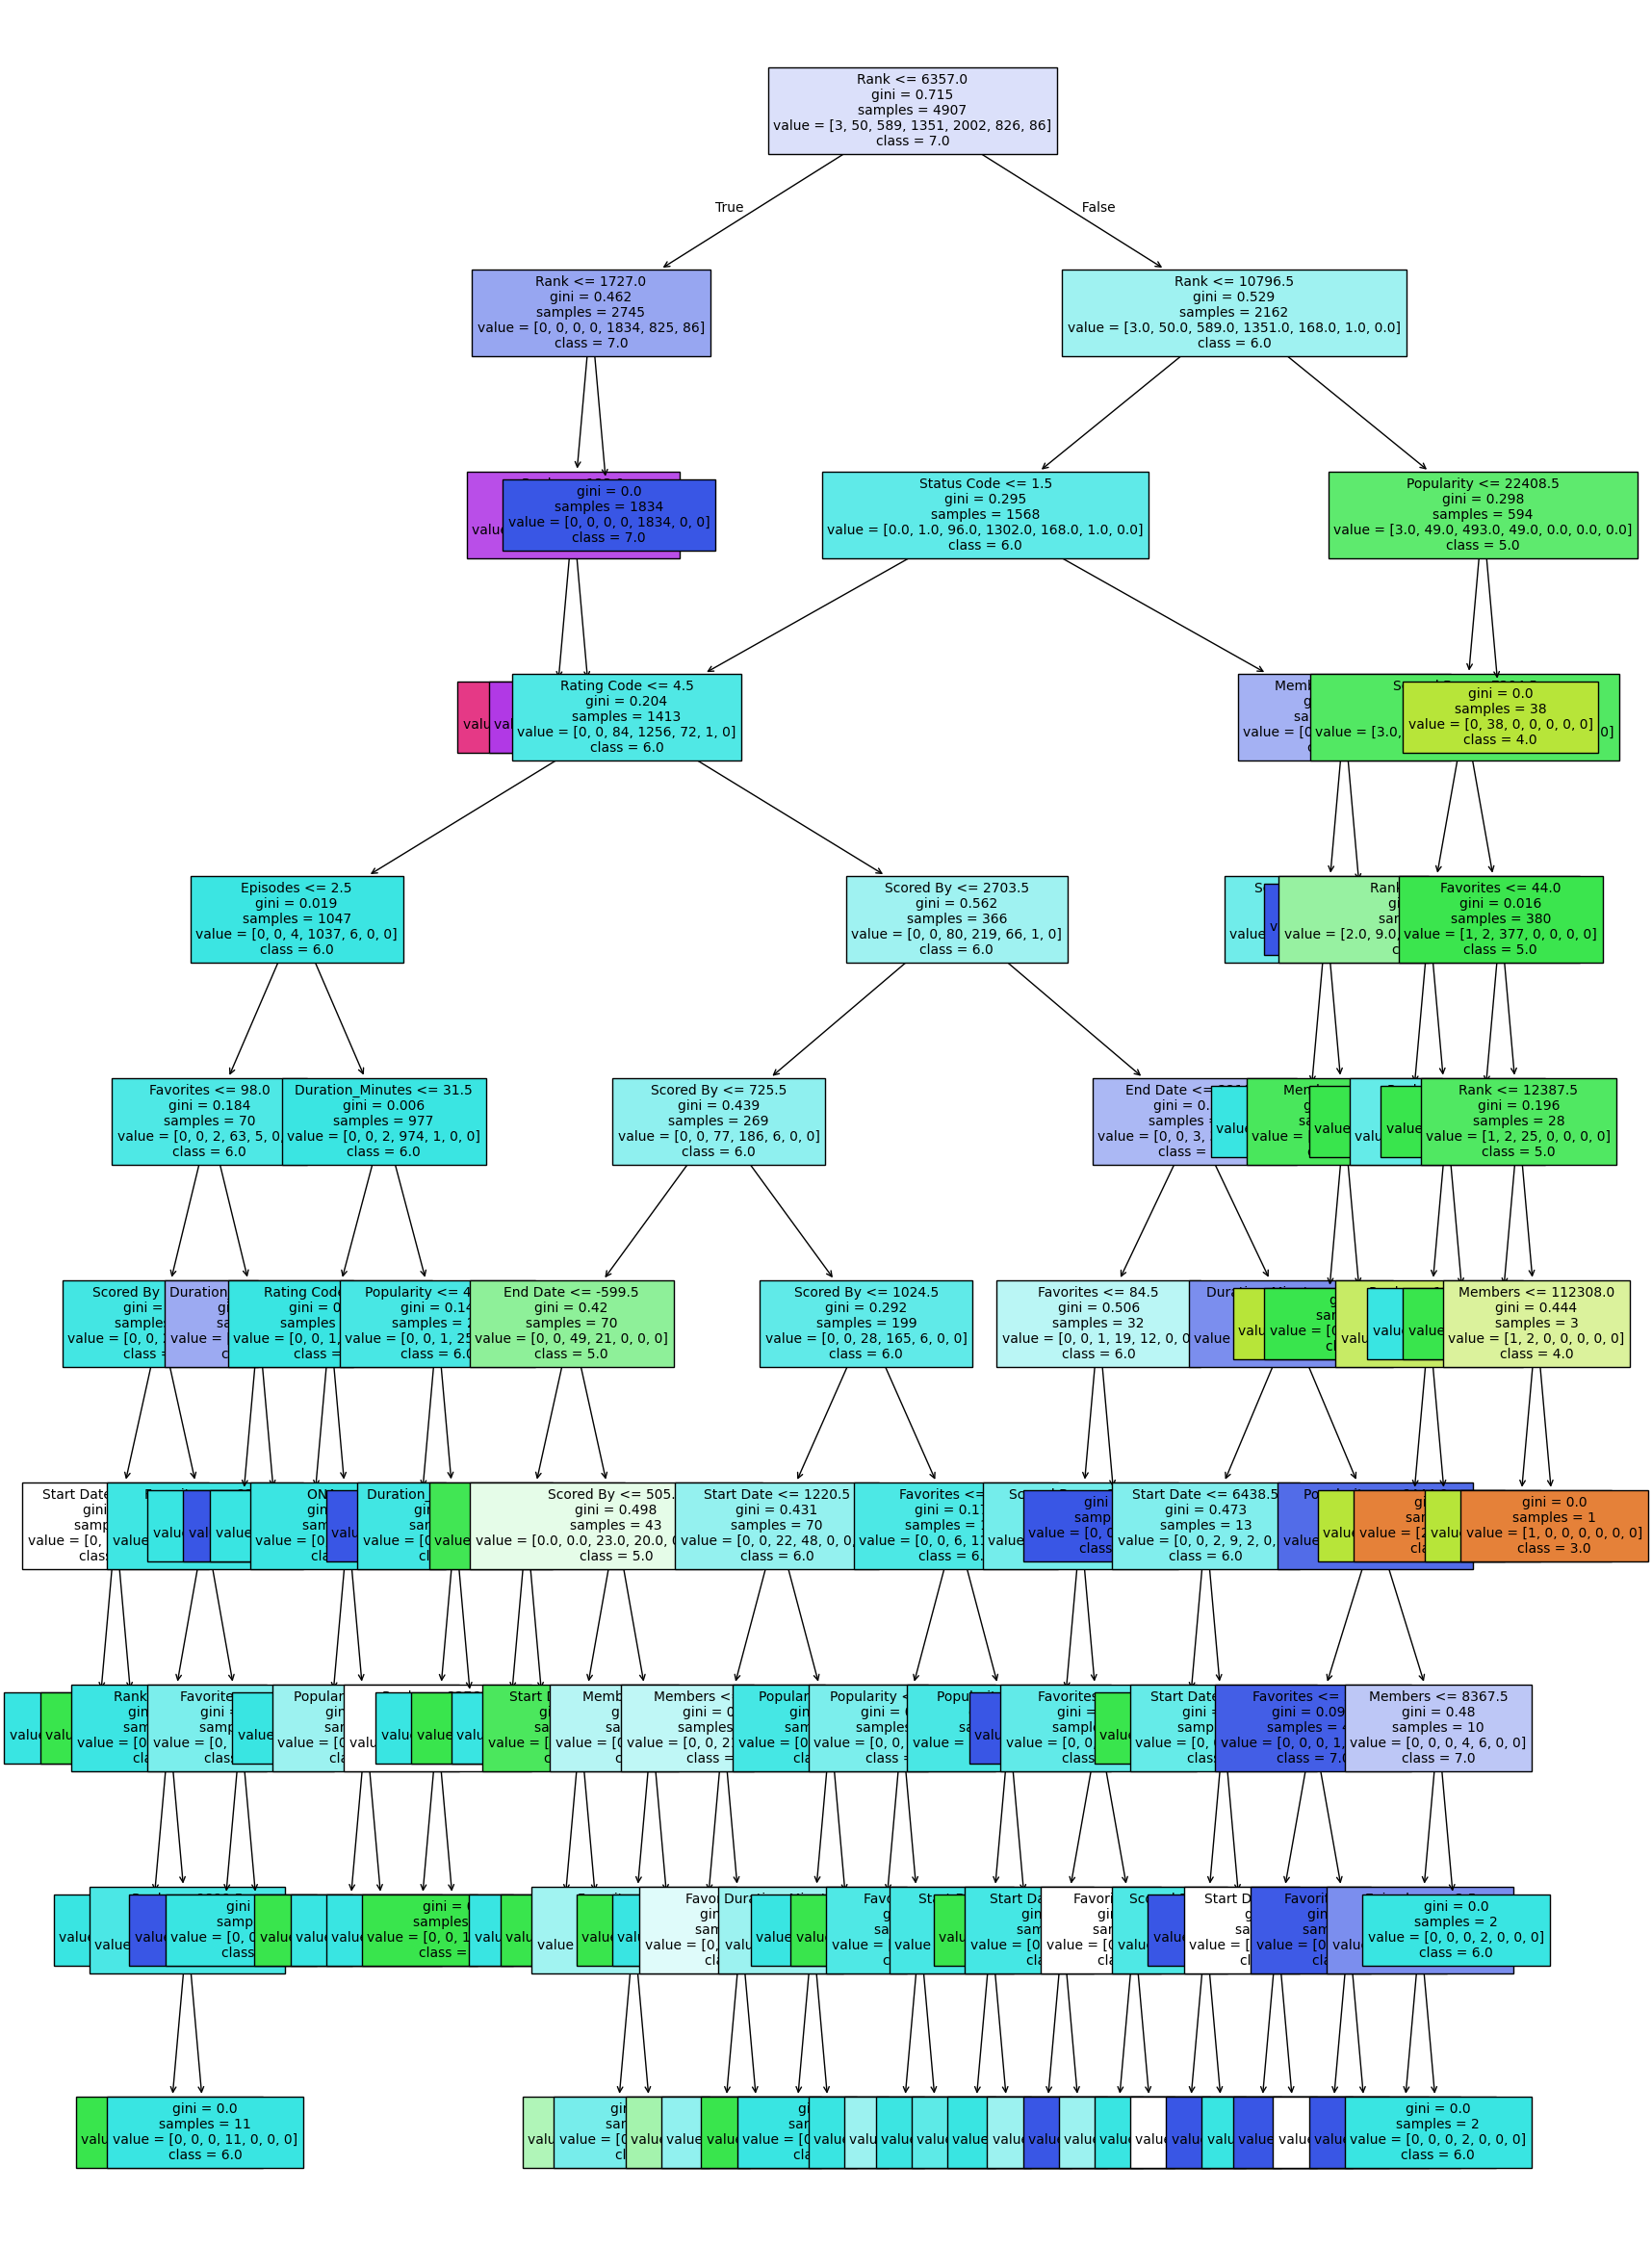

The predicted rank is 8.0


In [84]:
# Main function: Please edit the user_data below if you want some custom data

def train_significant_fields_model():
    global merged_df
    df = merged_df.copy()  # Work with a copy of the global dataset
    user_data = pd.DataFrame({
        'English name': ['TestName'],
        'Type': ['TV'],
        'Episodes': [24],
        'Status Code': [0],
        'Duration_Minutes': [73],
        'Rating Code': [4],
        'Rank': [345.0],
        'Popularity': [8000],
        'Favorites': [0],
        'Scored By': [10200],
        'Members': [0],
        'Start Date': [np.datetime64('2002-07-03')],
        'End Date': [np.datetime64('2009-03-25')],
        'Gourmet': [1],
        'Adventure':[1]
        })
    
    user_data.dropna(axis=1, inplace=True)
    relevant_fields=list(user_data.keys())

    df = df[relevant_fields+['Score']]
    df['Score'] = df['Score'].round()

    df=dropNanPlus(df,relevant_fields)
    user_data=dropNanPlus(user_data,relevant_fields, processUser=True,reference_df=df)
    
    # Train the model with a decision tree
    treeTrain(df, user_data)  # Setting test=True to show evaluation and test results

train_significant_fields_model() 

### Random Forest: Score V Duration

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features and target
X = anime_cleaned_df[['Duration_Minutes']]  # Source column for regression
y = anime_cleaned_df['Score']  # Target column for regression

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 0.7723408135682568
R-squared Score: 0.3841574637934979


### Random Forest: Episodes V Score

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features and target
X = anime_cleaned_df[['Episodes']]  # Source column for regression
y = anime_cleaned_df['Score']  # Target column for regression

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 1.0543587547657711
R-squared Score: 0.1592844011355652


## Trends

### Random Forest: Score V Duration

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features and target
X = anime_cleaned_df[['Duration_Minutes']]  # Source column for regression
y = anime_cleaned_df['Score']  # Target column for regression

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 0.7723408135682568
R-squared Score: 0.3841574637934979


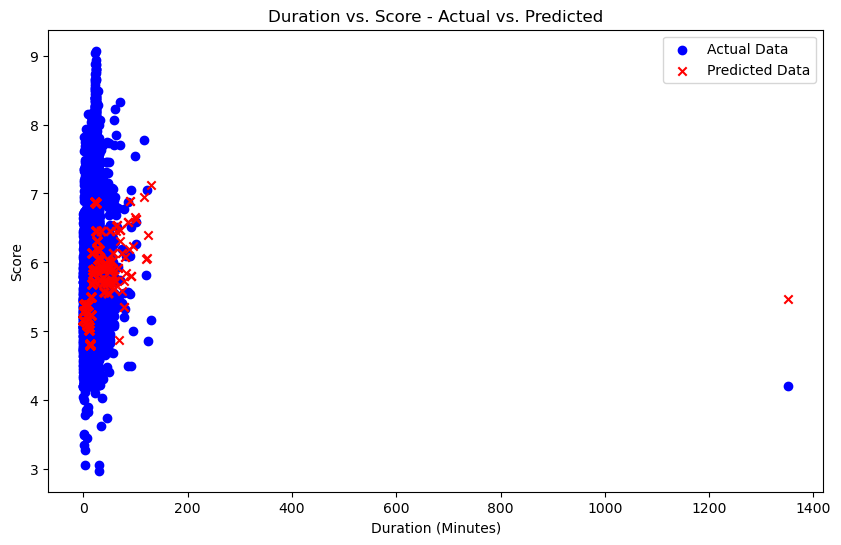

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual data
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', marker='x', label='Predicted Data')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Score')
plt.title('Duration vs. Score - Actual vs. Predicted')
plt.legend()
plt.show()


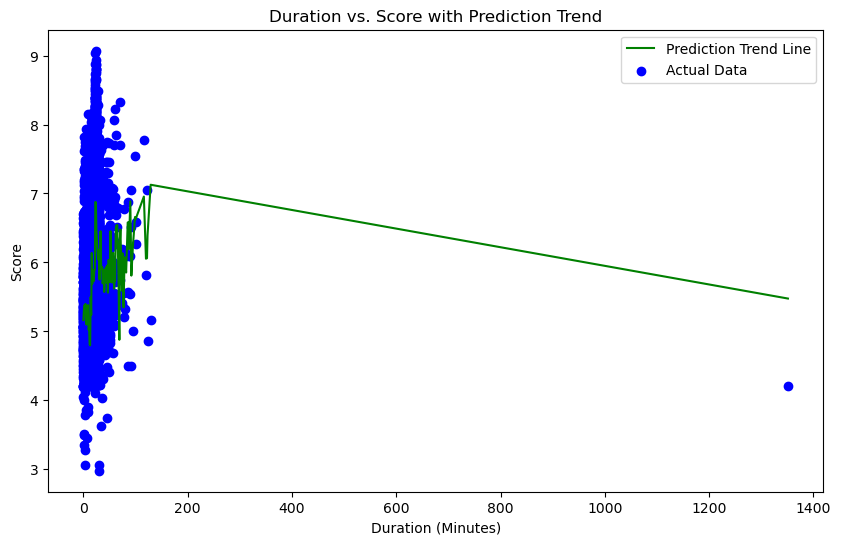

In [ ]:
import numpy as np

# Sort values for a smooth plot
sorted_indices = np.argsort(X_test.values.ravel())
X_test_sorted = X_test.values.ravel()[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Line plot for predictions
plt.figure(figsize=(10, 6))
plt.plot(X_test_sorted, y_pred_sorted, color='green', label='Prediction Trend Line')
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Score')
plt.title('Duration vs. Score with Prediction Trend')
plt.legend()
plt.show()


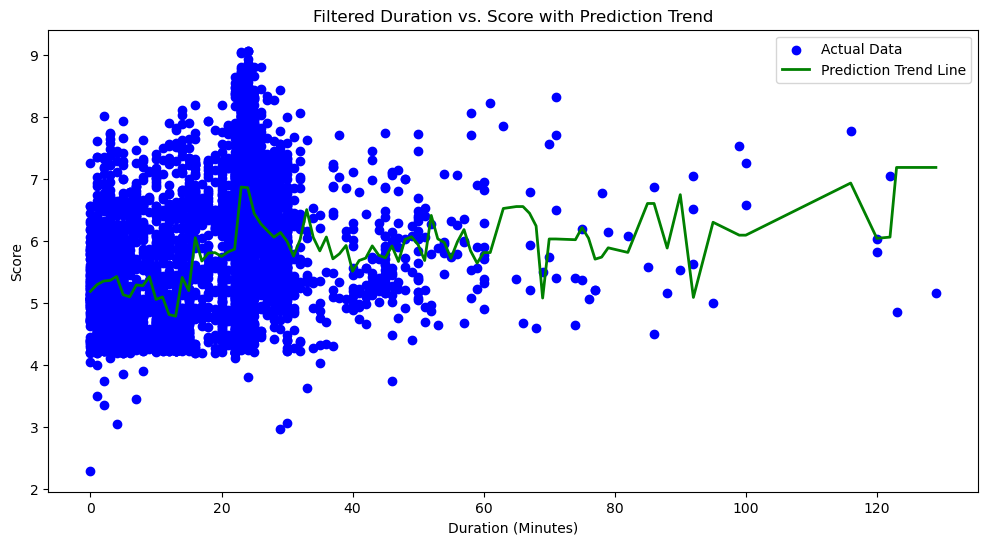

In [ ]:
# Threshold to remove outliers
threshold = 200  
filtered_data = anime_cleaned_df[anime_cleaned_df['Duration_Minutes'] <= threshold]

# Split filtered data into source and target
X_filtered = filtered_data[['Duration_Minutes']]
y_filtered = filtered_data['Score']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

# Re-train the Random Forest Regressor on filtered data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Sort for smoother visualization
sorted_indices = np.argsort(X_test.values.ravel())
X_test_sorted = X_test.values.ravel()[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the data and trend line
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test_sorted, y_pred_sorted, color='green', linewidth=2, label='Prediction Trend Line')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Score')
plt.title('Filtered Duration vs. Score with Prediction Trend')
plt.legend()
plt.show()


### Random Forest: Episodes V Score

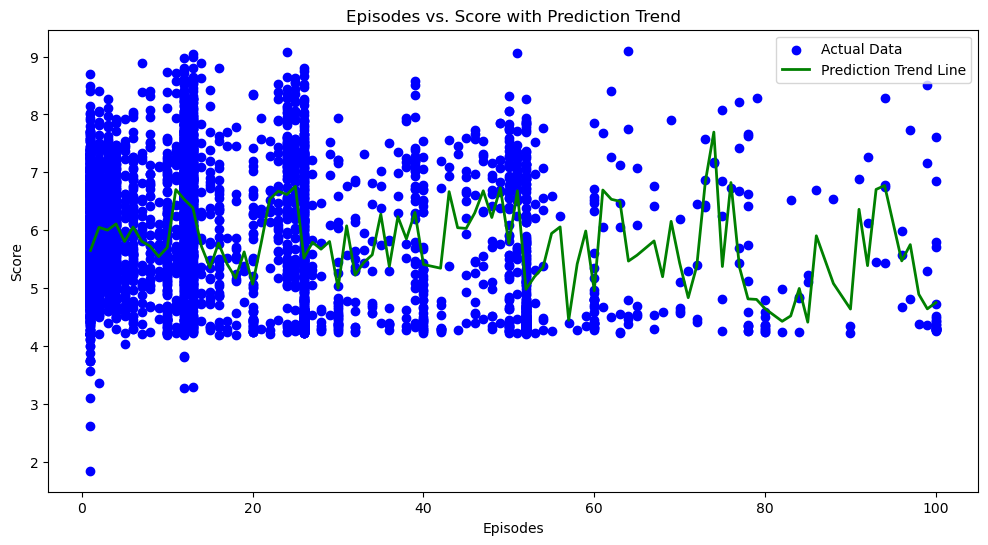

In [ ]:
# Threshold to filter out outliers (looking at u One Piece)
threshold = 100 
filtered_data = anime_cleaned_df[anime_cleaned_df['Episodes'] <= threshold]

# Split filtered data into source and target
X_filtered = filtered_data[['Episodes']]
y_filtered = filtered_data['Score']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

# Re-train the Random Forest Regressor on filtered data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Sort so the trend line doesnt jump everywhere but goes from left to right
sorted_indices = np.argsort(X_test.values.ravel())
X_test_sorted = X_test.values.ravel()[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the data and trend line
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test_sorted, y_pred_sorted, color='green', linewidth=2, label='Prediction Trend Line')
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.title('Episodes vs. Score with Prediction Trend')
plt.legend()
plt.show()


In [77]:
# Create episode range categories
bins = [0, 12, 24, 50, 100, float('inf')]
labels = ['Short (1-12)', 'Medium (13-24)', 'Long (25-50)', 'Very Long (51-100)', 'Extremely Long (100+)']
anime_cleaned_df['Episode_Category'] = pd.cut(anime_cleaned_df['Episodes'], bins=bins, labels=labels)

# Check the distribution
print(anime_cleaned_df['Episode_Category'].value_counts())


Episode_Category
Short (1-12)             8744
Long (25-50)             2517
Medium (13-24)           1988
Very Long (51-100)       1489
Extremely Long (100+)     468
Name: count, dtype: int64


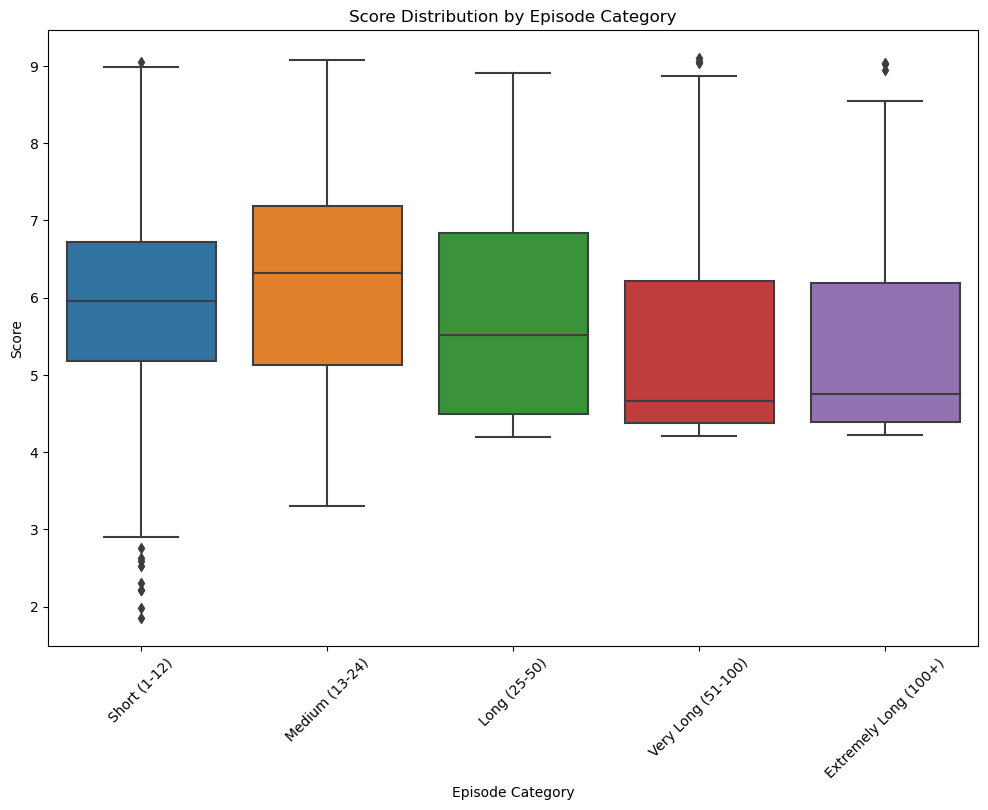

In [78]:
plt.figure(figsize=(12, 8))
sb.boxplot(x='Episode_Category', y='Score', data=anime_cleaned_df)
plt.title('Score Distribution by Episode Category')
plt.xlabel('Episode Category')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


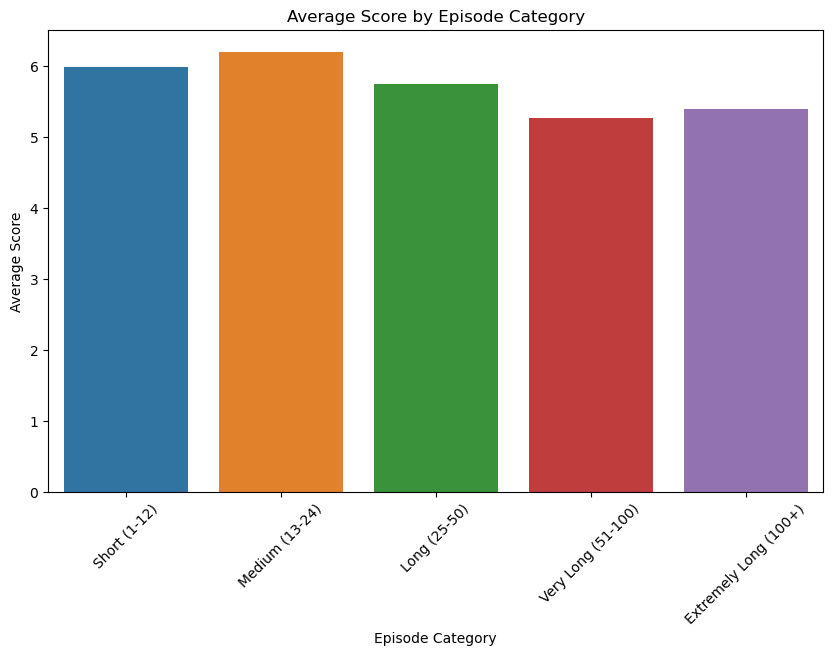

In [79]:
avg_score_per_category = anime_cleaned_df.groupby('Episode_Category')['Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sb.barplot(x='Episode_Category', y='Score', data=avg_score_per_category)
plt.title('Average Score by Episode Category')
plt.xlabel('Episode Category')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


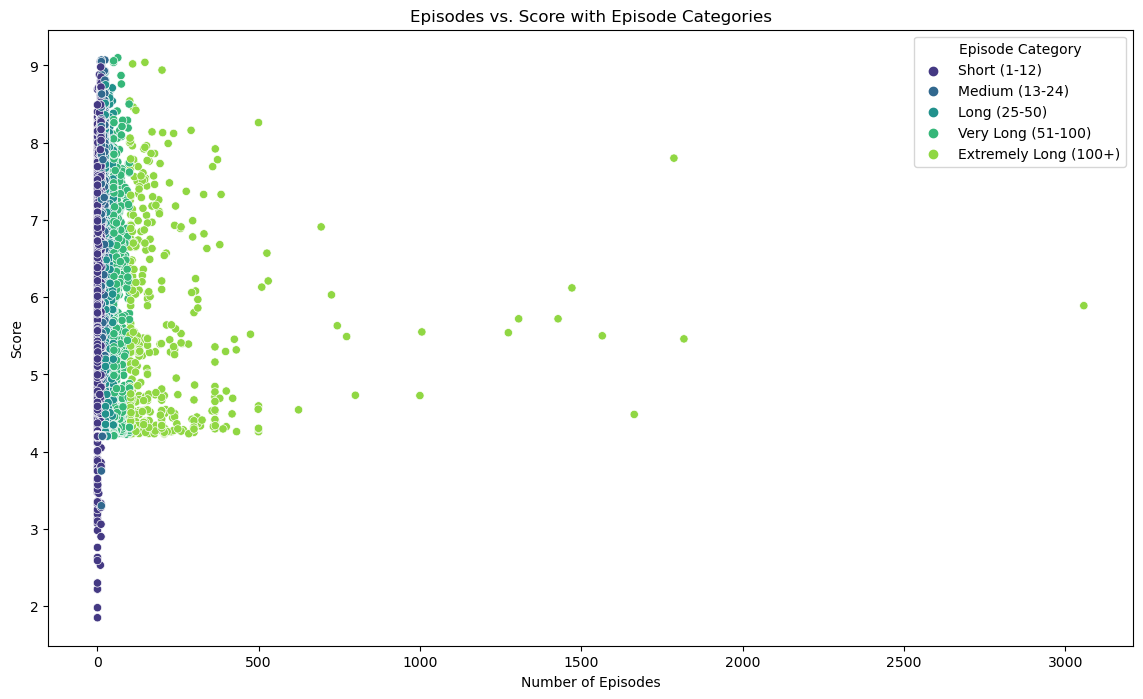

In [80]:
plt.figure(figsize=(14, 8))
sb.scatterplot(x='Episodes', y='Score', hue='Episode_Category', data=anime_cleaned_df, palette='viridis')
plt.title('Episodes vs. Score with Episode Categories')
plt.xlabel('Number of Episodes')
plt.ylabel('Score')
plt.legend(title='Episode Category')
plt.show()


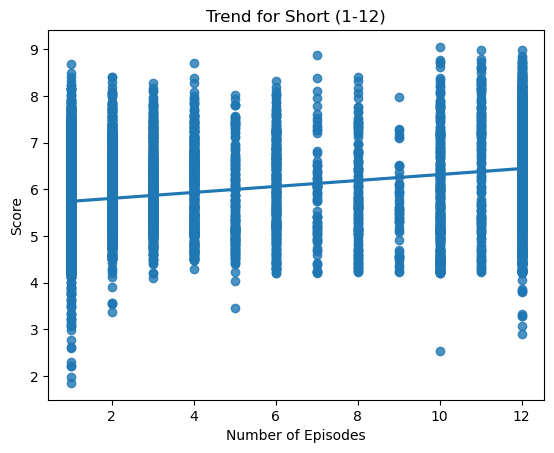

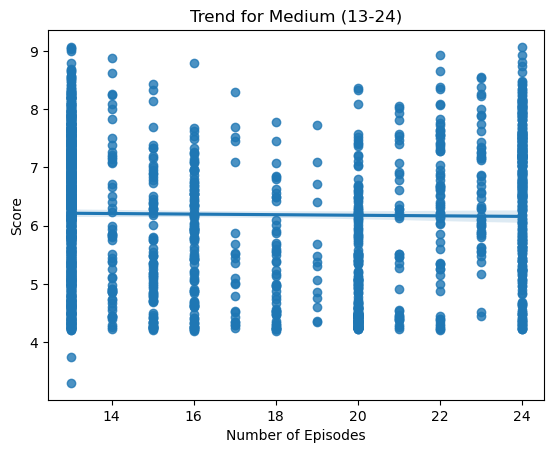

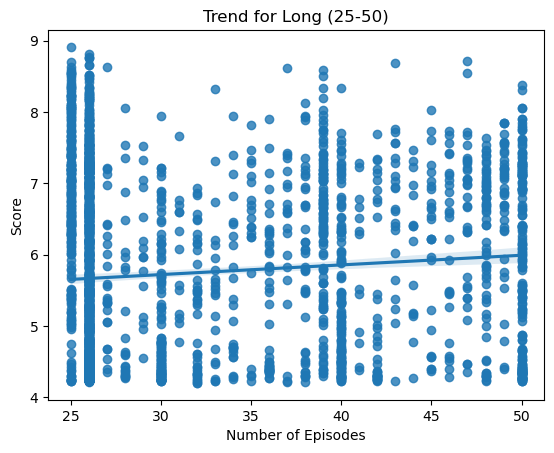

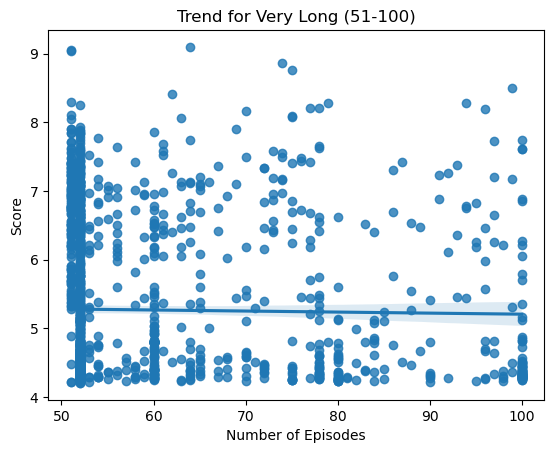

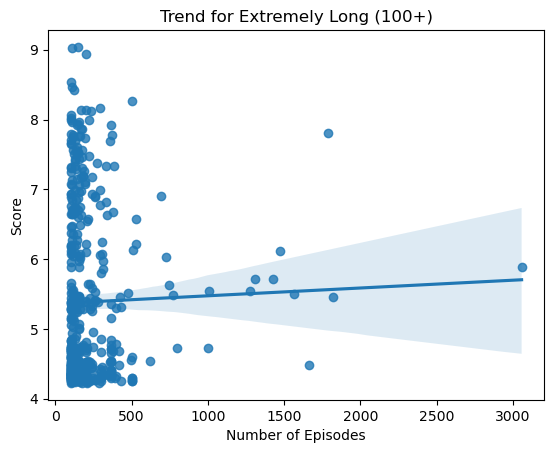

In [81]:
for category in labels:
    subset = anime_cleaned_df[anime_cleaned_df['Episode_Category'] == category]
    if not subset.empty:
        sb.regplot(x='Episodes', y='Score', data=subset, label=category)
        plt.title(f'Trend for {category}')
        plt.xlabel('Number of Episodes')
        plt.ylabel('Score')
        plt.show()


### Score v Season - Scatter chart

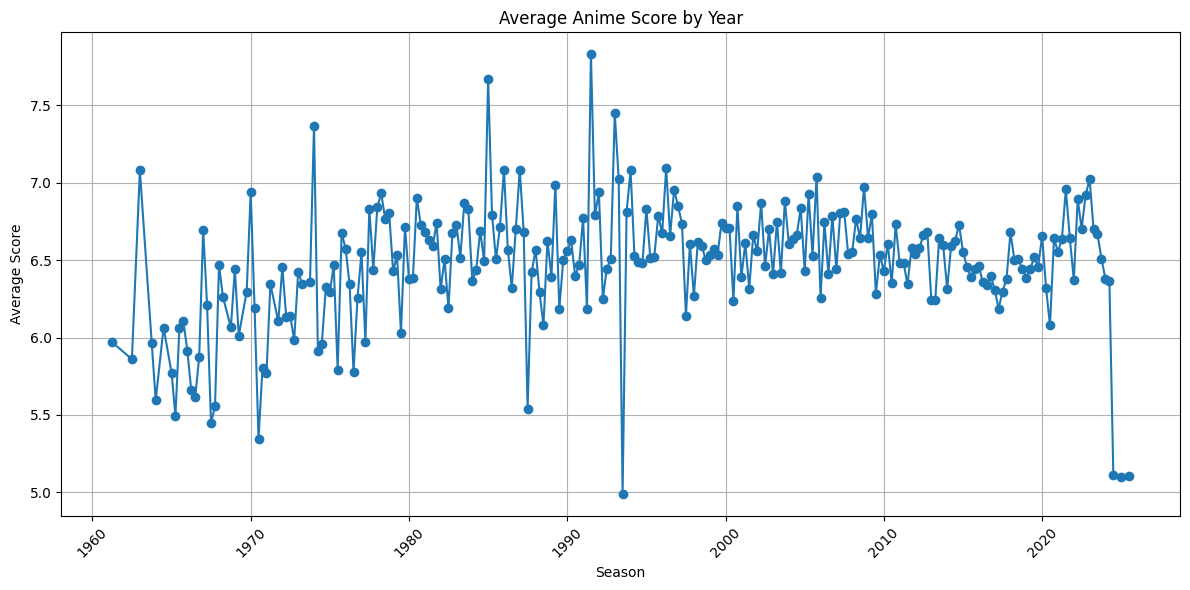

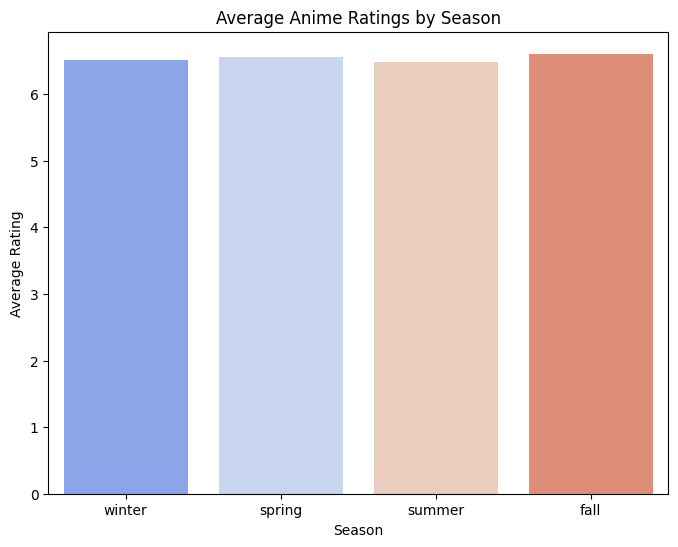

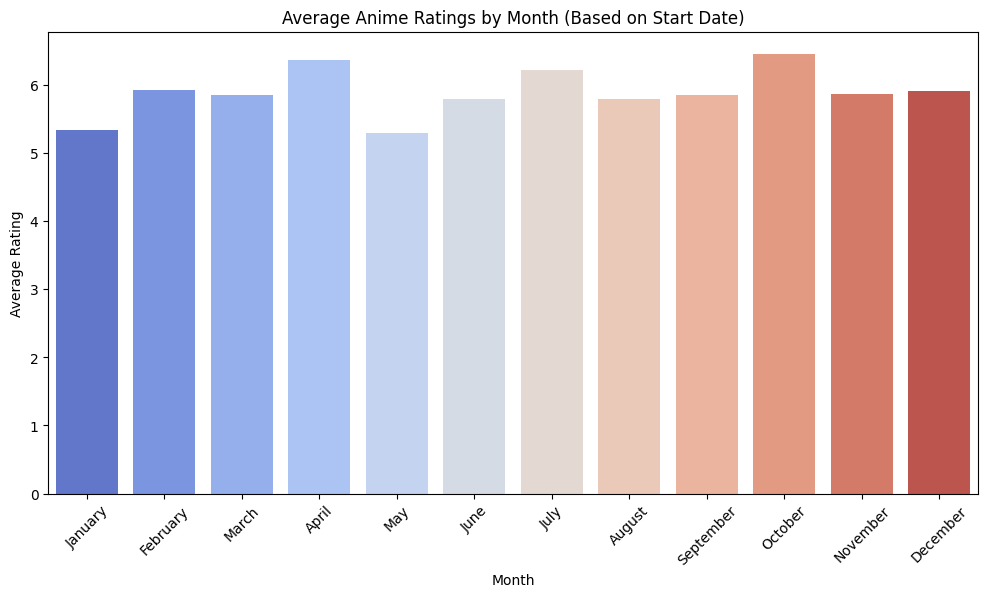

In [89]:
import scipy.stats as stats

# Create a copy of the anime_cleaned_df for better reproducibility
anime_copy = anime_cleaned_df.copy()

# For the 'Premiered' column, this was coded before the cleaning code was merged along with the one-hot encoder later
def extract_season_and_year(value):
    try:
        season, year = value.split()
        return season, int(year)
    except (ValueError, AttributeError):
        return np.nan, np.nan

# Apply the extraction function on the copy
anime_copy[['Season', 'Year']] = anime_copy['Premiered'].apply(
    lambda x: pd.Series(extract_season_and_year(x))
)

# Drop rows with missing or NaN values in 'Score', 'Season', or 'Year' in the copy
anime_copy = anime_copy.dropna(subset=['Score', 'Season', 'Year'])

# Required for pd._datetime to work correctly later
anime_copy['Year'] = anime_copy['Year'].astype('Int64')

# Group by Year and Season, then calculate the average score for each season in the copy
yearly_avg_scores = (
    anime_copy.groupby(['Year', 'Season'])['Score']
    .mean()
    .reset_index()
    .sort_values(['Year', 'Season'], ascending=True)
)

# Map seasons to the start of the season 
season_to_month = {
    'winter': '01',  # January
    'spring': '04',  # April
    'summer': '07',  # July
    'fall': '10'     # October
}

# Create a Date column by combining Year and mapped Month
yearly_avg_scores['Month'] = yearly_avg_scores['Season'].str.lower().map(season_to_month)
yearly_avg_scores['Date'] = yearly_avg_scores['Year'].astype(str) + '-' + yearly_avg_scores['Month'] + '-01'

# Convert to datetime format
yearly_avg_scores['Date'] = pd.to_datetime(yearly_avg_scores['Date'], format='%Y-%m-%d', errors='coerce')

# Drop rows with invalid Date values in the copy
yearly_avg_scores = yearly_avg_scores.dropna(subset=['Date'])

# Sort Ascending dates
yearly_avg_scores = yearly_avg_scores.sort_values(by='Date', ascending=True)

# Plotting
if yearly_avg_scores.empty:
    print("No data available for plotting. Please check the 'Premiered' and 'Score' fields for correct formatting.")
else:
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_avg_scores['Date'], yearly_avg_scores['Score'], marker='o')
    plt.title('Average Anime Score by Year')
    plt.xlabel('Season')
    plt.ylabel('Average Score')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

# Group by season, ignoring the year, and calculate the average score in the copy
seasonal_avg = anime_copy.groupby('Season')['Score'].mean().reindex(['winter', 'spring', 'summer', 'fall'])

# Plot the bar chart
plt.figure(figsize=(8, 6))
sb.barplot(x=seasonal_avg.index, y=seasonal_avg.values, palette='coolwarm', hue=seasonal_avg.index)
plt.title('Average Anime Ratings by Season')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.show()

# Reset anime_copy to a fresh copy of anime_cleaned_df
anime_copy = anime_cleaned_df.copy()

# Drop rows with missing or NaT values in 'Score' or 'Start Date'
anime_copy = anime_copy.dropna(subset=['Score', 'Start Date'])

# Extract the month from the 'Start Date' column
anime_copy['Month'] = anime_copy['Start Date'].dt.month

# Group by Month and calculate the average score
monthly_avg = anime_copy.groupby('Month')['Score'].mean()

# Convert numeric months to their names for better readability
month_names = {
    1: 'January', 2: 'February', 3: 'March',
    4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September',
    10: 'October', 11: 'November', 12: 'December'
}
monthly_avg.index = monthly_avg.index.map(month_names)

# Plot the bar chart for monthly averages
plt.figure(figsize=(12, 6))
sb.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm',hue=monthly_avg.index)
plt.title('Average Anime Ratings by Month (Based on Start Date)')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

del (anime_copy)

## XgBoost machine learning pipeline for regression

In [ ]:
# Xg Boost to determine importance of different features that affect score

In [85]:
print(anime_cleaned_df.columns)


Index(['anime_id', 'Name', 'English name', 'Score', 'Synopsis', 'Type',
       'Episodes', 'Premiered', 'Rank', 'Popularity', 'Favorites', 'Scored By',
       'Members', 'Image URL', 'Start Date', 'End Date', 'Status Code',
       'Source Code', 'Duration_Minutes', 'Rating Code', 'Episode_Category'],
      dtype='object')


In [87]:
from sklearn.model_selection import train_test_split

Xxg = anime_cleaned_df.drop('Score', axis=1) # Use the filtered genres_df

Xxg_train, Xxg_test, y_train, y_test = train_test_split(Xxg, y, test_size=0.3, random_state=42)


In [88]:
from sklearn.model_selection import train_test_split

Xxg_train, Xxg_test, yxg_train, yxg_test = train_test_split(Xxg, y, test_size=0.3, random_state=42)


In [89]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Ensure only numeric and category columns remain
Xxg_train = Xxg_train.select_dtypes(include=[np.number, 'category'])
Xxg_test = Xxg_test.select_dtypes(include=[np.number, 'category'])

# Convert any relevant columns to categorical type
for col in ['Episode_Category']:  # Replace with actual categorical column names
    Xxg_train[col] = Xxg_train[col].astype('category')
    Xxg_test[col] = Xxg_test[col].astype('category')

# Initialize the XGBoost model with support for categorical features
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    tree_method='hist',
    enable_categorical=True,  # Enable handling of categorical features
    eval_metric='rmse'
)

# Train the model
xgb_model.fit(Xxg_train, yxg_train)

# Make predictions
y_pred_xgb = xgb_model.predict(Xxg_test)

# Evaluate the model performance
mse = mean_squared_error(yxg_test, y_pred_xgb)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.01678647238739464


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

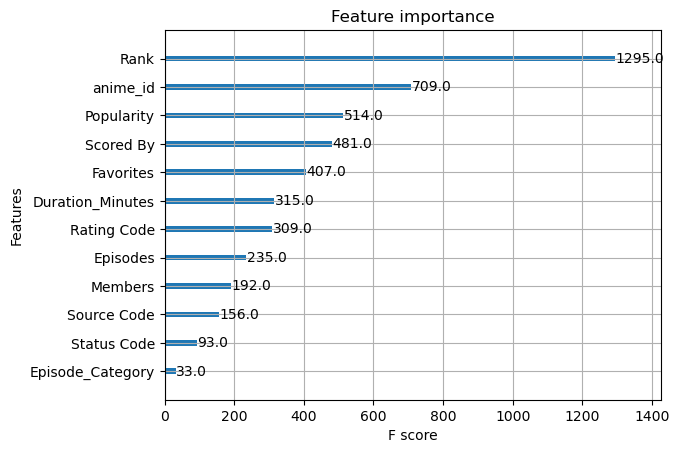

In [90]:
xgb.plot_importance(xgb_model)


anime_cleaned_df.dtypes

genres_df.dtypes

Xgenre = genres_df[['Genre']]
y = anime_cleaned_df['Score']  # Replace with your target variable

### Trying to use genre for catergoricalboost

# NLP can't get it to work lmao

from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF for 'English Name'
tfidf_vectorizer_name = TfidfVectorizer(max_features=100, stop_words='english')
X_name_tfidf = tfidf_vectorizer_name.fit_transform(anime_cleaned_df['Name'].fillna(''))

# TF-IDF for 'Synopsis'
tfidf_vectorizer_synopsis = TfidfVectorizer(max_features=500, stop_words='english')
X_synopsis_tfidf = tfidf_vectorizer_synopsis.fit_transform(anime_cleaned_df['Synopsis'].fillna(''))

# Create TF-IDF vectors for 'English Name' and 'Synopsis'
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

tfidf_vectorizer_name = TfidfVectorizer(max_features=1000)
X_name_tfidf = tfidf_vectorizer_name.fit_transform(anime_cleaned_df['Name'])

tfidf_vectorizer_synopsis = TfidfVectorizer(max_features=5000)
X_synopsis_tfidf = tfidf_vectorizer_synopsis.fit_transform(anime_cleaned_df['Synopsis'])

# Combine the two TF-IDF matrices
X_combined = hstack([X_name_tfidf, X_synopsis_tfidf])


In [ ]:
# Find the intersection of indices between the two DataFrames
common_indices = anime_cleaned_df.index.intersection(genres_df.index)

# Filter both DataFrames to keep only the common indices
anime_cleaned_df_catboost = anime_cleaned_df.loc[common_indices]
genres_df_catboost = genres_df.loc[common_indices]

# Verify that the lengths now match
print("Length of anime_cleaned_df:", len(anime_cleaned_df_catboost))
print("Length of genres_df:", len(genres_df_catboost))

# Now you can proceed with creating X and y
Xcat = genres_df_catboost[genre_columns]  # Use the filtered genres_df
y = anime_cleaned_df_catboost['Score']  # Ensure the target matches the filtered data


In [ ]:
print("Xcat_train shape:", Xcat_train.shape)
print("y_train shape:", y_train.shape)


In [ ]:
y_train = y_train[:Xcat_train.shape[0]]


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Specify categorical columns by name
cat_features = genre_columns  # Use the column names directly if they are categorical

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=4,
    task_type='GPU',  # Use GPU for training if available
    verbose=200
)

# Train the CatBoost model
catboost_model.fit(Xcat_train, y_train, cat_features=cat_features)

# Make predictions
y_pred_cat = catboost_model.predict(X_test)

# Evaluate the model
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))


In [94]:
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Find the intersection of indices between the two DataFrames
common_indices = anime_cleaned_df.index.intersection(genres_df.index)

# Filter both DataFrames to keep only the common indices
anime_cleaned_df_catboost = anime_cleaned_df.loc[common_indices]
genres_df_catboost = genres_df.loc[common_indices]

# Verify that the lengths now match
print("Length of anime_cleaned_df:", len(anime_cleaned_df_catboost))
print("Length of genres_df:", len(genres_df_catboost))

# Now you can proceed with creating X and y
Xcat = genres_df_catboost[genre_columns]  # Use the filtered genres_df
y = anime_cleaned_df_catboost['Score']  # Ensure the target matches the filtered data

# Ensure that the training and test sets are correctly aligned
Xcat_train = Xcat.iloc[:int(0.8 * len(Xcat))]  # 80% for training
X_test = Xcat.iloc[int(0.8 * len(Xcat)):]      # 20% for testing
y_train = y.iloc[:int(0.8 * len(y))]
y_test = y.iloc[int(0.8 * len(y)):]

# Check alignment of shapes
print("Xcat_train shape:", Xcat_train.shape)
print("y_train shape:", y_train.shape)

# Ensure 'cat_features' are set correctly
cat_features = [i for i, col in enumerate(Xcat.columns) if col in genre_columns]  # or use names directly

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=4,
    task_type='GPU',  # Use GPU for training if available
    verbose=200
)

# Train the CatBoost model
catboost_model.fit(Xcat_train, y_train, cat_features=cat_features)

# Make predictions
y_pred_cat = catboost_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_cat)
mae = mean_absolute_error(y_test, y_pred_cat)
r2 = r2_score(y_test, y_pred_cat)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2 Score):", r2)


Length of anime_cleaned_df: 9463
Length of genres_df: 9463
Xcat_train shape: (7570, 21)
y_train shape: (7570,)
0:	learn: 7.5979984	total: 9.98s	remaining: 16m 27s
99:	learn: 6.1378468	total: 15m 31s	remaining: 0us
Mean Squared Error (MSE): 2.8308475695193365
Mean Absolute Error (MAE): 1.5027261228647044
R-squared (R2 Score): -1.4536001931178948
